## Notebook para el análisis explotario de datos de vuelos

&nbsp;&nbsp;<font size="4" color="blue">Para ejecutar el notebook seguir los siguientes pasos:</font><br><br>
&nbsp;&nbsp;1- <b>Ejecutar únicamente las dos celdas a continuación</b><br>
&nbsp;&nbsp;2- Pulsar el botón generado <font color="red">"Run initial operations"</font><br>
&nbsp;&nbsp;3- Seleccionar los valores deseados<br>
&nbsp;&nbsp;4- Pulsar el botón <font  color="red">"Run all operations"</font><br>

In [ ]:
#Para instalar ipywidgets hay que ejecutar el siguiente comando en el terminal:
#!pip install ipywidgets

In [1]:
from IPython.display import Javascript, display
from ipywidgets import widgets

#Creamos un botón con el cual empezarán a ejecutarse las operaciones iniciales del notebook
def run_init(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, 10)'))

button_init = widgets.Button(description="Run initial operations")
button_init.on_click(run_init)
display(button_init)

<IPython.core.display.Javascript object>

Button(description='Run initial operations', style=ButtonStyle())

In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import numpy as np


import seaborn as sns

## Apertura de ficheros

In [3]:
#Definimos la variable ruta donde estarán los datasets a analizar
ruta = "/Users/moncholv/Documents/Proyecto AIr/datasets/On-timedata/renombrados/"


In [4]:
#Creamos un combo con el que elegir el año a analizar de los que disponemos de datos 1996-2018
dd = widgets.Dropdown(
    options = list(map(str, range(1996,2019))), 
    value = '1996',
    description = '* Year:',
)

dd.layout.width = '155px'
display(dd)

Dropdown(description='* Year:', layout=Layout(width='155px'), options=('1996', '1997', '1998', '1999', '2000',…

In [5]:
#Creamos un checkbox para indicar si en la ejecución queremos generar los ficheros una vez tratados los datos
cb = widgets.Checkbox(
    value=False,
    description='Generate processed files',
    disabled=False
)
display(cb)

Checkbox(value=False, description='Generate processed files')

In [6]:
#Creamos un botón con el cual empezarán a ejecutarse el resto de operaciones
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

button = widgets.Button(description="Run all operations")
button.on_click(run_all)
display(button)

Button(description='Run all operations', style=ButtonStyle())

In [7]:
load_progress = widgets.IntProgress(
    value=0,
    min=0,
    max=13,
    step=1,
    description='Loading...',
    bar_style='info', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

In [8]:
#Cargamos todos los ficheros del año (mes a mes)
year = dd.value
dataframes = []
i = 1

display(load_progress)

for file in os.listdir(ruta + year):
    if file.endswith(".csv"):
        load_progress.value = i
        print("Reading file " + file)
        datos_vuelos = pd.read_csv(os.path.join(ruta + year, file), 
                                   encoding="ISO-8859-1", 
                                   low_memory=False, 
                                   error_bad_lines=False, 
                                   dtype={'CancellationCode': str})
        
        i = i + 1
        dataframes.append(datos_vuelos)

load_progress.value = i + 1
print()
print("All files loaded <--")

dataframes= sorted(dataframes, key=lambda x:x["Month"].max(axis=0))

#concatenamos todos para tener un DF anual
dfanual = pd.concat(dataframes)

IntProgress(value=0, bar_style='info', description='Loading...', max=13)

Reading file 2015-08.csv
Reading file 2015-09.csv
Reading file 2015-04.csv
Reading file 2015-10.csv
Reading file 2015-11.csv
Reading file 2015-05.csv
Reading file 2015-07.csv
Reading file 2015-06.csv
Reading file 2015-12.csv
Reading file 2015-02.csv
Reading file 2015-03.csv
Reading file 2015-01.csv

All files loaded <--


In [9]:
dataframes[0].head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2015        1      1           1          4  2015-01-01                AA   
1  2015        1      1           2          5  2015-01-02                AA   
2  2015        1      1           3          6  2015-01-03                AA   
3  2015        1      1           4          7  2015-01-04                AA   
4  2015        1      1           5          1  2015-01-05                AA   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     19805                          AA      N787AA  ...   
1                     19805                          AA      N795AA  ...   
2                     19805                          AA      N788AA  ...   
3                     19805                          AA      N791AA  ...   
4                     19805                          AA      N783AA  ...   

   Div4TailNum  Div5Airport  Div5AirportID  Div5AirportSeqID Div5WheelsOn  \
0          NaN          NaN            NaN               NaN          NaN   
1          NaN          NaN            NaN               NaN          NaN   
2          NaN          NaN            NaN               NaN          NaN   
3          NaN          NaN            NaN               NaN          NaN   
4          NaN          NaN            NaN               NaN          NaN   

  Div5TotalGTime Div5LongestGTime  Div5WheelsOff Div5TailNum  Unnamed: 109  
0            NaN              NaN            NaN         NaN           NaN  
1            NaN              NaN            NaN         NaN           NaN  
2            NaN              NaN            NaN         NaN           NaN  
3            NaN              NaN            NaN         NaN           NaN  
4            NaN              NaN            NaN         NaN           NaN  

[5 rows x 110 columns]

In [10]:
#Miramos el tamaño del total
dfanual.shape

(5819079, 110)

In [11]:
#Miramos el tamaño de cada mes
for df in dataframes:
    print(df["Month"][1],df.shape)

1 (469968, 110)
2 (429191, 110)
3 (504312, 110)
4 (485151, 110)
5 (496993, 110)
6 (503897, 110)
7 (520718, 110)
8 (510536, 110)
9 (464946, 110)
10 (486165, 110)
11 (467972, 110)
12 (479230, 110)


## 1. Análisis Exploratorio

## 1.1 Aerolíneas

In [12]:
#para sacar las compañías que operan
#Cogemos las que hay en el primer mes y en el concatenado. Si son las mismas, tiramos. 
#Si no, miramos a ver en qué mes cambió
aerolineas_01 = dataframes[0]['IATA_CODE_Reporting_Airline'].unique()
aerolineas_anual = dfanual['IATA_CODE_Reporting_Airline'].unique()

if aerolineas_01.all() == aerolineas_anual.all():
    print(aerolineas_anual)
else:
    print(aerolineas_01)
    print(aerolineas_anual)

['AA' 'AS' 'B6' 'DL' 'US' 'VX' 'WN' 'UA' 'NK' 'MQ' 'OO' 'EV' 'HA' 'F9']


In [13]:

dfanual['Reporting_Airline'].unique()

array(['AA', 'AS', 'B6', 'DL', 'US', 'VX', 'WN', 'UA', 'NK', 'MQ', 'OO',
       'EV', 'HA', 'F9'], dtype=object)

## 1.2 Vuelos, aeropuertos y rutas.

## 1.2.1 Vuelos

In [14]:
#en teoría son números de vuelos único, pero no es verdad, parece que comparten numeración así que luego concatenaremos
len(dfanual['Flight_Number_Reporting_Airline'].unique())

6952

In [15]:
#hago el número de vuelo como es de verdad, concatenando código de compañía y vuelo
dfanual['Flight_Code'] = dfanual['IATA_CODE_Reporting_Airline'] + dfanual['Flight_Number_Reporting_Airline'].astype(str)

In [16]:
#Sacamos el número real de vuelos diferentes que hay
len((dfanual['Flight_Code']).unique())

23264

In [17]:
#códigos únicos de vuelos por mes
for df in dataframes:
    df['Flight_Code'] = df['IATA_CODE_Reporting_Airline'] + df['Flight_Number_Reporting_Airline'].astype(str)
    print(df["Month"][1],len((df['Flight_Code']).unique()))

1 16301
2 14918
3 15993
4 16291
5 15631
6 15976
7 15490
8 16028
9 16873
10 15337
11 17931
12 17780


## 1.2.1 Aeropuertos

In [18]:
#para sacar los aeropuertos hacemos como con las compañías
#Cogemos las que hay en el primer mes y en el concatenado. Si son los mismos, tiramos. Si no, miramos a ver en qué mes cambió
aeropuertos_01 = dataframes[0]['Origin'].unique()
aeropuertos_anual = dfanual['Origin'].unique()

if aeropuertos_01.all() == aeropuertos_anual.all():
    print(aeropuertos_anual)
else:
    print(aeropuertos_01)
    print(aeropuertos_anual)

['JFK' 'LAX' 'DFW' 'OGG' 'HNL' 'SFO' 'ATL' 'BOS' 'ONT' 'DCA' 'LAS' 'PHX'
 'IAD' 'JAX' 'MIA' 'TPA' 'PHL' 'SJU' 'HDN' 'SAN' 'ORD' 'SEA' 'DTW' 'SJC'
 'SLC' 'KOA' 'MCO' 'DEN' 'STL' 'JAC' 'CLE' 'HOU' 'TUS' 'PDX' 'IAH' 'MSY'
 'SNA' 'BDL' 'RSW' 'SAT' 'MKE' 'PBI' 'CLT' 'BWI' 'LGA' 'BNA' 'MFE' 'EWR'
 'AUS' 'RDU' 'LIH' 'MCI' 'ORF' 'COS' 'STT' 'TUL' 'FLL' 'IND' 'OKC' 'PIT'
 'ABQ' 'RNO' 'ELP' 'CMH' 'SMF' 'PSP' 'DAY' 'MEM' 'MSP' 'GUC' 'SDF' 'BHM'
 'ICT' 'EGE' 'DSM' 'FAT' 'OMA' 'STX' 'LIT' 'RIC' 'MTJ' 'ANC' 'BET' 'BRW'
 'SCC' 'FAI' 'KTN' 'JNU' 'SIT' 'WRG' 'PSG' 'OME' 'OTZ' 'ADK' 'OAK' 'BUR'
 'BLI' 'GEG' 'ADQ' 'CDV' 'YAK' 'LGB' 'CHS' 'BUF' 'HPN' 'SYR' 'ROC' 'PWM'
 'BTV' 'SAV' 'SRQ' 'SWF' 'PVD' 'PSE' 'BQN' 'ORH' 'GSO' 'BOI' 'AVL' 'MSO'
 'GRR' 'MOB' 'CVG' 'TLH' 'JAN' 'EYW' 'MSN' 'PNS' 'DAB' 'ATW' 'MDW' 'GPT'
 'GSP' 'TRI' 'AVP' 'MHT' 'ECP' 'MLB' 'ALB' 'FNT' 'VPS' 'TYS' 'CAK' 'MDT'
 'HSV' 'BIL' 'FAR' 'CHO' 'BZN' 'LEX' 'ROA' 'FAY' 'SGF' 'MYR' 'DAL' 'LFT'
 'CAE' 'AGS' 'BIS' 'FSD' 'DLH' 'GRB' 'GNV' 'XNA' 'A

In [19]:
#número de aeropuertos únicos en origen
len(aeropuertos_anual)

322

In [20]:
#número de aeropuertos únicos en destino
len(dfanual['Dest'].unique())

322

In [21]:
#CÓDIGOS DE AEROPUERTOS ÚNICOS DE DESTINO
dfanual['Dest'].unique()

array(['LAX', 'JFK', 'HNL', 'DFW', 'OGG', 'SFO', 'MIA', 'LAS', 'ONT',
       'DCA', 'MCO', 'ATL', 'PHX', 'IAD', 'TPA', 'PHL', 'MKE', 'HDN',
       'SAN', 'ORD', 'SEA', 'DTW', 'SJC', 'SLC', 'KOA', 'SJU', 'DEN',
       'STL', 'PDX', 'JAC', 'CLT', 'CLE', 'HOU', 'SMF', 'TUS', 'BOS',
       'RNO', 'MSY', 'SNA', 'BDL', 'RSW', 'SAT', 'PBI', 'BWI', 'BNA',
       'EWR', 'JAX', 'AUS', 'LGA', 'RDU', 'LIH', 'MCI', 'ORF', 'IAH',
       'COS', 'STT', 'MEM', 'FLL', 'MFE', 'IND', 'OKC', 'PIT', 'TUL',
       'ELP', 'MSP', 'CMH', 'PSP', 'DAY', 'ABQ', 'GUC', 'SDF', 'BHM',
       'EGE', 'DSM', 'RIC', 'OMA', 'STX', 'FAT', 'LIT', 'ICT', 'MTJ',
       'BET', 'ANC', 'BRW', 'SCC', 'FAI', 'KTN', 'JNU', 'SIT', 'PSG',
       'WRG', 'OME', 'OTZ', 'ADK', 'OAK', 'BLI', 'BUR', 'GEG', 'ADQ',
       'YAK', 'CDV', 'LGB', 'HPN', 'PWM', 'SYR', 'ROC', 'BTV', 'SAV',
       'SRQ', 'BUF', 'SWF', 'PVD', 'PSE', 'BQN', 'CHS', 'ORH', 'BZN',
       'DLH', 'GRR', 'CAE', 'MOB', 'CVG', 'LEX', 'EYW', 'TLH', 'FAR',
       'FSD', 'MHT',

## 1.2.3 Rutas

In [22]:
#ahora miramos las rutas que hay, al año y mensualmente
dfanual['Route'] = dfanual['Origin'] + "-" + dfanual['Dest'] 

In [23]:
len((dfanual['Route']).unique())

4696

In [24]:
#rutas únicas por mes
for df in dataframes:
    df['Route'] = df['Origin'] + "-" + df['Dest']
    print(df["Month"][1],len((df['Route']).unique()))

1 4170
2 4079
3 4097
4 4128
5 4019
6 4122
7 4076
8 4125
9 3998
10 3916
11 3952
12 4115


## 1.3 Retrasos, adelantos y cancelaciones

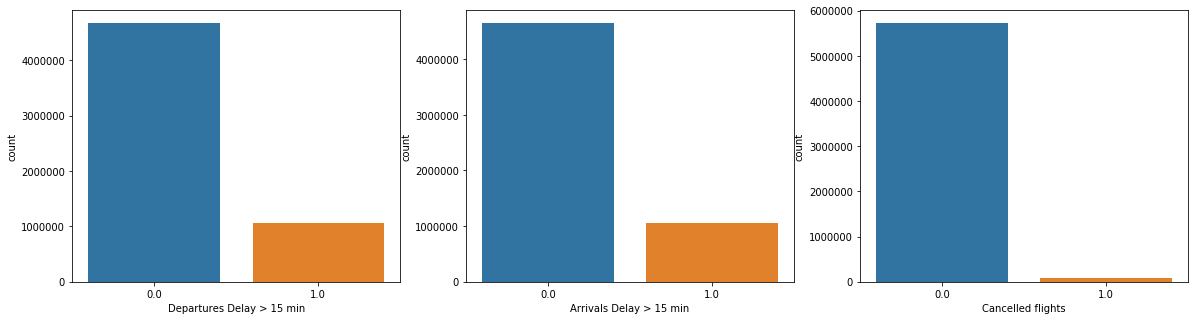

In [25]:
# Gráficas anuales
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.countplot(dfanual['DepDel15'], label='Frecuencia')
plt.xlabel('Departures Delay > 15 min')

plt.subplot(1,3,2)
sns.countplot(dfanual['ArrDel15'], label='Frecuencia')
plt.xlabel('Arrivals Delay > 15 min')

plt.subplot(1,3,3)
sns.countplot(dfanual['Cancelled'], label='Frecuencia')
plt.xlabel('Cancelled flights')


plt.show()

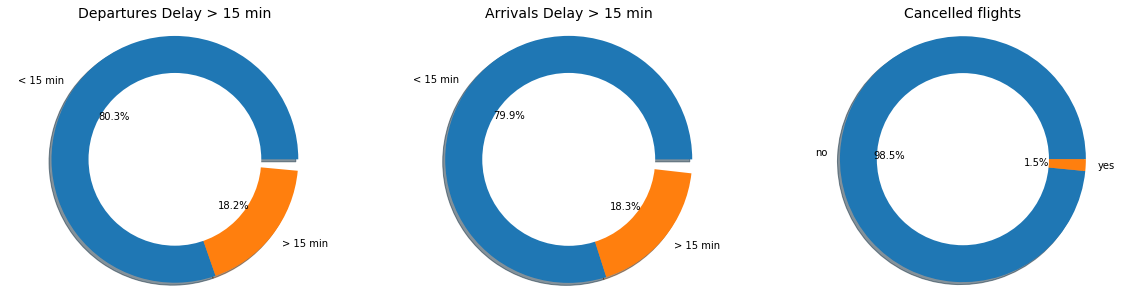

In [26]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(20, 5))
etiquetas_1 = ['< 15 min', '> 15 min']
etiquetas_2 = ['no', 'yes']
fracs_dep = [len(dfanual[dfanual['DepDel15'] == 0])/len(dfanual['DepDel15']),
             len(dfanual[dfanual['DepDel15'] ==1])/len(dfanual['DepDel15'])]
fracs_arr = [len(dfanual[dfanual['ArrDel15'] == 0])/len(dfanual['ArrDel15'])
             , len(dfanual[dfanual['ArrDel15'] == 1])/len(dfanual['ArrDel15'])]
fracs_canc = [len(dfanual[dfanual['Cancelled'] == 0])/len(dfanual['Cancelled']),
              len(dfanual[dfanual['Cancelled'] == 1])/len(dfanual['Cancelled'])]

the_grid = GridSpec(1, 3)

plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(fracs_dep, labels=etiquetas_1, autopct='%1.1f%%', shadow=True)
centre_circle_1 = plt.Circle((0, 0), 0.7, fc='white')
fig_1 = plt.gcf()
fig_1.gca().add_artist(centre_circle_1)
plt.axis('equal')
plt.title('Departures Delay > 15 min', fontsize=14)


plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(fracs_arr, labels=etiquetas_1, autopct='%1.1f%%', shadow=True)
centre_circle_2 = plt.Circle((0, 0), 0.7, fc='white')
fig_2 = plt.gcf()
fig_2.gca().add_artist(centre_circle_2)
plt.axis('equal')
plt.title('Arrivals Delay > 15 min', fontsize=14)


plt.subplot(the_grid[0, 2], aspect=1)
plt.pie(fracs_canc, labels=etiquetas_2, autopct='%1.1f%%', shadow=True)
centre_circle_3 = plt.Circle((0, 0), 0.7, fc='white')
fig_3 = plt.gcf()
fig_3.gca().add_artist(centre_circle_3)
plt.axis('equal')
plt.title('Cancelled flights', fontsize=14)

plt.show()

## 1.3.1 Adelantos en Salidas de Vuelos

In [27]:
#vuelos que se han adelantado de la hora prevista en salidas
adelantos = (dfanual[dfanual['DepDelay'] < 0])
adelantos = adelantos['DepDelay']
adelantos.shape

(3277948,)

In [28]:
adelantos.describe()

count    3.277948e+06
mean    -4.799224e+00
std      3.052945e+00
min     -8.200000e+01
25%     -6.000000e+00
50%     -4.000000e+00
75%     -2.000000e+00
max     -1.000000e+00
Name: DepDelay, dtype: float64

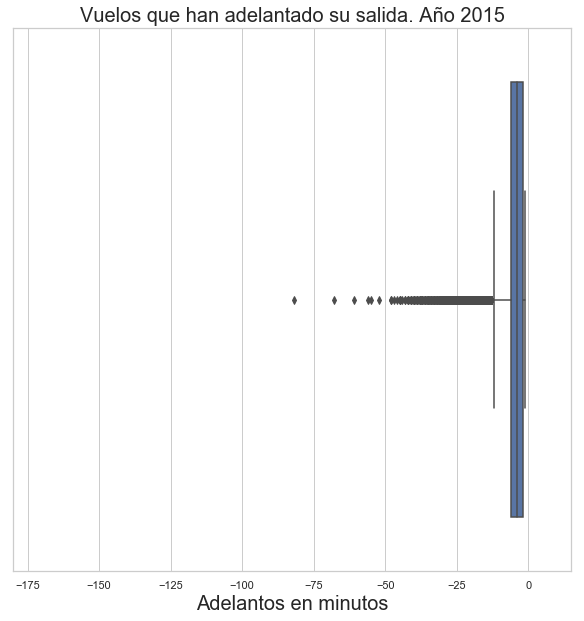

In [29]:
#Vuelos que han adelantado su salida

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-180,15)
ax = sns.boxplot(x=adelantos)
ax.set_xlabel("Adelantos en minutos", fontsize=20)
ax.set_title('Vuelos que han adelantado su salida. Año ' + year, fontsize=20)
plt.show()

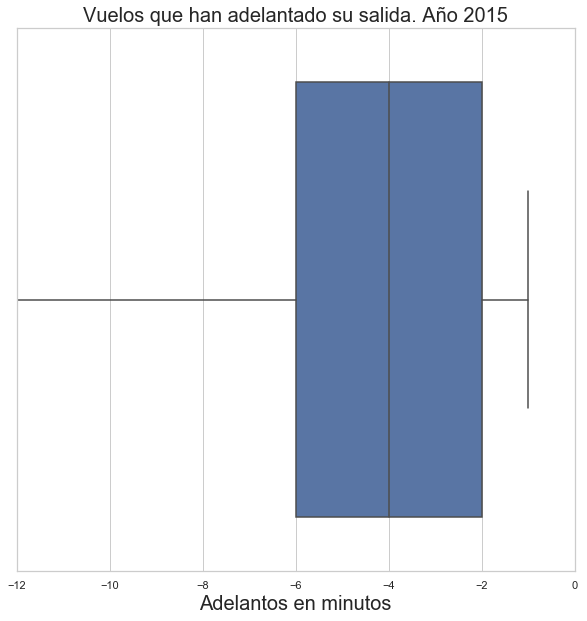

In [30]:
#vamos a reducir la escala para al menos ver la parte principal
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-12,0)
ax = sns.boxplot(x=adelantos)
ax.set_xlabel("Adelantos en minutos", fontsize=20)
ax.set_title('Vuelos que han adelantado su salida. Año ' + year, fontsize=20)
plt.show()

Los adelantos en salida mayores a 10 minutos son cancelaciones, por lo que no nos eliminamos

In [31]:
len(dfanual[dfanual['DepDelay'] < -15])

20331

## 1.3.2 Retrasos en salidas distribuidos por aerolíneas

In [32]:
retrasosSalidasPorAerolinea = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])

retrasosSalidasPorAerolinea = pd.DataFrame(retrasosSalidasPorAerolinea[['DepDelay', 'IATA_CODE_Reporting_Airline']])
retrasosSalidasPorAerolinea.head(5)

DepDelay IATA_CODE_Reporting_Airline
17      16.0                          AA
23     103.0                          AA
33      22.0                          AA
34     161.0                          AA
58      40.0                          AA

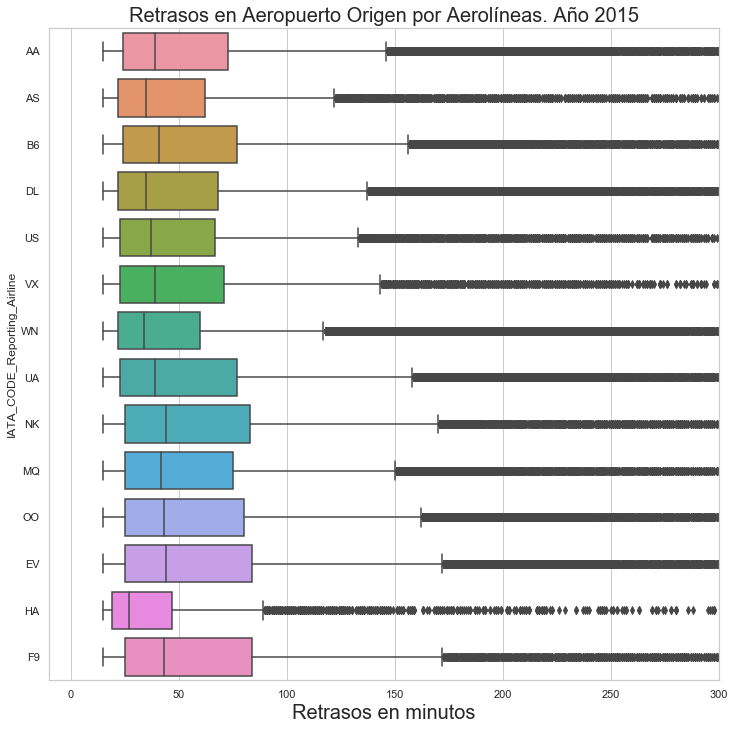

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
plt.xlim(-10,300)
ax = sns.boxplot(x=retrasosSalidasPorAerolinea["DepDelay"], y=retrasosSalidasPorAerolinea["IATA_CODE_Reporting_Airline"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Retrasos en Aeropuerto Origen por Aerolíneas. Año ' + year, fontsize=20)
plt.show()

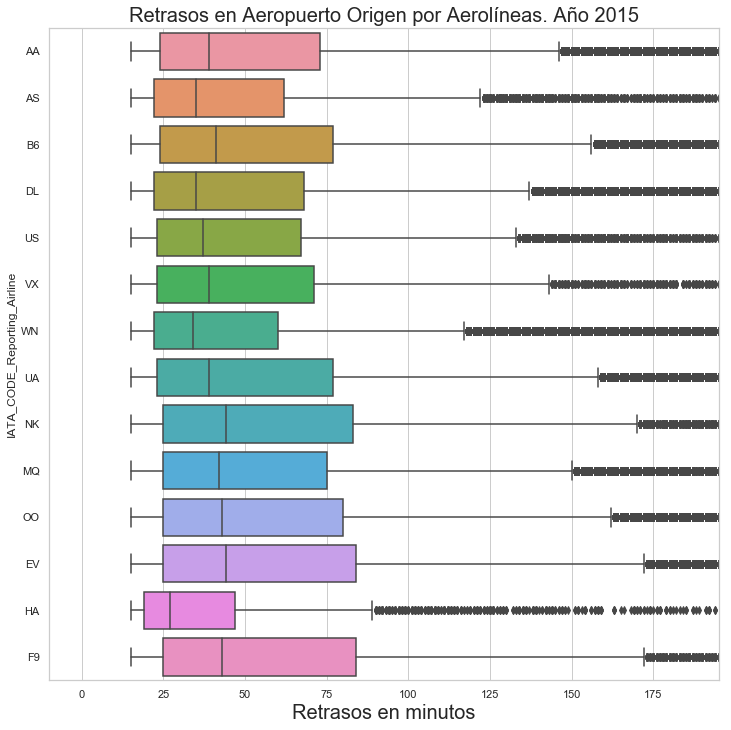

In [34]:
#vamos a limitar un poco más eje x
sns.set(style="whitegrid")
plt.figure(figsize=(12,12))
plt.xlim(-10,195)
ax = sns.boxplot(x=retrasosSalidasPorAerolinea["DepDelay"], y=retrasosSalidasPorAerolinea["IATA_CODE_Reporting_Airline"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Retrasos en Aeropuerto Origen por Aerolíneas. Año ' + year, fontsize=20)
plt.show()

## 1.3.3 Retrasos en Aeropuerto de Origen

#### Vuelos que se han retrasado al menos 15 minutos en la salida (incluye también a todos los que se retrasaron o no en la llegada en el destino)

In [35]:
#Vuelos que se han retrasado al menos 15 minutos en la salida (incluye también a todos los que se retrasaron o no
#en la llegada en el destino)
len(dfanual[dfanual['DepDel15'] == 1])

1057554

In [36]:
#retrasos por mes en salidas

vuelosTotalesRetrasadosPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosTotalesRetrasadosPorMes = vuelosTotalesRetrasadosPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['DepDel15'] == 1)])}, ignore_index=True)


#sin meter en un pandas, sólo para mostrarlos por print
#for df in dataframes:
#    print(df["Month"][1],len(df[df['DepDel15'] == 1]))

In [37]:
vuelosTotalesRetrasadosPorMes

mes  vuelos
0    1   90978
1    2   91288
2    3   95585
3    4   79889
4    5   89816
5    6  116858
6    7  109884
7    8   96519
8    9   58488
9   10   60343
10  11   69784
11  12   98122

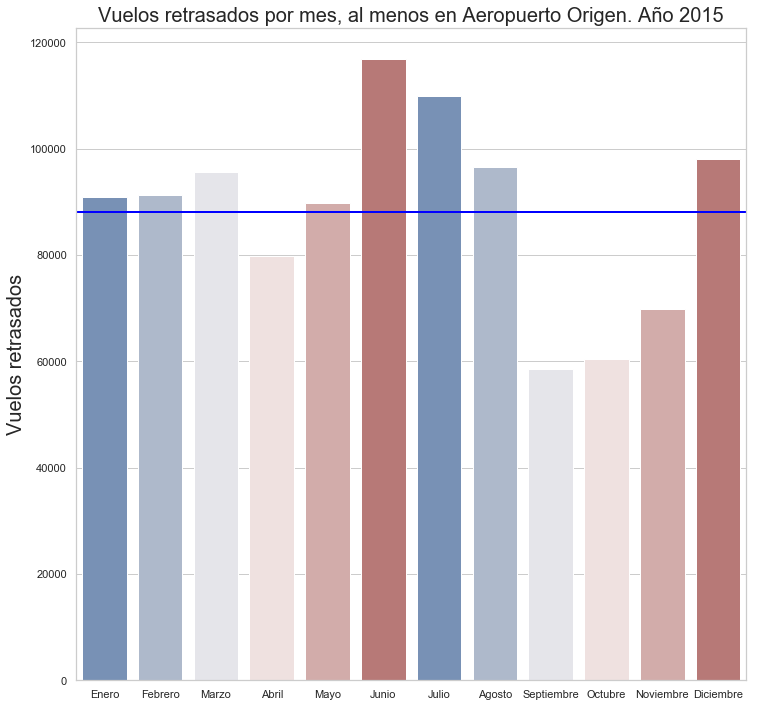

In [38]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosTotalesRetrasadosPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, al menos en Aeropuerto Origen. Año ' + year, fontsize=20)

plt.axhline(vuelosTotalesRetrasadosPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

#### Retrasados sólo en salidas y no en llegadas, es decir, recuperan el tiempo durante el vuelo. Esto significa que no se marca el retraso por ningún motivo, ya que el retraso se marca en destino por lo que los vuelos con retrasos en salidas sólo se registro el tiempo de retraso.

In [39]:
len(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['ArrDel15'] == 0)])

219684

In [40]:
vuelosRestrasadosSoloEnSalidas = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosRestrasadosSoloEnSalidas = vuelosRestrasadosSoloEnSalidas.append({'mes': df["Month"][1], 'vuelos': len(df[(df['DepDel15'] == 1) & (df['ArrDel15'] == 0)])}, ignore_index=True)


In [41]:
vuelosRestrasadosSoloEnSalidas

mes vuelos
0    1  17296
1    2  17531
2    3  21098
3    4  17477
4    5  18347
5    6  21403
6    7  21571
7    8  20100
8    9  13262
9   10  14943
10  11  16105
11  12  20551

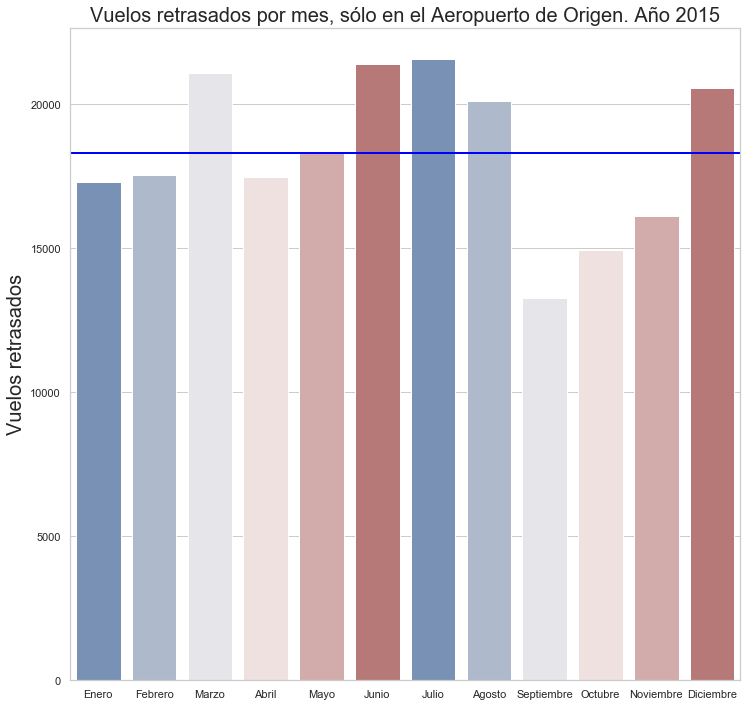

In [42]:
#Vuelos retrasados por mes sólo en salidas (no tenemos los motivos de los retrasos en este caso, al llegar en hora a destino)

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosRestrasadosSoloEnSalidas['vuelos'], palette=pal)

ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, sólo en el Aeropuerto de Origen. Año ' + year, fontsize=20)

plt.axhline(vuelosRestrasadosSoloEnSalidas['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

Nos vamos a quedar sólo con los retrasados en salidas (tanto si recuperaron el tiempo a la llegado como si no)
para ver la media y cuartiles, así como los posibles outliers

In [43]:
retrasosSalidas = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])
retrasosSalidas.head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
17  2015        1      1          18          7  2015-01-18                AA   
23  2015        1      1          24          6  2015-01-24                AA   
33  2015        1      1           3          6  2015-01-03                AA   
34  2015        1      1           4          7  2015-01-04                AA   
58  2015        1      1          28          3  2015-01-28                AA   

    DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
17                     19805                          AA      N786AA  ...   
23                     19805                          AA      N787AA  ...   
33                     19805                          AA      N790AA  ...   
34                     19805                          AA      N785AA  ...   
58                     19805                          AA      N784AA  ...   

    Div5AirportID  Div5AirportSeqID  Div5WheelsOn  Div5TotalGTime  \
17            NaN               NaN           NaN             NaN   
23            NaN               NaN           NaN             NaN   
33            NaN               NaN           NaN             NaN   
34            NaN               NaN           NaN             NaN   
58            NaN               NaN           NaN             NaN   

   Div5LongestGTime Div5WheelsOff Div5TailNum  Unnamed: 109 Flight_Code  \
17              NaN           NaN         NaN           NaN         AA1   
23              NaN           NaN         NaN           NaN         AA1   
33              NaN           NaN         NaN           NaN         AA2   
34              NaN           NaN         NaN           NaN         AA2   
58              NaN           NaN         NaN           NaN         AA2   

      Route  
17  JFK-LAX  
23  JFK-LAX  
33  LAX-JFK  
34  LAX-JFK  
58  LAX-JFK  

[5 rows x 112 columns]

In [44]:
retrasosSalidas = pd.DataFrame(retrasosSalidas['DepDelay'])

retrasosSalidas.head(5)

DepDelay
17      16.0
23     103.0
33      22.0
34     161.0
58      40.0

In [45]:
retrasosSalidas.describe().T

count       mean        std   min   25%   50%   75%     max
DepDelay  1057554.0  59.713865  64.905212  15.0  23.0  38.0  71.0  1988.0

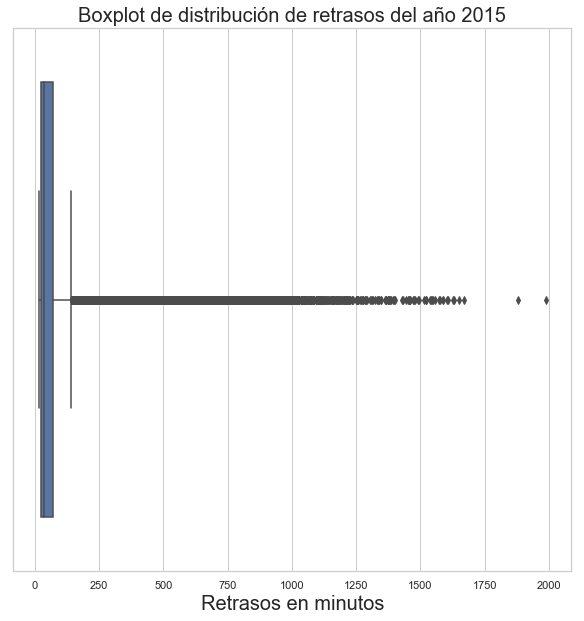

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasosSalidas["DepDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos del año ' + year, fontsize=20)
plt.show()

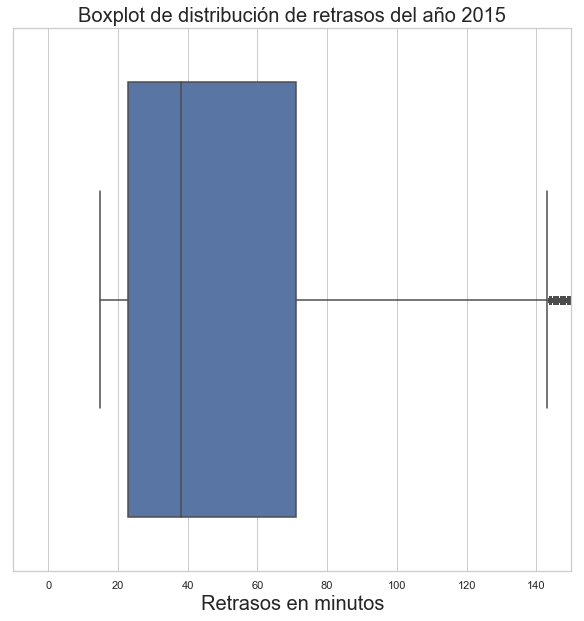

In [47]:
#vamos a reducir la escala para al menos ver la parte principal

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(-10,150)
ax = sns.boxplot(x=retrasosSalidas["DepDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos del año ' + year, fontsize=20)
plt.show()

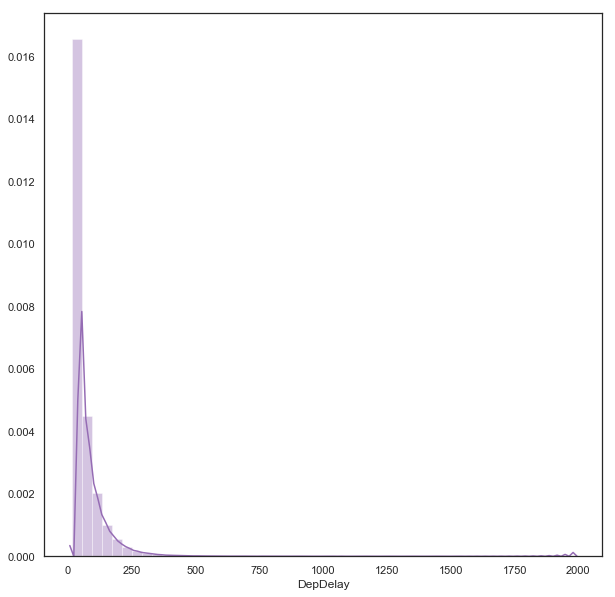

In [48]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasosSalidas["DepDelay"], color="m")

plt.show()

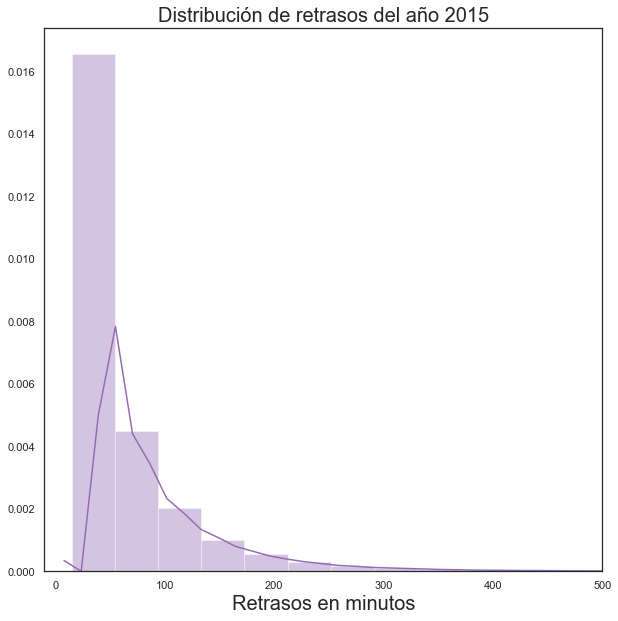

In [49]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSalidas["DepDelay"], color="m")
plt.xlim(-10,500)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

Quizás deberíamos cortar sobre los 250 minutos de retraso

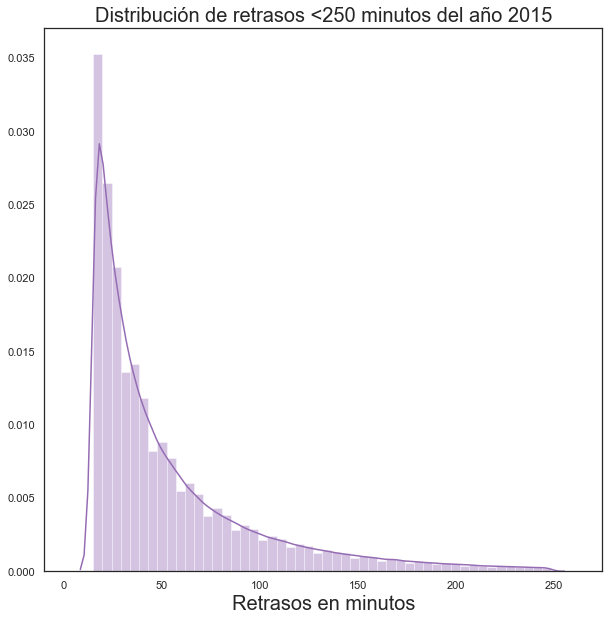

In [50]:
corte250Min = pd.DataFrame(retrasosSalidas[retrasosSalidas["DepDelay"]<250])

# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(corte250Min["DepDelay"], color="m")
plt.xlim(-10,275)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos <250 minutos del año ' + year, fontsize=20)


plt.show()

### 1.3.3.1 Ranking de aeropuertos en Retrasos en salidas

In [51]:
dfanual[dfanual['DepDel15'] == 1].Origin.value_counts(sort=True).head(15)

ORD    71433
ATL    65363
DFW    54497
DEN    47092
LAX    43122
IAH    32850
SFO    32527
LAS    30546
PHX    29131
EWR    25157
MCO    24056
LGA    22819
BWI    22284
BOS    20760
MDW    20658
Name: Origin, dtype: int64

In [52]:
#primero cogemos los 45 aeropuertos (de origen) con mayor número de retrasos
retrasosSalidaEnAeropuertos = pd.DataFrame(dfanual[dfanual['DepDelay'] == 1].Origin.value_counts(sort=True)).head(45)

In [53]:
#retrasos totales de esos 45 aeropuerto
retrasosSalidaEnAeropuertos.sum()

Origin    135663
dtype: int64

In [54]:
#el 85% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80Aeropuertos = ((retrasosSalidaEnAeropuertos.sum() / (len(dfanual[dfanual['DepDel15'] == 1])))) *100

In [55]:
pct80Aeropuertos = (pct80Aeropuertos -100) * (-1)

In [56]:
print('45 aeropuertos concentran el %.2f' %pct80Aeropuertos + '% de los retrasos del año ' + year)

45 aeropuertos concentran el 87.17% de los retrasos del año 2015


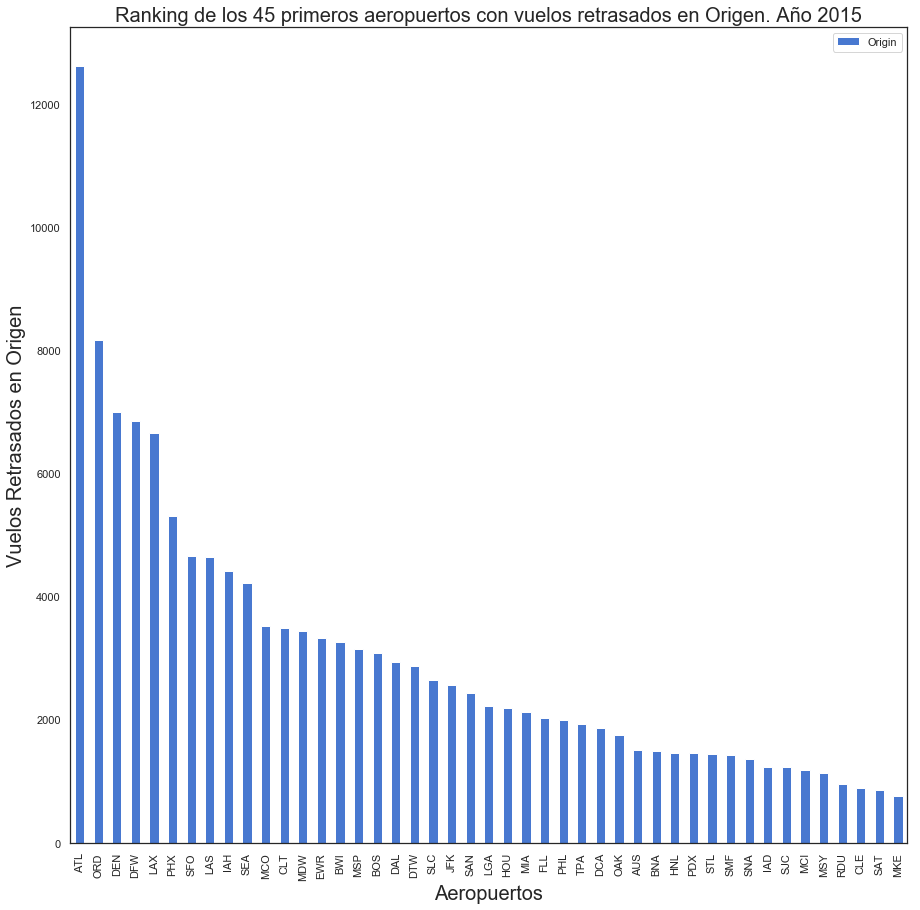

In [57]:
ax = retrasosSalidaEnAeropuertos.plot(kind='bar', figsize=(15,15))

ax.set_ylabel("Vuelos Retrasados en Origen", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

De estos, ATL (Atlanta), DFW (Dallas) y IAH(Houston) y  concentran más del 20% de los retrasos

In [58]:
retrasosSalidaEnAeropuertos = retrasosSalidaEnAeropuertos.reset_index()
retrasosSalidaEnAeropuertos.columns = ['Origin','DepDelay']

In [59]:
retrasosSalidaEnAeropuertos.head(45)

Origin  DepDelay
0     ATL     12616
1     ORD      8170
2     DEN      6990
3     DFW      6843
4     LAX      6649
5     PHX      5314
6     SFO      4659
7     LAS      4634
8     IAH      4416
9     SEA      4221
10    MCO      3516
11    CLT      3489
12    MDW      3443
13    EWR      3322
14    BWI      3267
15    MSP      3153
16    BOS      3087
17    DAL      2937
18    DTW      2867
19    SLC      2638
20    JFK      2566
21    SAN      2435
22    LGA      2221
23    HOU      2185
24    MIA      2118
25    FLL      2023
26    PHL      1988
27    TPA      1927
28    DCA      1860
29    OAK      1744
30    AUS      1509
31    BNA      1494
32    HNL      1460
33    PDX      1455
34    STL      1445
35    SMF      1421
36    SNA      1367
37    IAD      1227
38    SJC      1226
39    MCI      1186
40    MSY      1133
41    RDU       948
42    CLE       886
43    SAT       849
44    MKE       759

In [60]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosSalidaEnAeropuertos["Origin"].values.tolist()

In [61]:
#nos quedamos con los datos de esos aeropuertos
retrasosSalidaEnAeropuertos = dfanual.loc[(dfanual["Origin"].isin(aeropuertos))]

In [62]:
retrasosSalidaEnAeropuertos

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0       2015        1      1           1          4  2015-01-01   
1       2015        1      1           2          5  2015-01-02   
2       2015        1      1           3          6  2015-01-03   
3       2015        1      1           4          7  2015-01-04   
4       2015        1      1           5          1  2015-01-05   
5       2015        1      1           6          2  2015-01-06   
6       2015        1      1           7          3  2015-01-07   
7       2015        1      1           8          4  2015-01-08   
8       2015        1      1           9          5  2015-01-09   
9       2015        1      1          10          6  2015-01-10   
10      2015        1      1          11          7  2015-01-11   
11      2015        1      1          12          1  2015-01-12   
12      2015        1      1          13          2  2015-01-13   
13      2015        1      1          14          3  2015-01-14   
14      2015        1      1          15          4  2015-01-15   
15      2015        1      1          16          5  2015-01-16   
16      2015        1      1          17          6  2015-01-17   
17      2015        1      1          18          7  2015-01-18   
18      2015        1      1          19          1  2015-01-19   
19      2015        1      1          20          2  2015-01-20   
20      2015        1      1          21          3  2015-01-21   
21      2015        1      1          22          4  2015-01-22   
22      2015        1      1          23          5  2015-01-23   
23      2015        1      1          24          6  2015-01-24   
24      2015        1      1          25          7  2015-01-25   
25      2015        1      1          26          1  2015-01-26   
26      2015        1      1          27          2  2015-01-27   
27      2015        1      1          28          3  2015-01-28   
28      2015        1      1          29          4  2015-01-29   
29      2015        1      1          30          5  2015-01-30   
...      ...      ...    ...         ...        ...         ...   
479193  2015        4     12          25          5  2015-12-25   
479194  2015        4     12          25          5  2015-12-25   
479195  2015        4     12          25          5  2015-12-25   
479198  2015        4     12          25          5  2015-12-25   
479199  2015        4     12          25          5  2015-12-25   
479200  2015        4     12          25          5  2015-12-25   
479201  2015        4     12          25          5  2015-12-25   
479202  2015        4     12          25          5  2015-12-25   
479203  2015        4     12          25          5  2015-12-25   
479205  2015        4     12          25          5  2015-12-25   
479206  2015        4     12          25          5  2015-12-25   
479207  2015        4     12          25          5  2015-12-25   
479208  2015        4     12          25          5  2015-12-25   
479209  2015        4     12          25          5  2015-12-25   
479210  2015        4     12          25          5  2015-12-25   
479211  2015        4     12          25          5  2015-12-25   
479212  2015        4     12          25          5  2015-12-25   
479213  2015        4     12          25          5  2015-12-25   
479214  2015        4     12          25          5  2015-12-25   
479217  2015        4     12          25          5  2015-12-25   
479218  2015        4     12          25          5  2015-12-25   
479219  2015        4     12          25          5  2015-12-25   
479220  2015        4     12          25          5  2015-12-25   
479222  2015        4     12          25          5  2015-12-25   
479223  2015        4     12          25          5  2015-12-25   
479224  2015        4     12          25          5  2015-12-25   
479225  2015        4     12          25          5  2015-12-25   
479226  2015        4     12          25          5  20

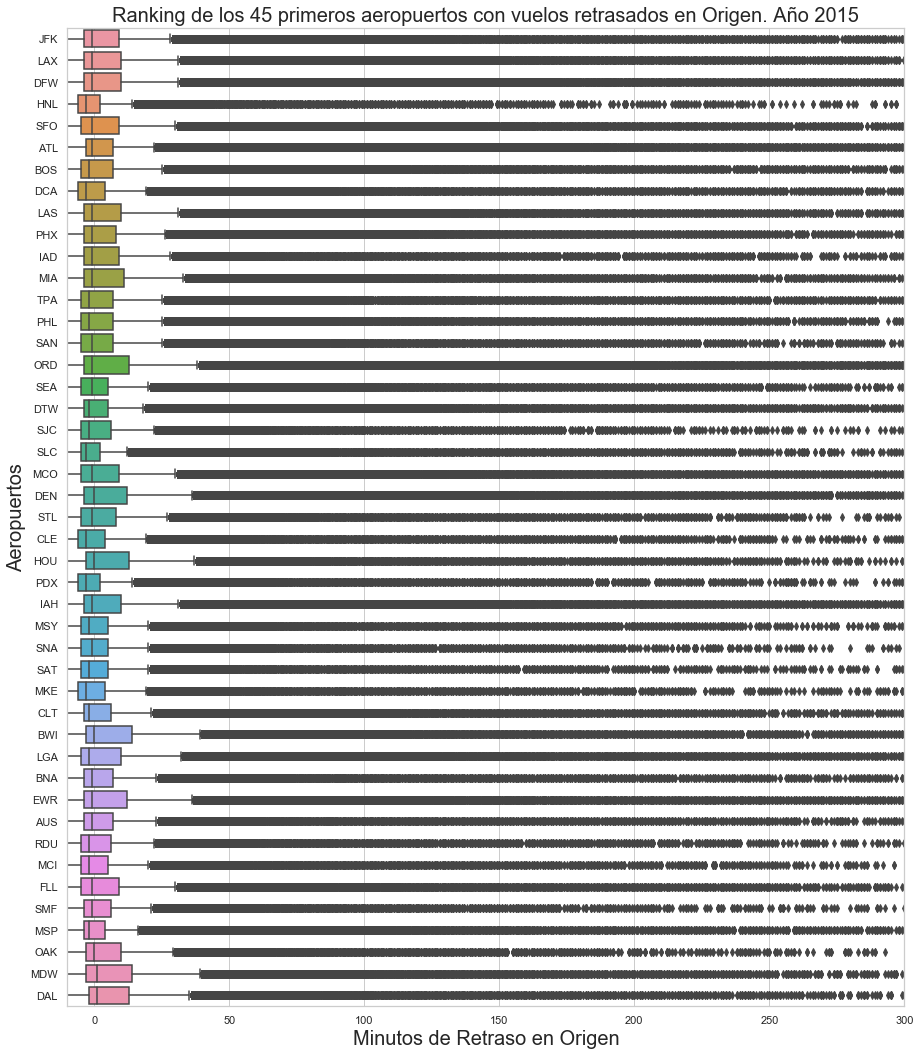

In [63]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-10,300)
ax = sns.boxplot(x=retrasosSalidaEnAeropuertos["DepDelay"], y=retrasosSalidaEnAeropuertos["Origin"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Origen", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

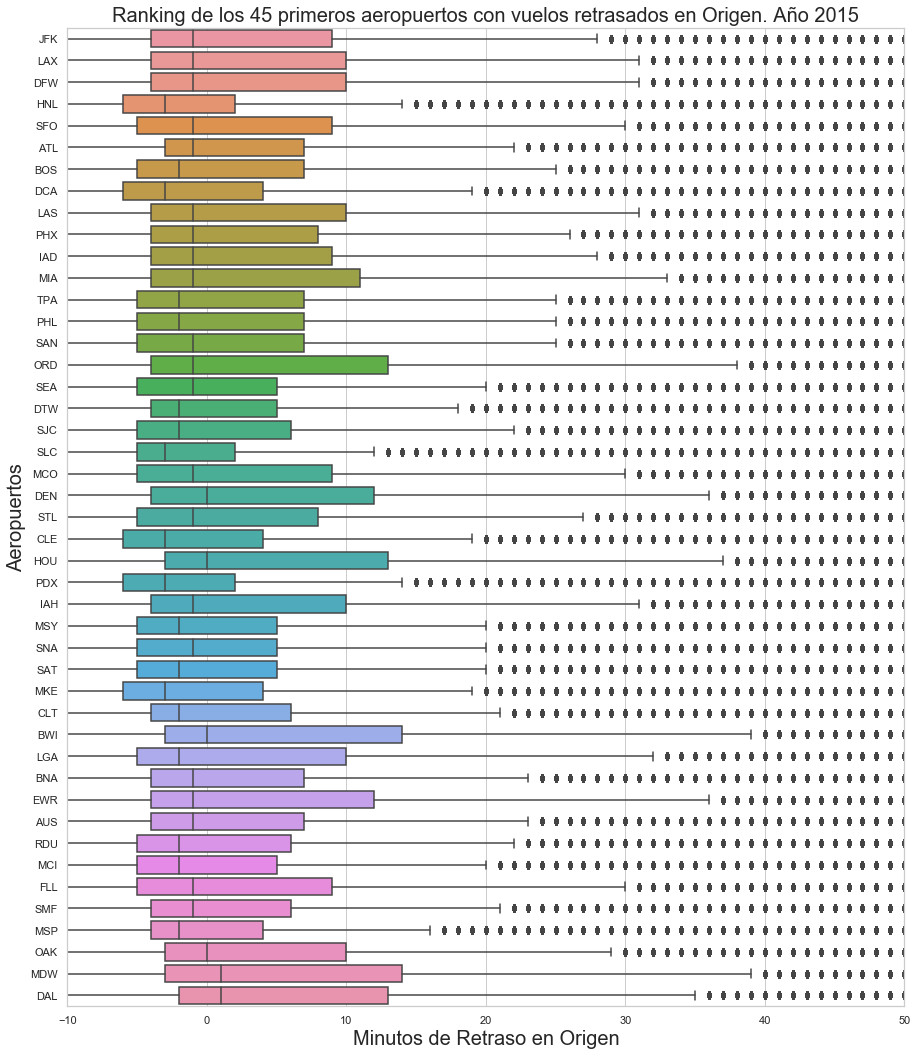

In [64]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-10,50)
ax = sns.boxplot(x=retrasosSalidaEnAeropuertos["DepDelay"], y=retrasosSalidaEnAeropuertos["Origin"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Origen", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Origen. Año ' + year , fontsize=20)

plt.show()

In [65]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en salidas
vuelosTotalesPorAeropuerto = retrasosSalidaEnAeropuertos.groupby('Origin').aggregate({'Origin': 'count', 'DepDel15':'sum'})

In [66]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Origin': 'VuelosTotales', 'DepDel15': 'VuelosRetrasados'})

In [67]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados de salida en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [68]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de salida en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

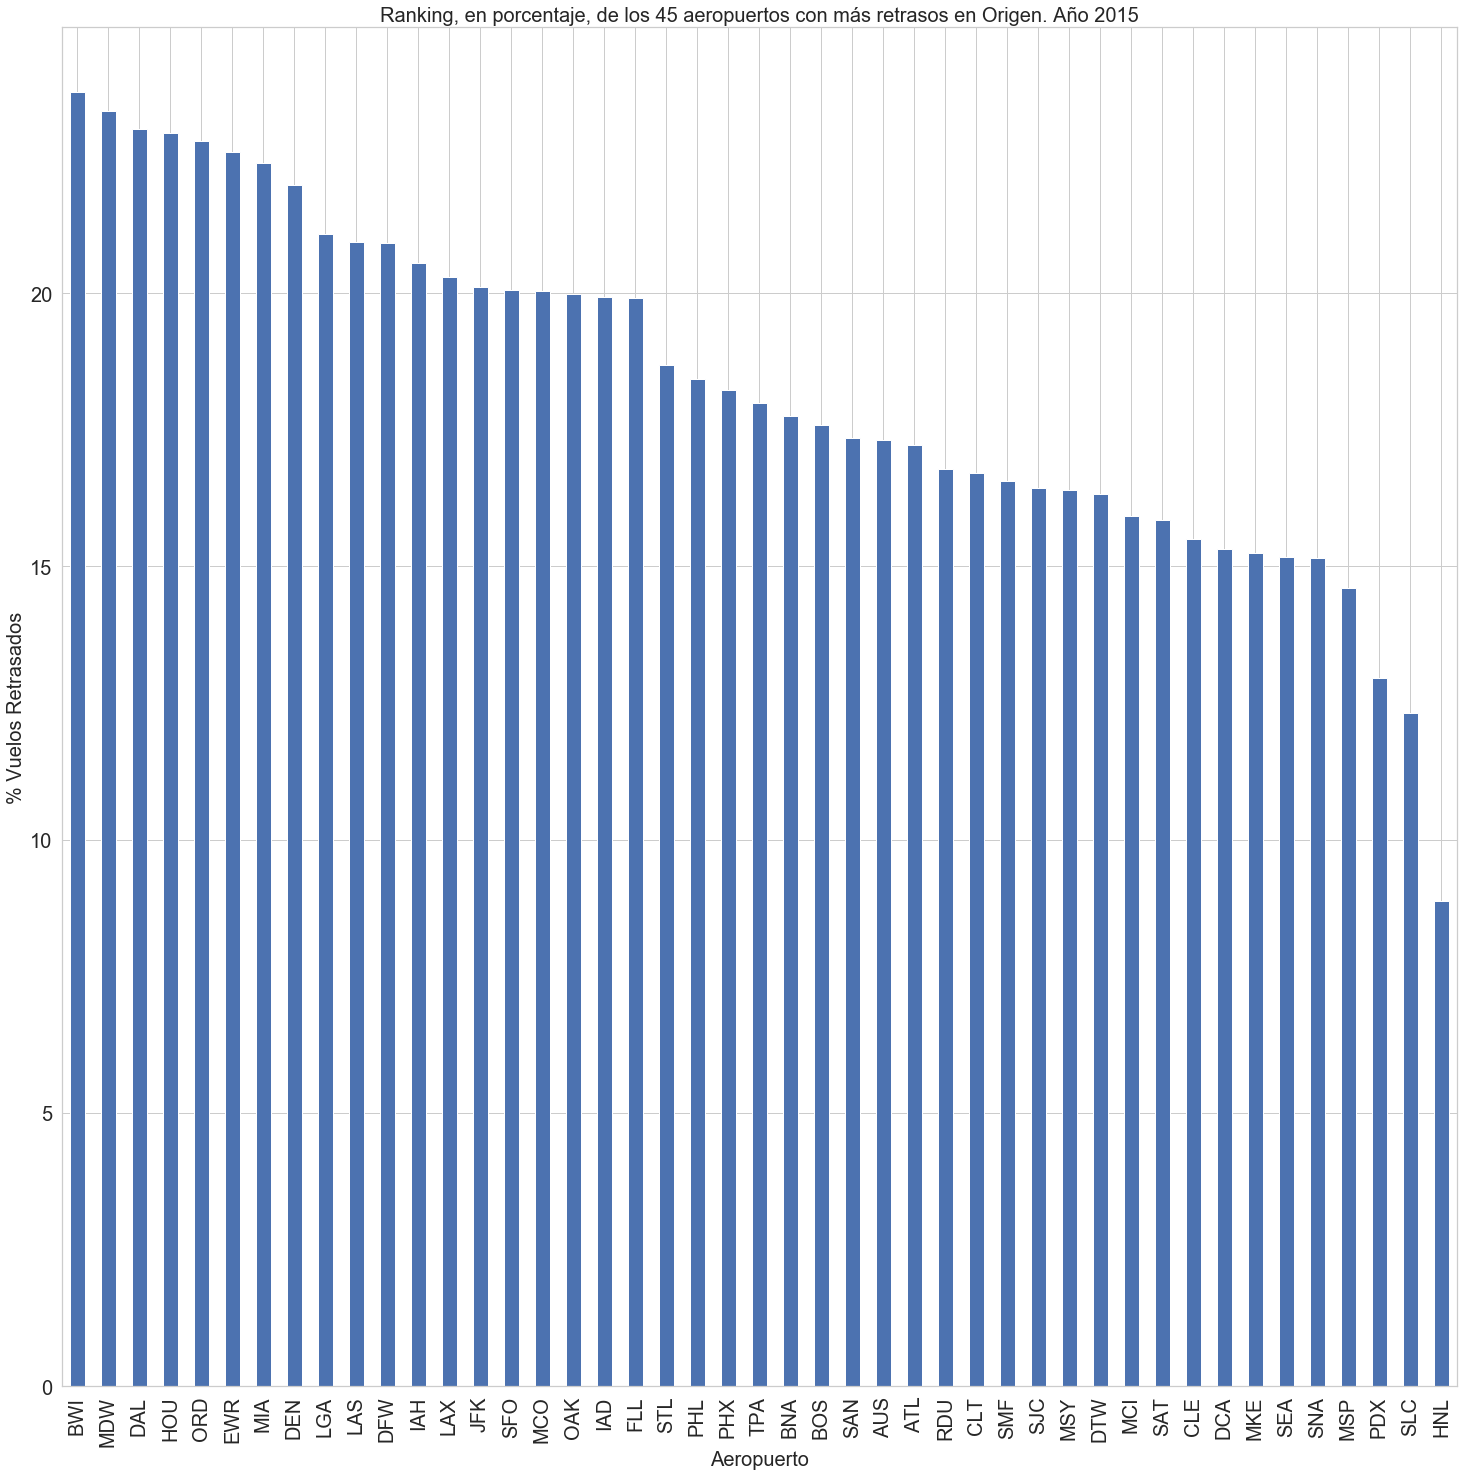

In [69]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

#### Dado que no podemos discernir si el mal tiempo fue a la llegada o la salida, en los retrasos de los vuelos de salida, así como en el caso de que el motivo sea el espacio aéreo, sólo podemos sacar el retraso, en llegadas, en función de la llegada tardía del vuelo anterior y por la aerolínea.

In [70]:
retrasosSalidaEnAeropuertos = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['DepDel15'] == 1])

In [71]:
retrasosSalidaEnAeropuertos.shape

(871656, 112)

In [72]:
#retrasos medios en salidas por aeropuerto causados por la llegada tardía del vuelo anterior
retrasoMedioEnSalidasPorLateAircraft = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['LateAircraftDelay'] > 0])


In [73]:
#usamos la media
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean', 'LateAircraftDelay' : 'mean'})

In [74]:
#renombramos las columnas
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal', 'LateAircraftDelay' : 'MediaTiempoRetrasado'})

In [75]:
#ordenamos por aeropuertos con retraso por llegada tardía del vuelo anterior
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.sort_values(['MediaTiempoRetrasado'], ascending=False)

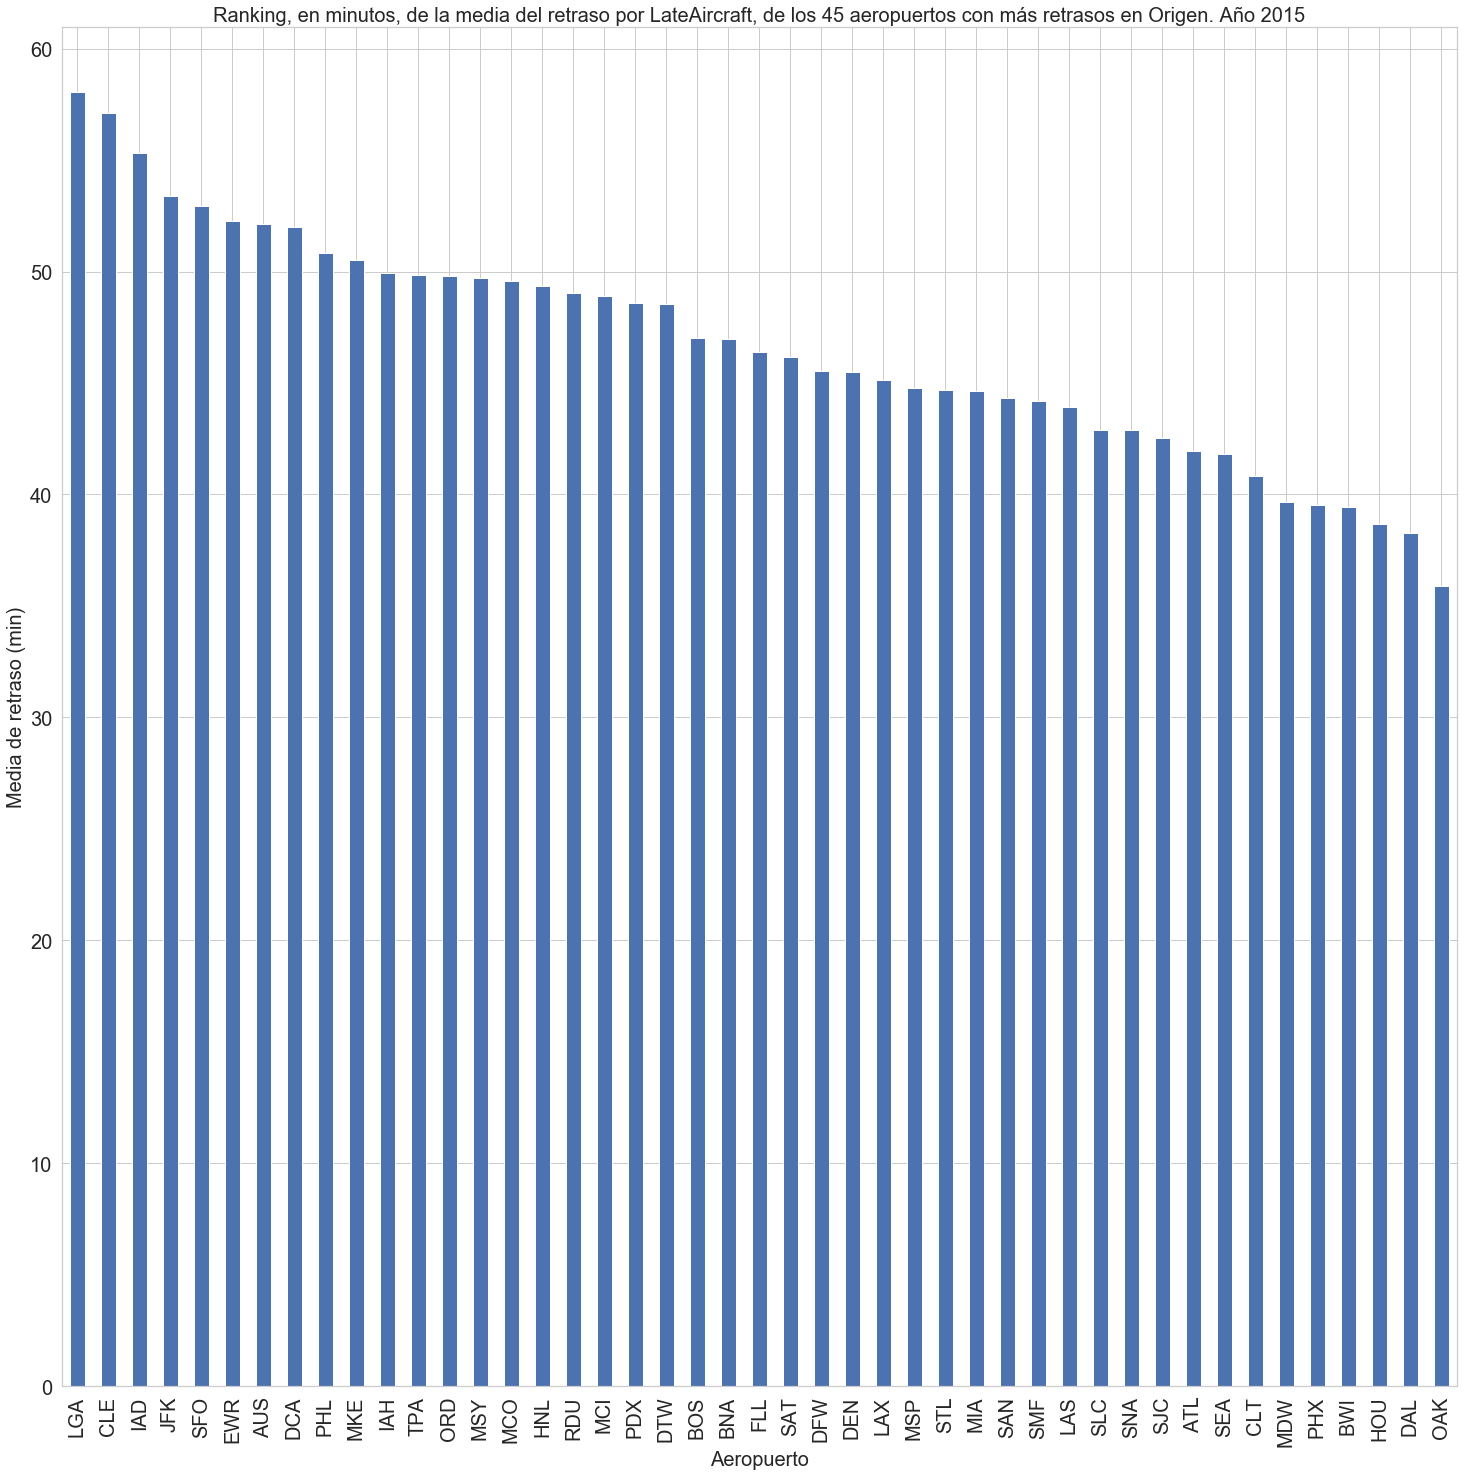

In [76]:
#mostramos la media de los retrasos por aeropuerto, ordenados, de los 45 aeropuertos con más retrasos

ax = retrasoMedioEnSalidasPorLateAircraft.MediaTiempoRetrasado.plot(kind='bar', figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media de retraso (min)", fontsize=20)
ax.set_title('Ranking, en minutos, de la media del retraso por LateAircraft, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

In [77]:
#mostramos el peso del retraso por llegada tardía del avión respecto al retraso total de la salida 
#(es decir por si tuvo otros factores)

retrasoMedioEnSalidasPorLateAircraft['PesoRetraso'] = (retrasoMedioEnSalidasPorLateAircraft['MediaTiempoRetrasado'] / retrasoMedioEnSalidasPorLateAircraft['MediaRetrasoTotal'])*100


In [78]:
#ordenamos por de mayor a menor peso
retrasoMedioEnSalidasPorLateAircraft = retrasoMedioEnSalidasPorLateAircraft.sort_values(['PesoRetraso'], ascending=False)

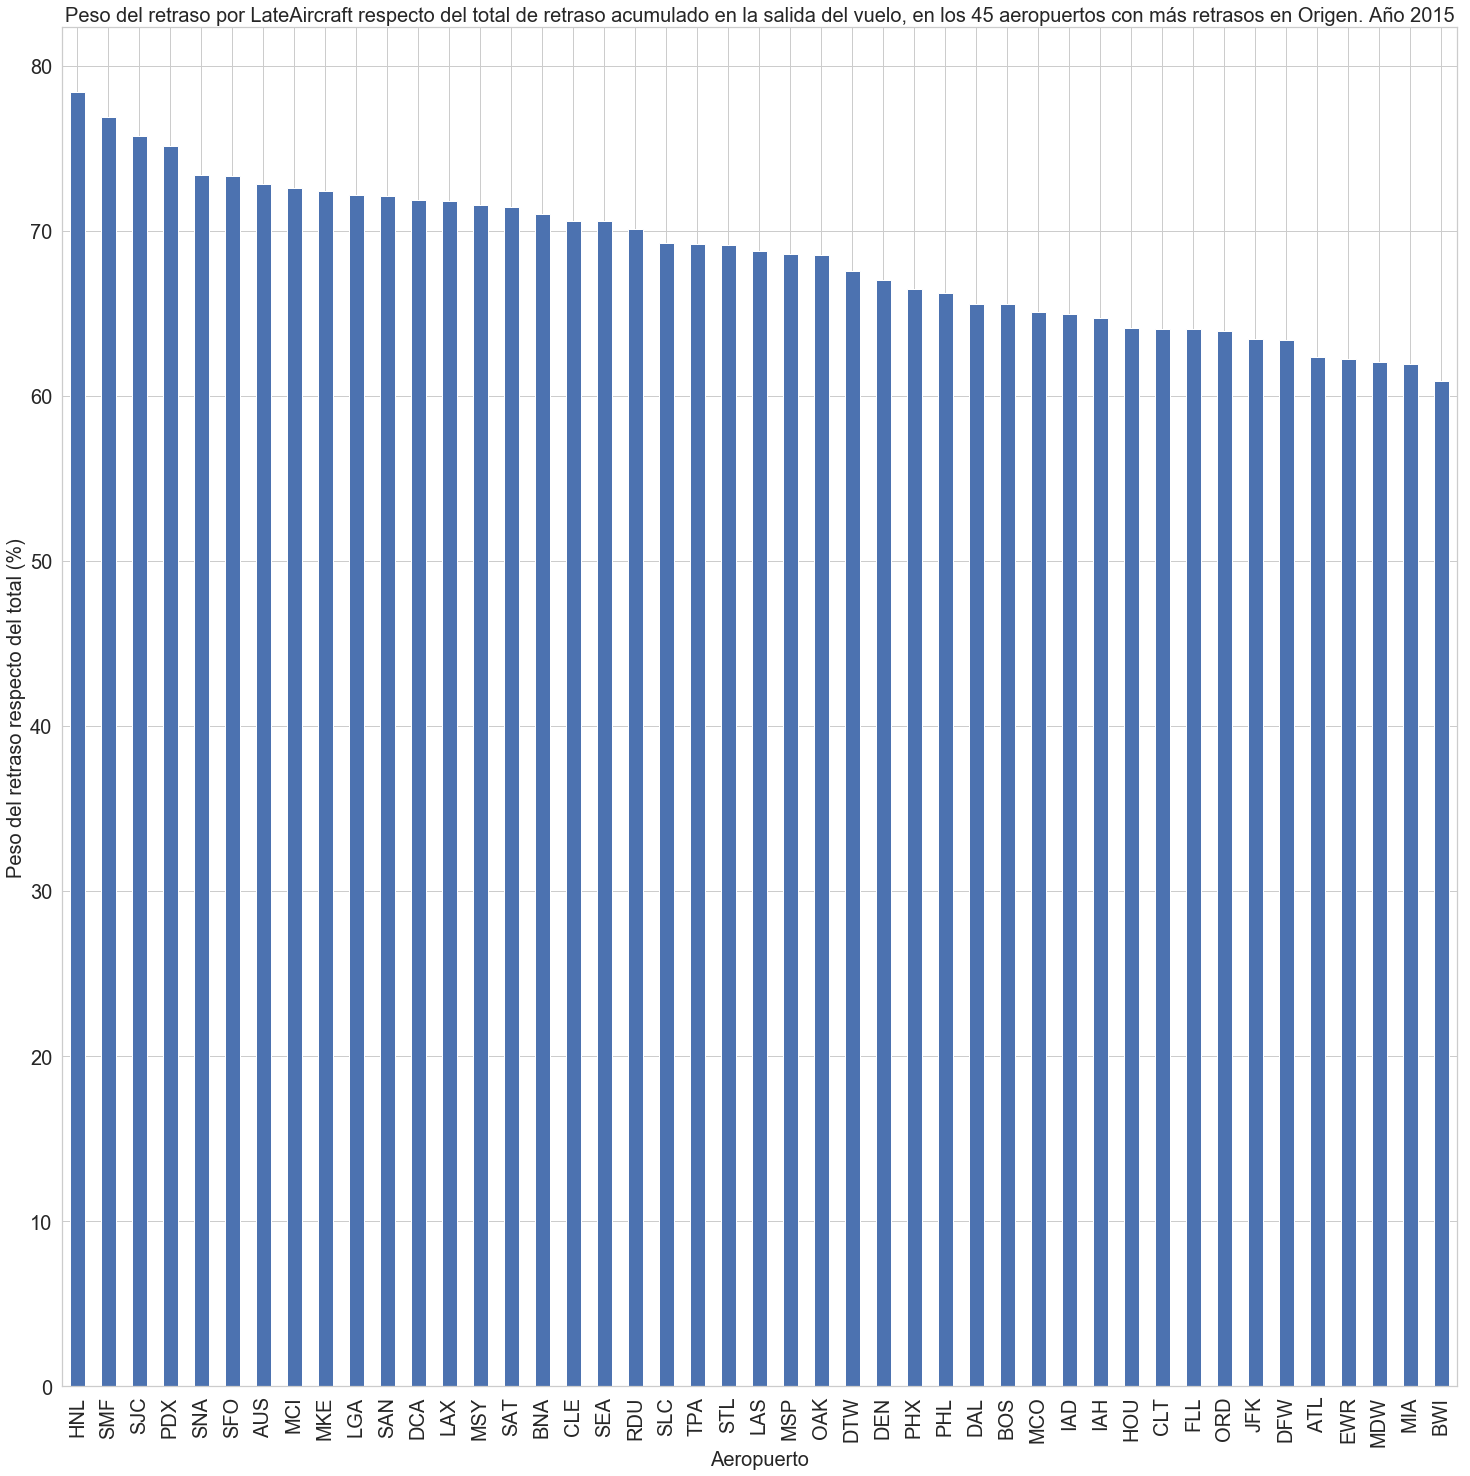

In [79]:
#mostramos  el peso del retraso de llegada tardía del vuelo anterior respecto del retraso total

ax = retrasoMedioEnSalidasPorLateAircraft.PesoRetraso.plot(kind='bar', figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Peso del retraso respecto del total (%)", fontsize=20)
ax.set_title('Peso del retraso por LateAircraft respecto del total de retraso acumulado en la salida del vuelo, en los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)

plt.show()

#### Aquellos vuelos retrasados que al menos lo están por la llegada tardía del vuelo anterior, tendrán otros motivos para llegar al 100% del peso relativo de la causa del retraso. Lo veremos más adelante.

In [80]:
#retrasos medios en salidas por aeropuerto causados por problemas de la aerolínea
retrasoMedioEnSalidasPorAerolinea = pd.DataFrame(retrasosSalidaEnAeropuertos[retrasosSalidaEnAeropuertos['CarrierDelay'] > 0])

#usamos la media 
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean', 'CarrierDelay' : 'mean'})

#renombramos las columnas
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal', 'CarrierDelay' : 'MediaTiempoRetrasado'})

#ordenamos por aeropuertos con retraso por motivo de la aerolinea
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.sort_values(['MediaTiempoRetrasado'], ascending=False)

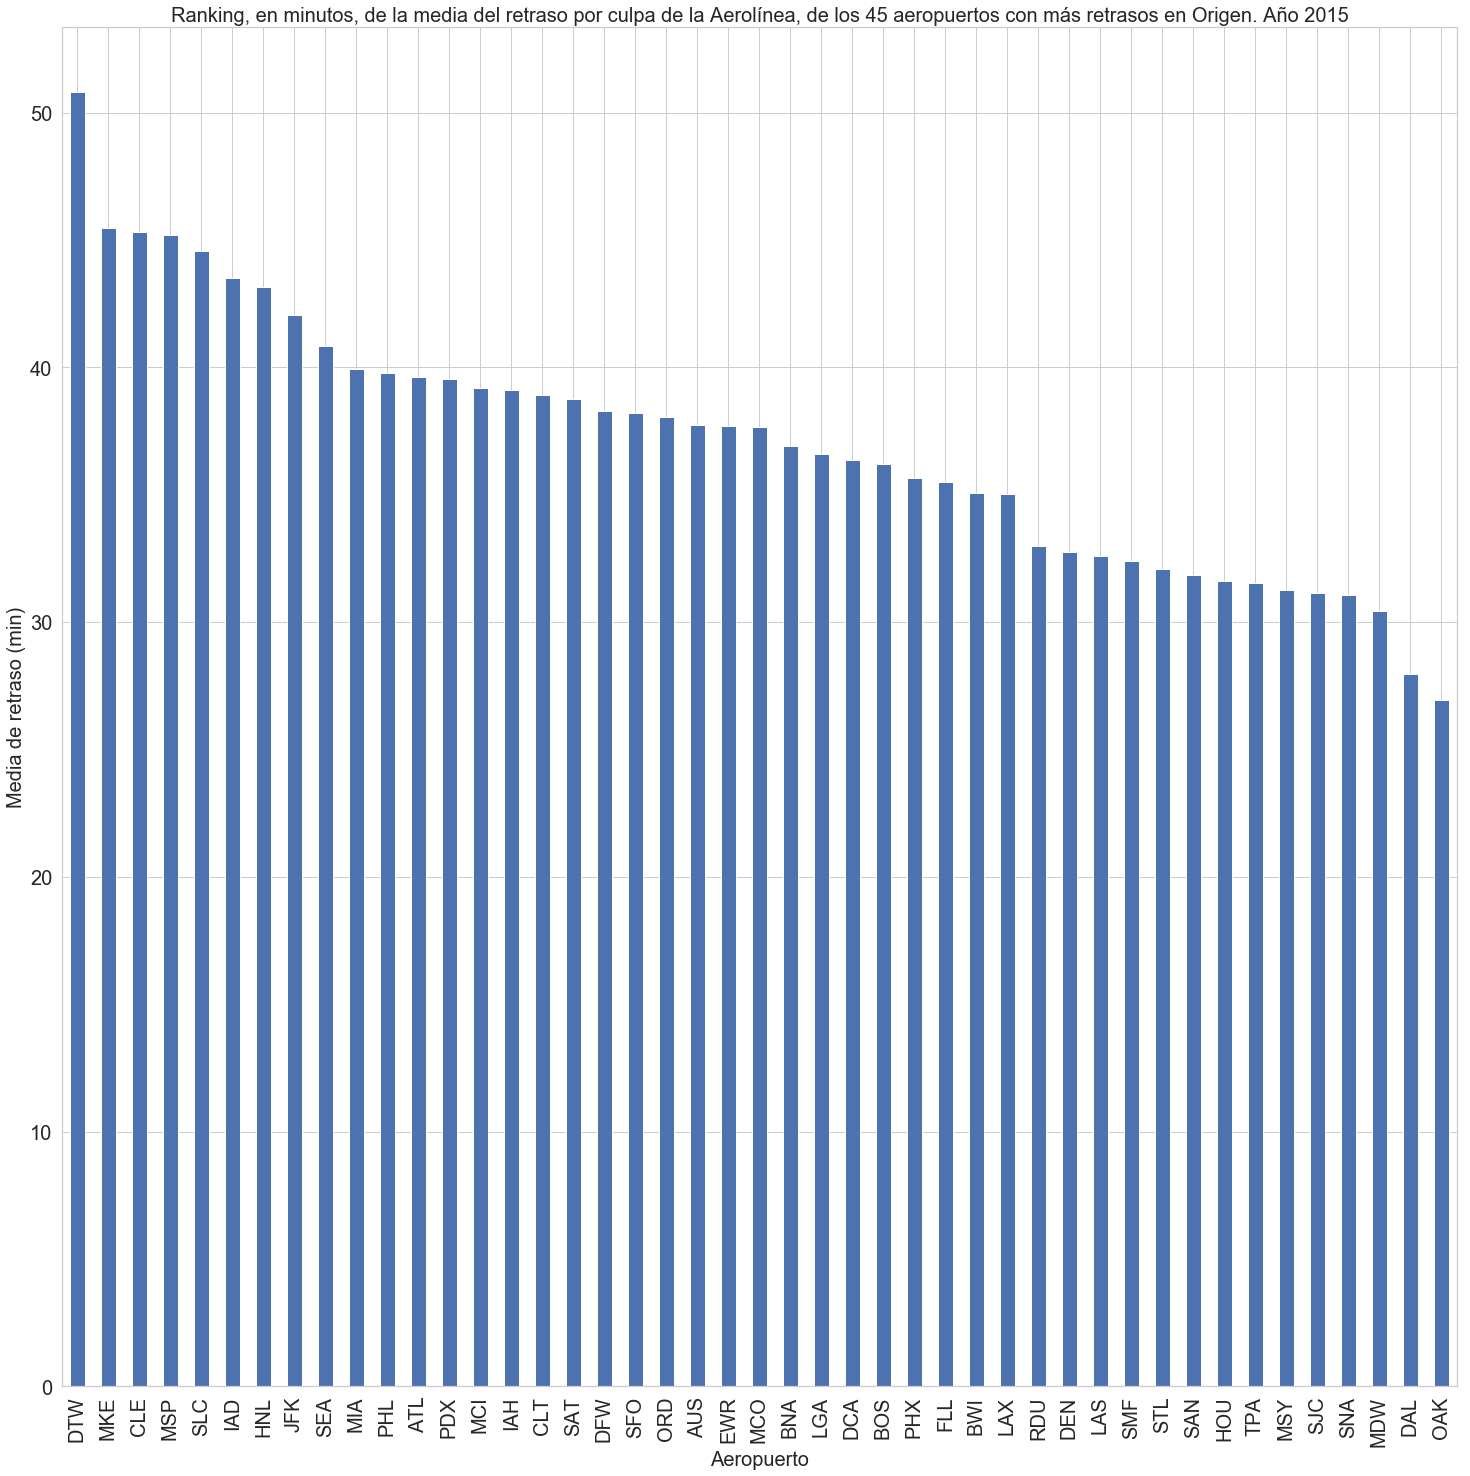

In [81]:
#mostramos la media de los retrasos por aeropuerto, ordenados, de los 45 aeropuertos con más retrasos

ax = retrasoMedioEnSalidasPorAerolinea.MediaTiempoRetrasado.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media de retraso (min)", fontsize=20)
ax.set_title('Ranking, en minutos, de la media del retraso por culpa de la Aerolínea, de los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)
plt.show()

In [82]:
#mostramos el peso del retraso por la aerolínea respecto al retraso total de la salida 
#(es decir por si tuvo otros factores)

retrasoMedioEnSalidasPorAerolinea['PesoRetraso'] = (retrasoMedioEnSalidasPorAerolinea['MediaTiempoRetrasado'] / retrasoMedioEnSalidasPorAerolinea['MediaRetrasoTotal'])*100

#ordenamos por de mayor a menor peso
retrasoMedioEnSalidasPorAerolinea = retrasoMedioEnSalidasPorAerolinea.sort_values(['PesoRetraso'], ascending=False)


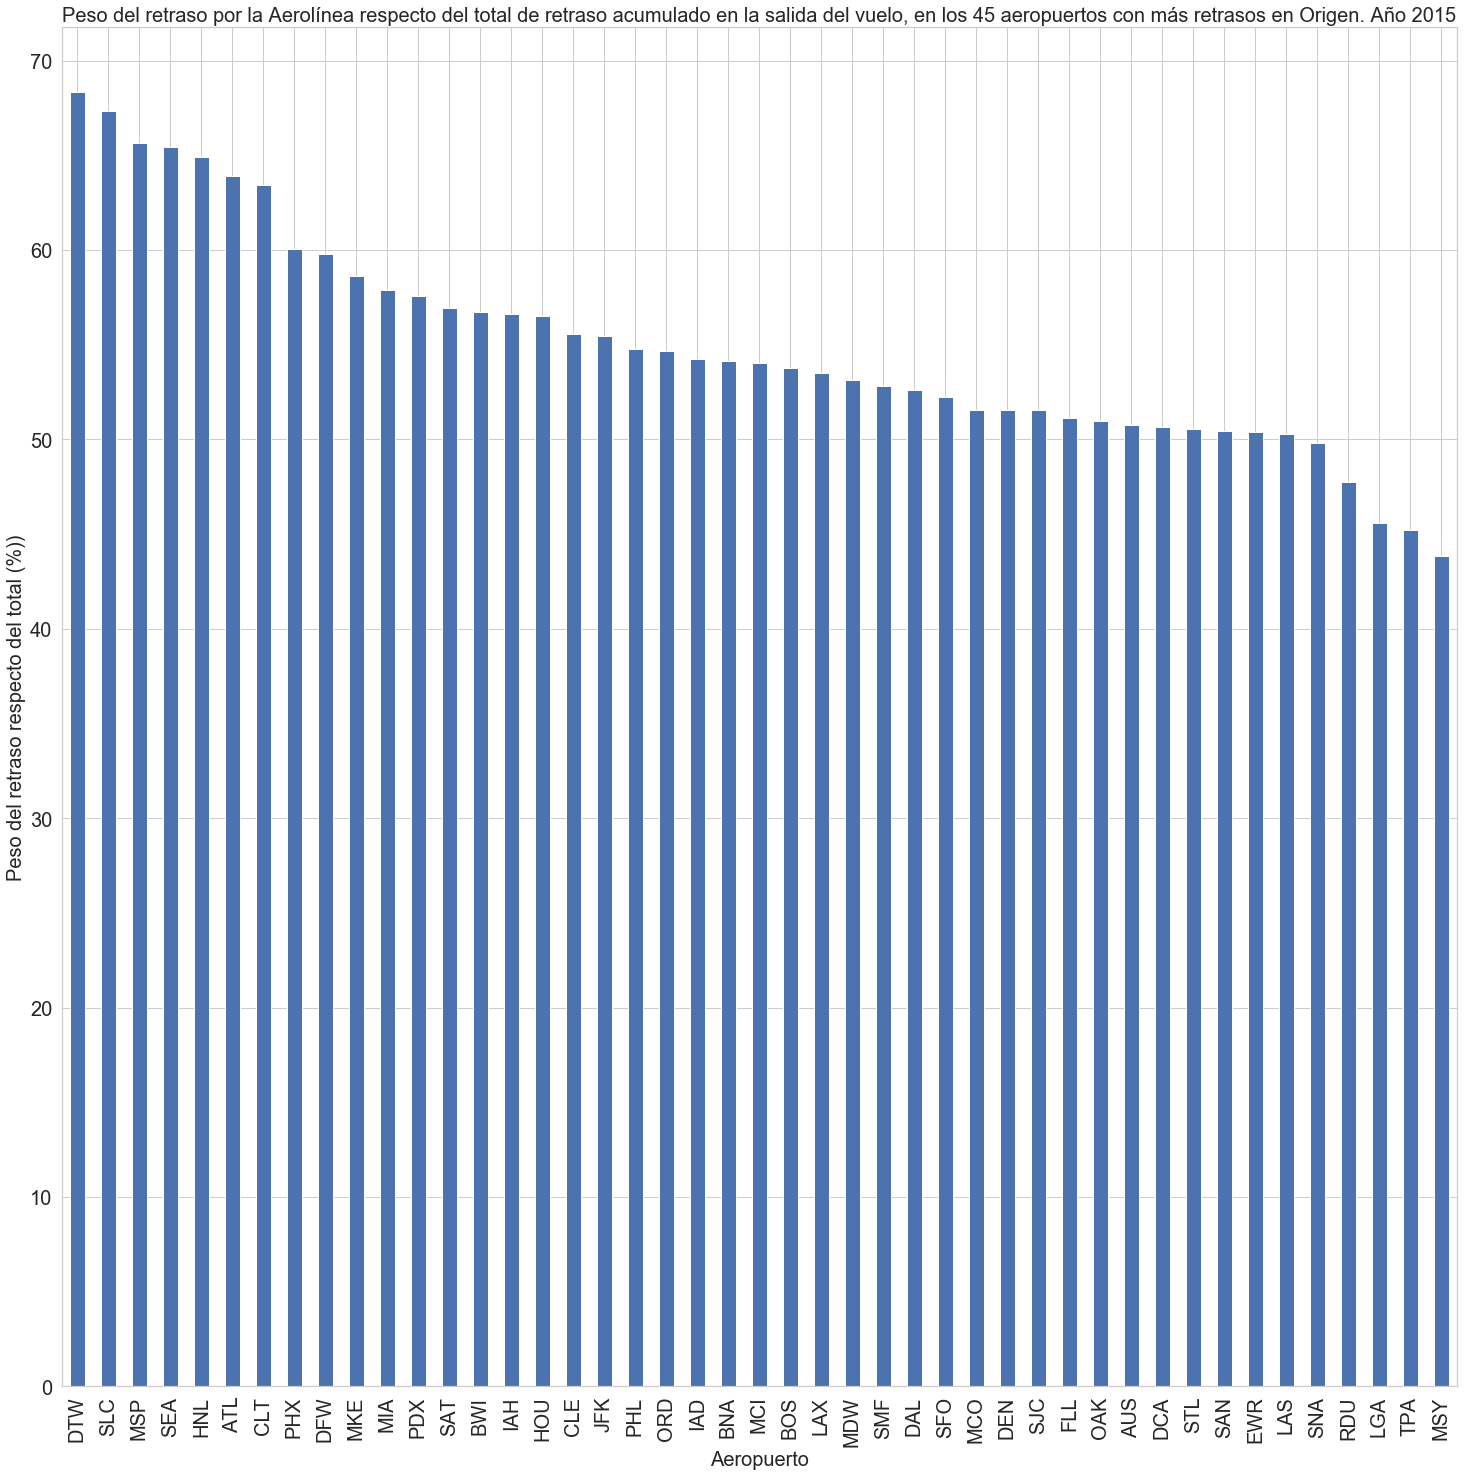

In [83]:
#mostramos el peso del retraso de la aerolínea respecto del retraso total

ax = retrasoMedioEnSalidasPorAerolinea.PesoRetraso.plot(kind='bar',
                                figsize=(25,25), fontsize=20)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Peso del retraso respecto del total (%))", fontsize=20)
ax.set_title('Peso del retraso por la Aerolínea respecto del total de retraso acumulado en la salida del vuelo, en los 45 aeropuertos con más retrasos en Origen. Año ' + year, fontsize=20)
plt.show()

#### Aquellos vuelos retrasados que al menos lo están por la aerolínea, tendrán otros motivos para llegar al 100% del peso relativo de la causa del retraso. Lo veremos más adelante.

#### Vamos a coger las 3 combinaciones posibles para tratar de afinar más los motivos de retrasos en salidas
1. Que tenga retraso tanto por Aerolínea como por llegada tardía del avión
2. Que tenga retraso sólo por llegada tardía del avión
3. Que tengra retraso sólo por aerolínea

In [84]:
#primero cogemos todos los retrasos, sean cual sea el tipo en salidas
retrasosSalidaEnAeropuertos = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1])
#nos quedamos con los 45 aeropuertos con más retrasos
retrasosSalidaEnAeropuertos= retrasosSalidaEnAeropuertos.loc[(retrasosSalidaEnAeropuertos["Origin"].isin(aeropuertos))]


In [85]:
retrasosSalidaEnAeropuertos.shape

(871656, 112)

In [86]:
#ahora cogemos las 3 combinaciones

#ambos tipos de retrasos
retrasosSalidaEnAeropuertosLateAndAirline = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] > 0) & (dfanual['LateAircraftDelay'] > 0)])

#retraso por llegada tardía del avión anterior
retrasosSalidaSoloLateAircraft = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] == 0) & (dfanual['LateAircraftDelay'] > 0)])

#retraso por la aerolínea
retrasosSalidaSoloAirline = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] > 0) & (dfanual['LateAircraftDelay'] == 0)])


In [87]:
#nos quedamos con los retrasos de los 45 primeros aeropuertos (por número de retrasos)

retrasosSalidaEnAeropuertosLateAndAirline= retrasosSalidaEnAeropuertosLateAndAirline.loc[(retrasosSalidaEnAeropuertosLateAndAirline["Origin"].isin(aeropuertos))]
retrasosSalidaSoloLateAircraft= retrasosSalidaSoloLateAircraft.loc[(retrasosSalidaSoloLateAircraft["Origin"].isin(aeropuertos))]
retrasosSalidaSoloAirline= retrasosSalidaSoloAirline.loc[(retrasosSalidaSoloAirline["Origin"].isin(aeropuertos))]


In [88]:
retrasosSalidaEnAeropuertosLateAndAirline.shape

(229397, 112)

In [89]:
retrasosSalidaSoloLateAircraft.shape

(185679, 112)

In [90]:
retrasosSalidaSoloAirline.shape

(197499, 112)

In [91]:
#podríamos inferir los de meteo en salidas si:
#el retraso de llegadas es menor o igual que al de salida y el conteo de meteo = al de salida

retrasosSalidaSoloMeteo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['WeatherDelay'] == dfanual['DepDelay'])])

In [92]:
retrasosSalidaSoloMeteo= retrasosSalidaSoloMeteo.loc[(retrasosSalidaSoloMeteo["Origin"].isin(aeropuertos))]

In [93]:
retrasosSalidaSoloMeteo.shape

(582, 112)

In [94]:
retrasosSalidaSoloNAS = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['NASDelay'] == dfanual['DepDelay'])])

In [95]:
retrasosSalidaSoloNAS= retrasosSalidaSoloNAS.loc[(retrasosSalidaSoloNAS["Origin"].isin(aeropuertos))]

In [96]:
retrasosSalidaSoloNAS.shape

(1331, 112)

In [97]:
retrasosSalidaSoloSecurity = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['SecurityDelay'] == dfanual['DepDelay'])])

In [98]:
retrasosSalidaSoloSecurity = retrasosSalidaSoloSecurity.loc[(retrasosSalidaSoloSecurity["Origin"].isin(aeropuertos))]

In [99]:
retrasosSalidaSoloSecurity.shape

(53, 112)

In [100]:
retrasosSalidaSoloLateAircraft2 = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['LateAircraftDelay'] == dfanual['DepDelay'])])

In [101]:
retrasosSalidaSoloLateAircraft2 = retrasosSalidaSoloLateAircraft2.loc[(retrasosSalidaSoloLateAircraft2["Origin"].isin(aeropuertos))]

In [102]:
retrasosSalidaSoloLateAircraft2.shape

(4825, 112)

In [103]:
retrasosSalidaSoloAerolinea2 = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay']) & (dfanual['CarrierDelay'] == dfanual['DepDelay'])])

retrasosSalidaSoloAerolinea2 = retrasosSalidaSoloAerolinea2.loc[(retrasosSalidaSoloAerolinea2["Origin"].isin(aeropuertos))]

retrasosSalidaSoloAerolinea2.shape

(6583, 112)

### 1.3.3.2 Análisis de qué ocurre en el Aeropuerto de Destino si en Origen hay retrasos

#### Vuelos retrasados de salida que llegan con el mismo retraso a la llegada

In [104]:
retrasosSalidaIgualLlegada = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] >= dfanual['ArrDelay'])])

In [105]:
retrasosSalidaIgualLlegada = retrasosSalidaIgualLlegada.loc[(retrasosSalidaIgualLlegada["Origin"].isin(aeropuertos))]


#### Vuelos de salida que aumentan su retraso en la llegada (por motivos adicionales a la salida)

In [106]:
retrasosPosterioresSalida = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['DepDelay'] < dfanual['ArrDelay'])])

retrasosPosterioresSalida = retrasosPosterioresSalida.loc[(retrasosPosterioresSalida["Origin"].isin(aeropuertos))]


#### Vuelos de salida con retraso que recuperan todo el retraso a la llegada

In [107]:
retrasosRecuperados = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['ArrDelay'] <= 0)])

retrasosRecuperados = retrasosRecuperados.loc[(retrasosRecuperados["Origin"].isin(aeropuertos))]


In [108]:
recupera = retrasosRecuperados.shape[0]
igual = retrasosSalidaIgualLlegada.shape[0]
masTarde = retrasosPosterioresSalida.shape[0]

Text(0.5, 1.0, 'Capacidad de recuperación del retraso en destino por retraso en origen')

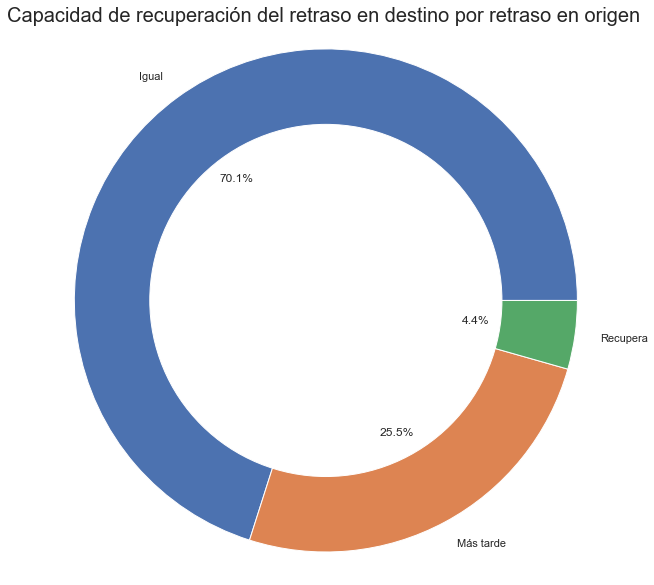

In [109]:
plt.figure(figsize=(10, 10))
etiquetas_1 = ['Igual', 'Más tarde', 'Recupera']
datos = [igual,masTarde, recupera]

plt.pie(datos, labels=etiquetas_1, autopct='%1.1f%%')
centre_circle_1 = plt.Circle((0, 0), 0.7, fc='white')
fig_1 = plt.gcf()
fig_1.gca().add_artist(centre_circle_1)
plt.axis('equal')
plt.title('Capacidad de recuperación del retraso en destino por retraso en origen', fontsize=20)

### 1.3.3.3 Visualización retrasos en Destino con duración similar al Origen

In [110]:
#cálculo de los que no recuperan tiempo a la llegada, pero no llegan más tarde, visto por aeropuerto origen, 
#por aerolínea y por distancia del vuelo

retrasosSalidaIgualLlegadaPorAeropuertoOrigen = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAeropuertoOrigen = retrasosSalidaIgualLlegadaPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorAeropuertoDestino = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAeropuertoDestino = retrasosSalidaIgualLlegadaPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorAerolinea = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorAerolinea = retrasosSalidaIgualLlegadaPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosSalidaIgualLlegadaPorDistanciaADestino = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorDistanciaADestino = retrasosSalidaIgualLlegadaPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


In [111]:
#ordenamos por de mayor a menor retraso
retrasosSalidaIgualLlegadaPorAeropuertoOrigen = retrasosSalidaIgualLlegadaPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosSalidaIgualLlegadaPorAeropuertoDestino = retrasosSalidaIgualLlegadaPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosSalidaIgualLlegadaPorAerolinea = retrasosSalidaIgualLlegadaPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


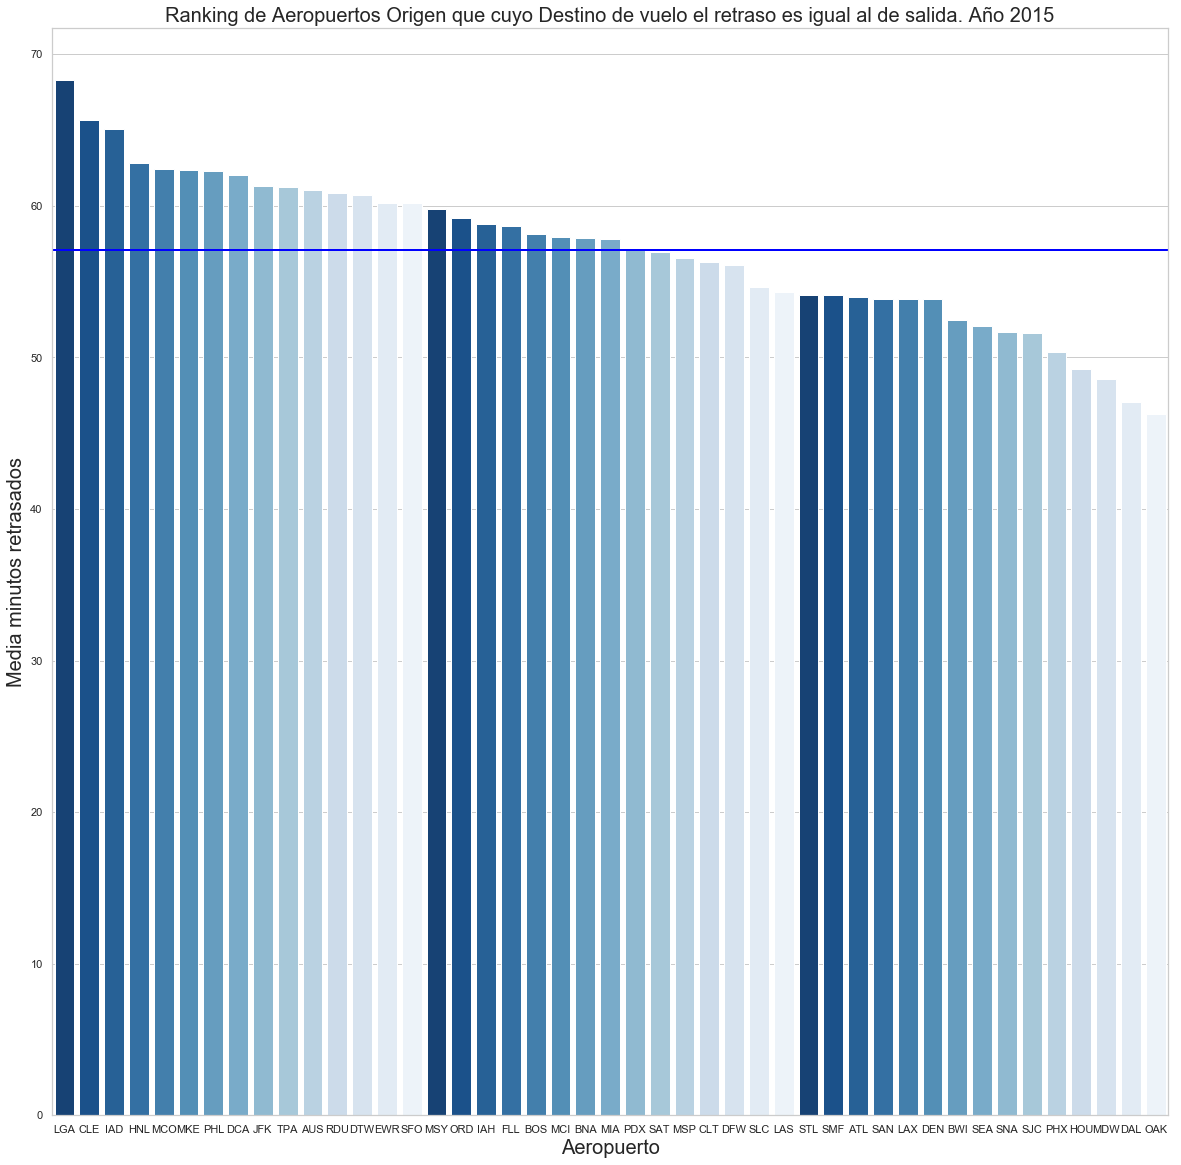

In [112]:
#Ranking de Aeropuertos Origen que cuyo Destino de vuelo el retraso es igual al de salida.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", 15)# len(retrasosSalidaIgualLlegadaPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAeropuertoOrigen.index, y=retrasosSalidaIgualLlegadaPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen que cuyo Destino de vuelo el retraso es igual al de salida. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

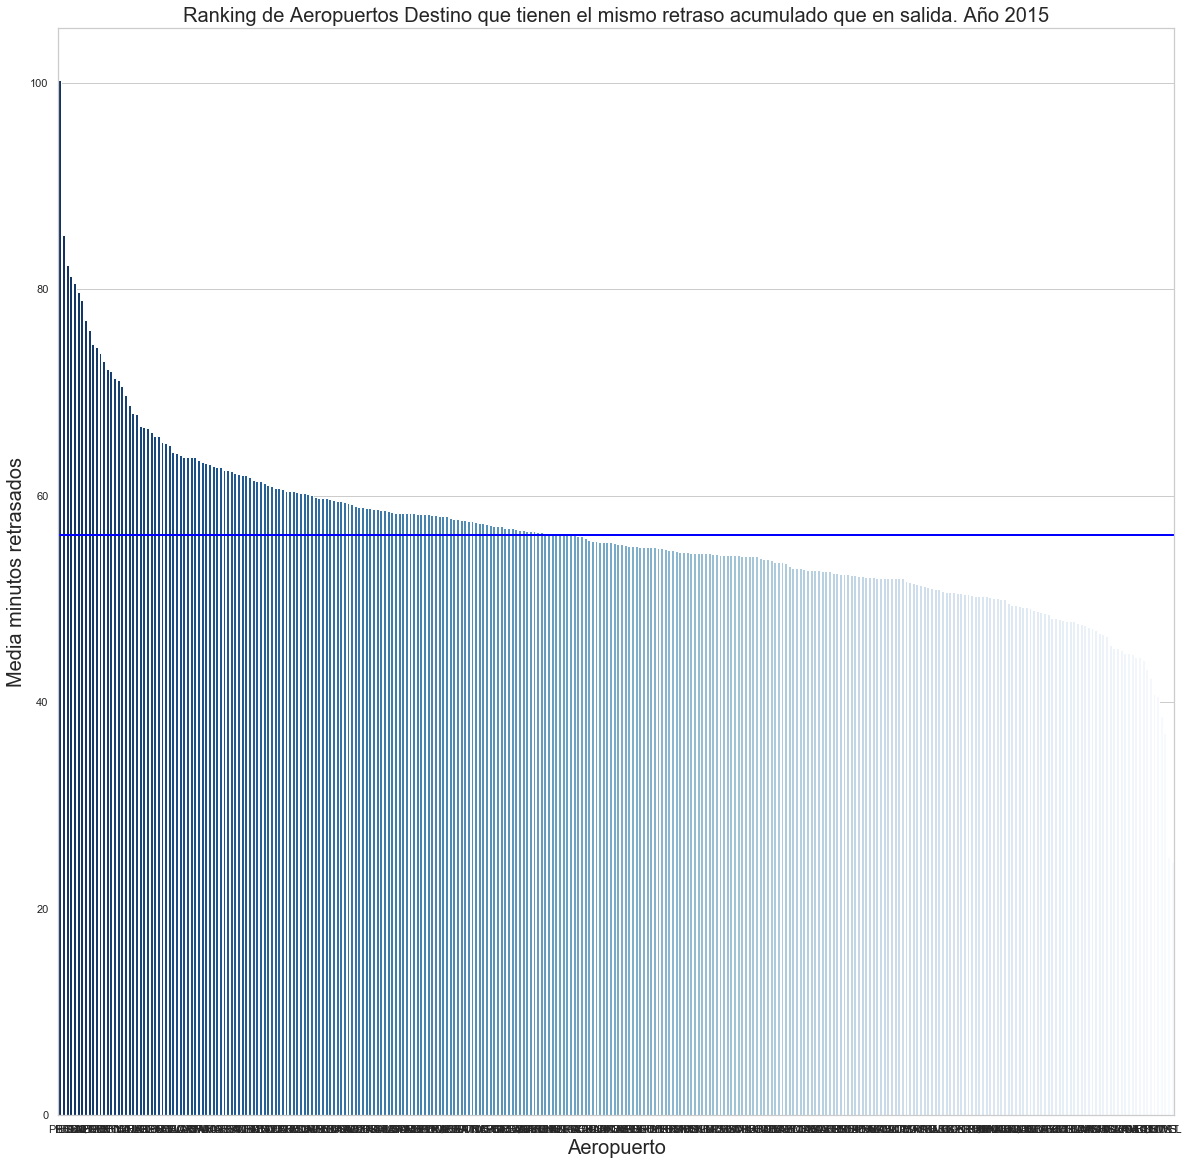

In [113]:
#Ranking de Aeropuertos Destino que tienen el mismo retraso acumulado que en salida

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaIgualLlegadaPorAeropuertoDestino))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAeropuertoDestino.index, y=retrasosSalidaIgualLlegadaPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que tienen el mismo retraso acumulado que en salida. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

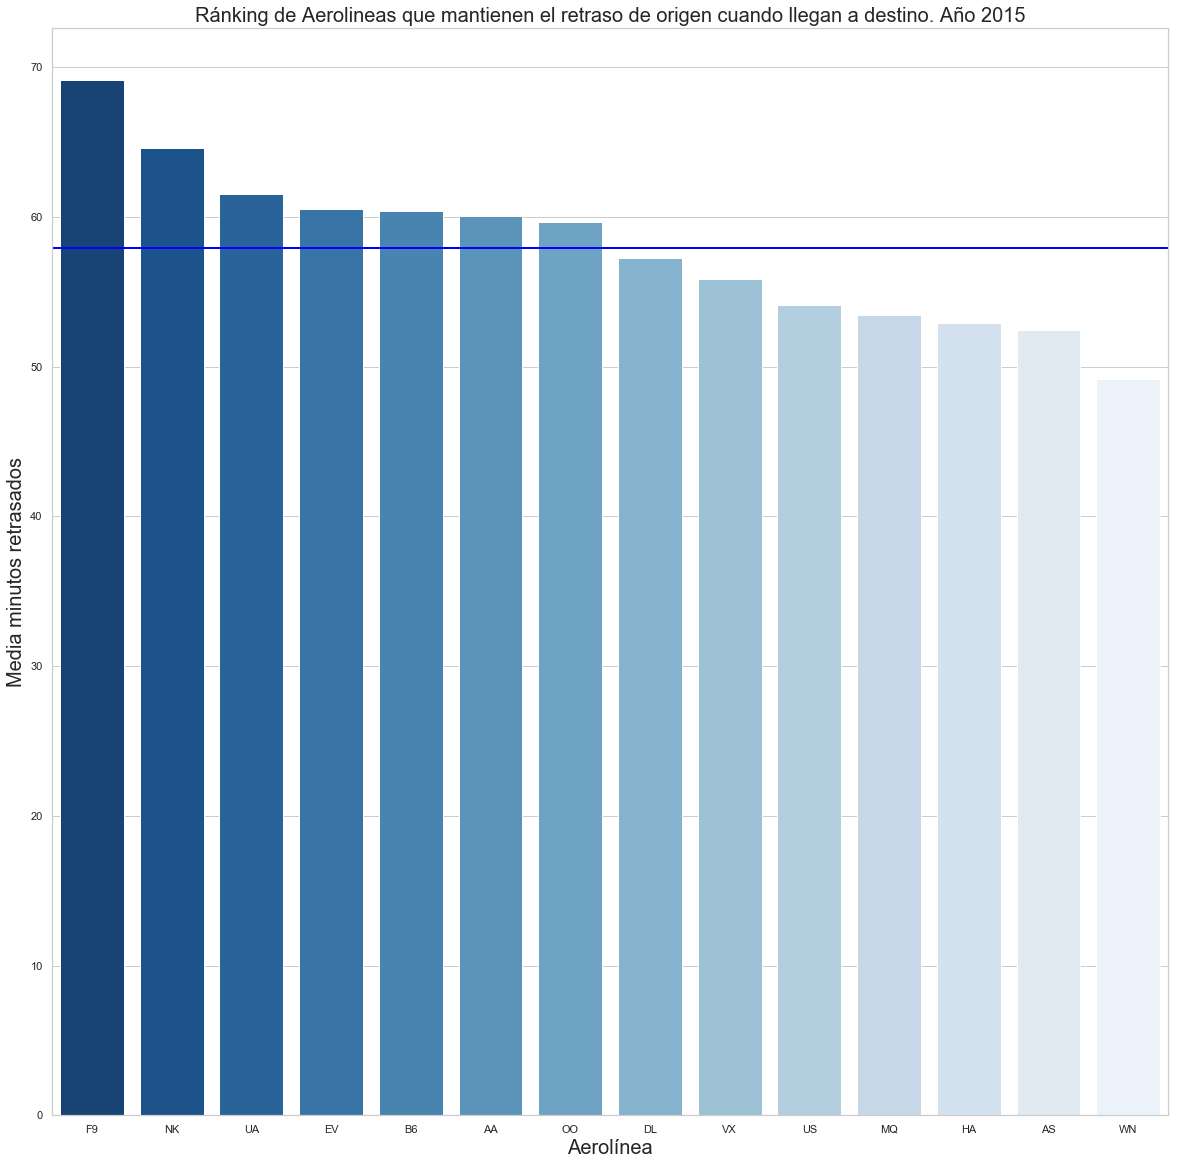

In [114]:
#Ránking de Aerolineas que mantienen el retraso de origen cuando llegan a destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaIgualLlegadaPorAerolinea))
ax = sns.barplot(x=retrasosSalidaIgualLlegadaPorAerolinea.index, y=retrasosSalidaIgualLlegadaPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que mantienen el retraso de origen cuando llegan a destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

In [115]:
#el índice de este DataFrame contiene lo que había en DistanceGroups
#que son los rangos de distancias separados en 250 millas
#para las etiquetas del gráfico, en el eje x, lo convertimos a rangos reales para mejorar la comprensión

my_xticks = []
desde = 0
for index, row in retrasosSalidaIgualLlegadaPorDistanciaADestino.iterrows():
    hasta = index * 250
    my_xticks.append(str(desde) + '-' + str(hasta))
    desde = hasta
    
my_xticks

['0-250',
 '250-500',
 '500-750',
 '750-1000',
 '1000-1250',
 '1250-1500',
 '1500-1750',
 '1750-2000',
 '2000-2250',
 '2250-2500',
 '2500-2750']

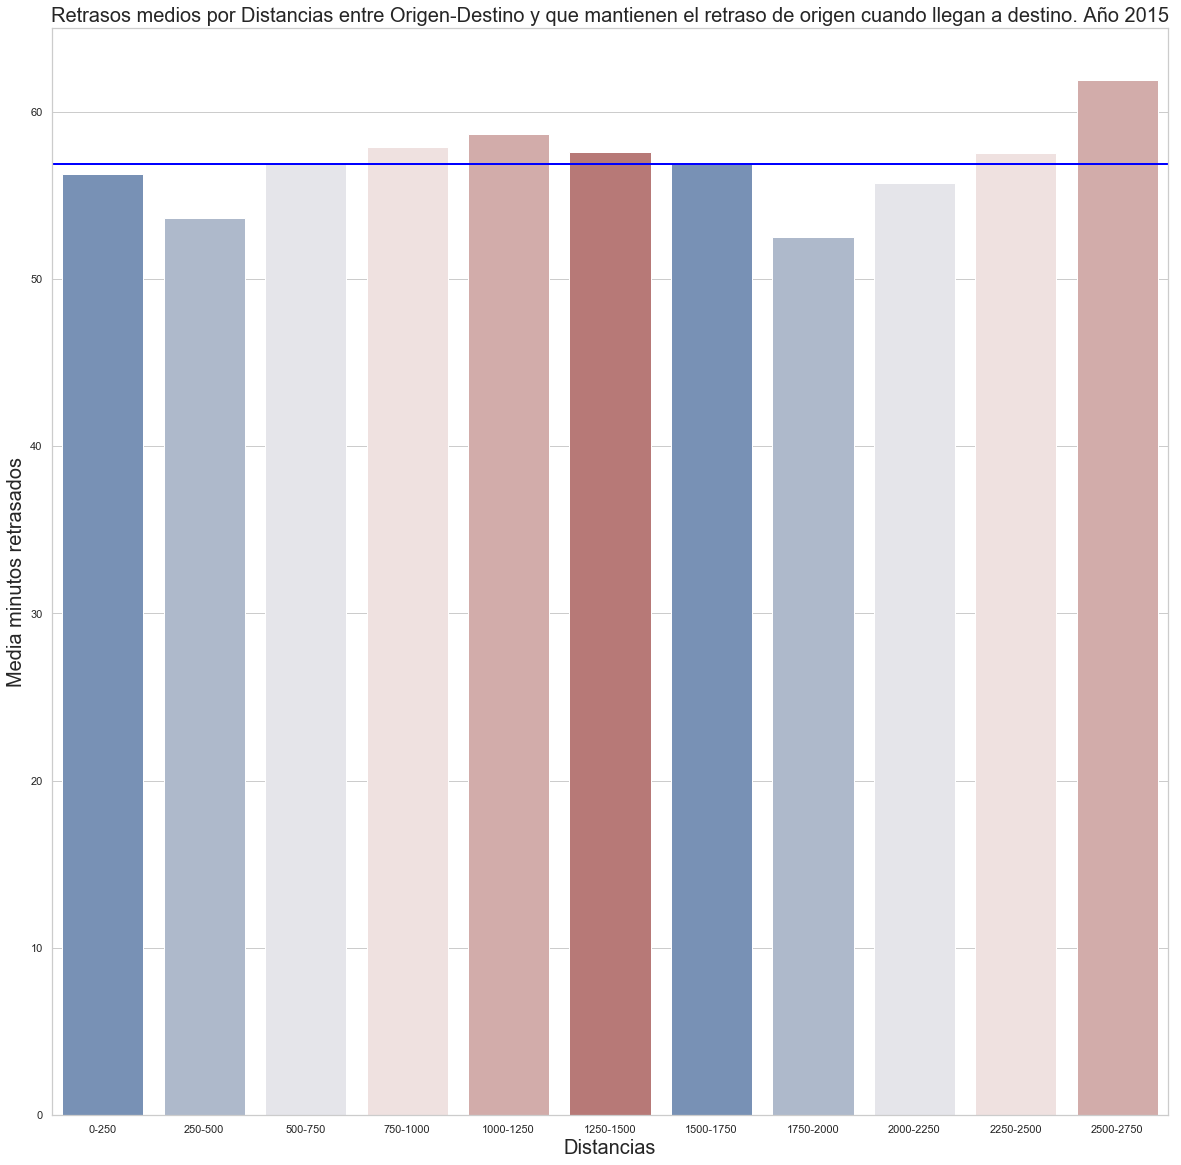

In [116]:
#Retrasos medios por Distancias entre Origen-Destino y que mantienen el retraso de origen cuando llegan a destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosSalidaIgualLlegadaPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino y que mantienen el retraso de origen cuando llegan a destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.4 Visualización de Retrasos en Destino que aumentan con respecto al de Origen

In [117]:
#cálculo de los que el retraso aumenta en Destino con respecto al retraso de Origen
#Visto por origen, destino, aerolínea y por distancia del vuelo

retrasosPosterioresSalidaPorAeropuertoOrigen = pd.DataFrame(retrasosPosterioresSalida.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAeropuertoOrigen = retrasosPosterioresSalidaPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorAeropuertoDestino = pd.DataFrame(retrasosPosterioresSalida.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAeropuertoDestino = retrasosPosterioresSalidaPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorAerolinea = pd.DataFrame(retrasosPosterioresSalida.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorAerolinea = retrasosPosterioresSalidaPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosPosterioresSalidaPorDistanciaADestino = pd.DataFrame(retrasosPosterioresSalida.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorDistanciaADestino = retrasosPosterioresSalidaPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [118]:
#ordenamos por de mayor a menor retraso
retrasosPosterioresSalidaPorAeropuertoOrigen = retrasosPosterioresSalidaPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosPosterioresSalidaPorAeropuertoDestino = retrasosPosterioresSalidaPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosPosterioresSalidaPorAerolinea = retrasosPosterioresSalidaPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


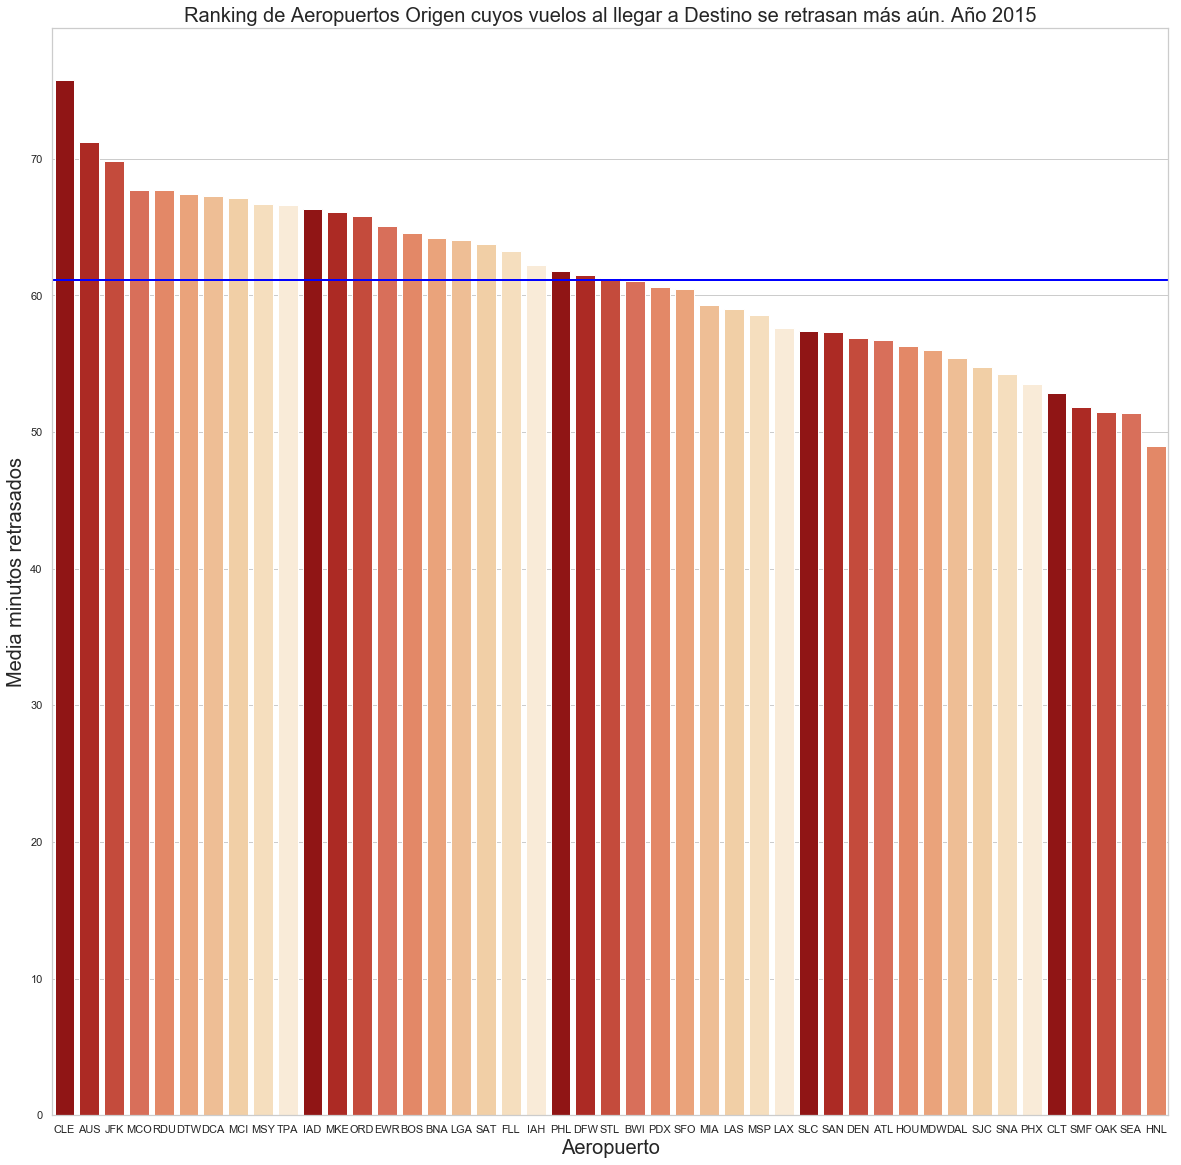

In [119]:
#Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino se retrasan más aún

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", 10) #len(retrasosPosterioresSalidaPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAeropuertoOrigen.index, y=retrasosPosterioresSalidaPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino se retrasan más aún. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

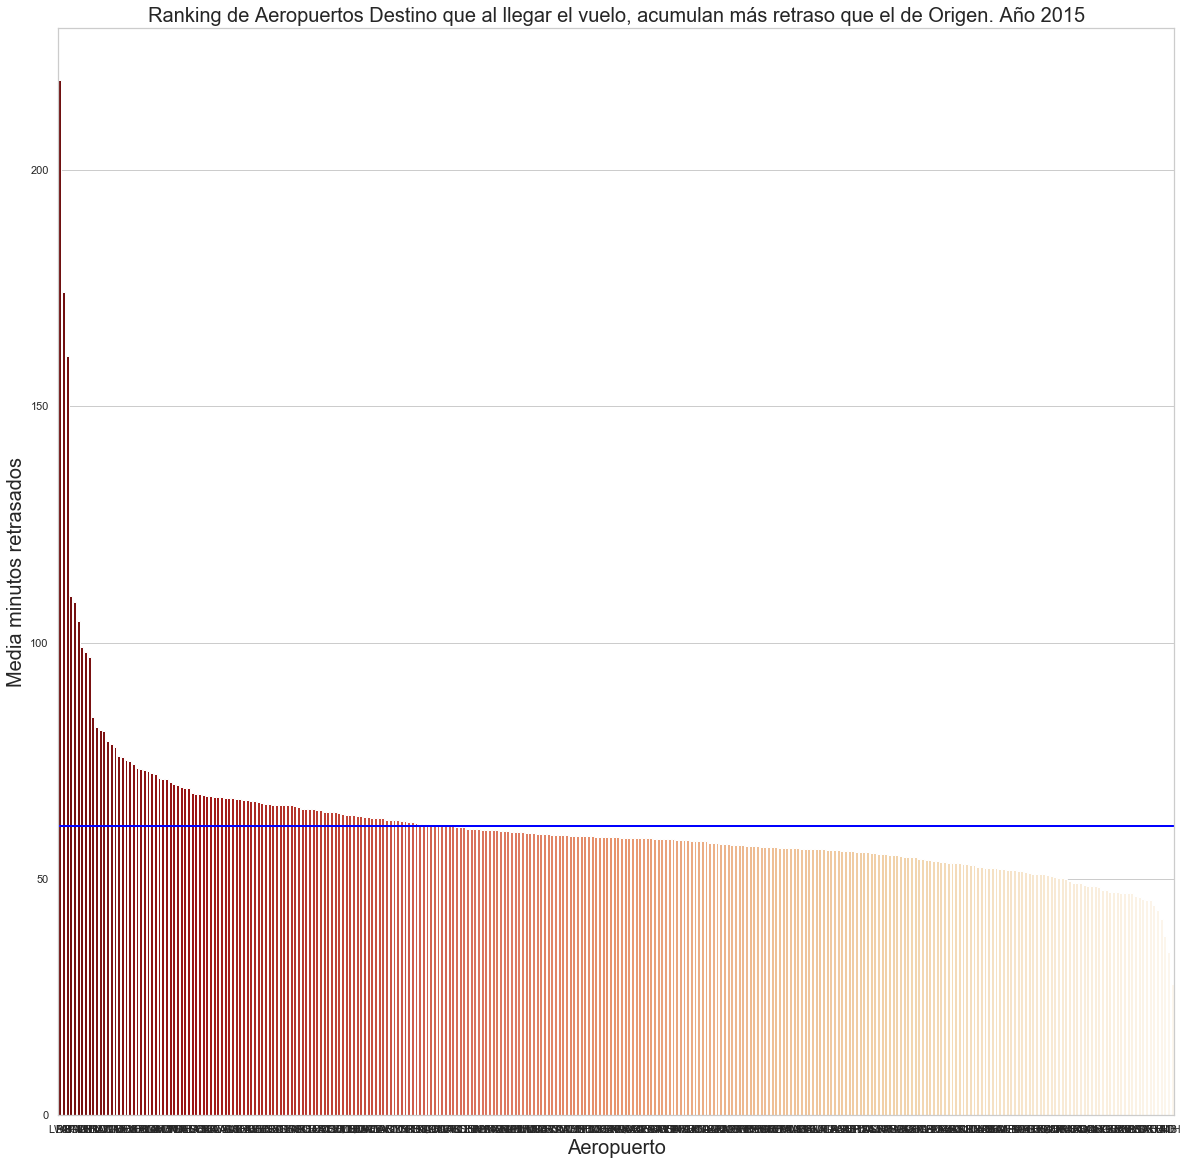

In [120]:
#Ranking de Aeropuertos Destino que al llegar el vuelo, acumulan más retraso que el de Origen.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorAeropuertoDestino))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAeropuertoDestino.index, y=retrasosPosterioresSalidaPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que al llegar el vuelo, acumulan más retraso que el de Origen. Año ' + year, fontsize=20)


plt.axhline(retrasosPosterioresSalidaPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

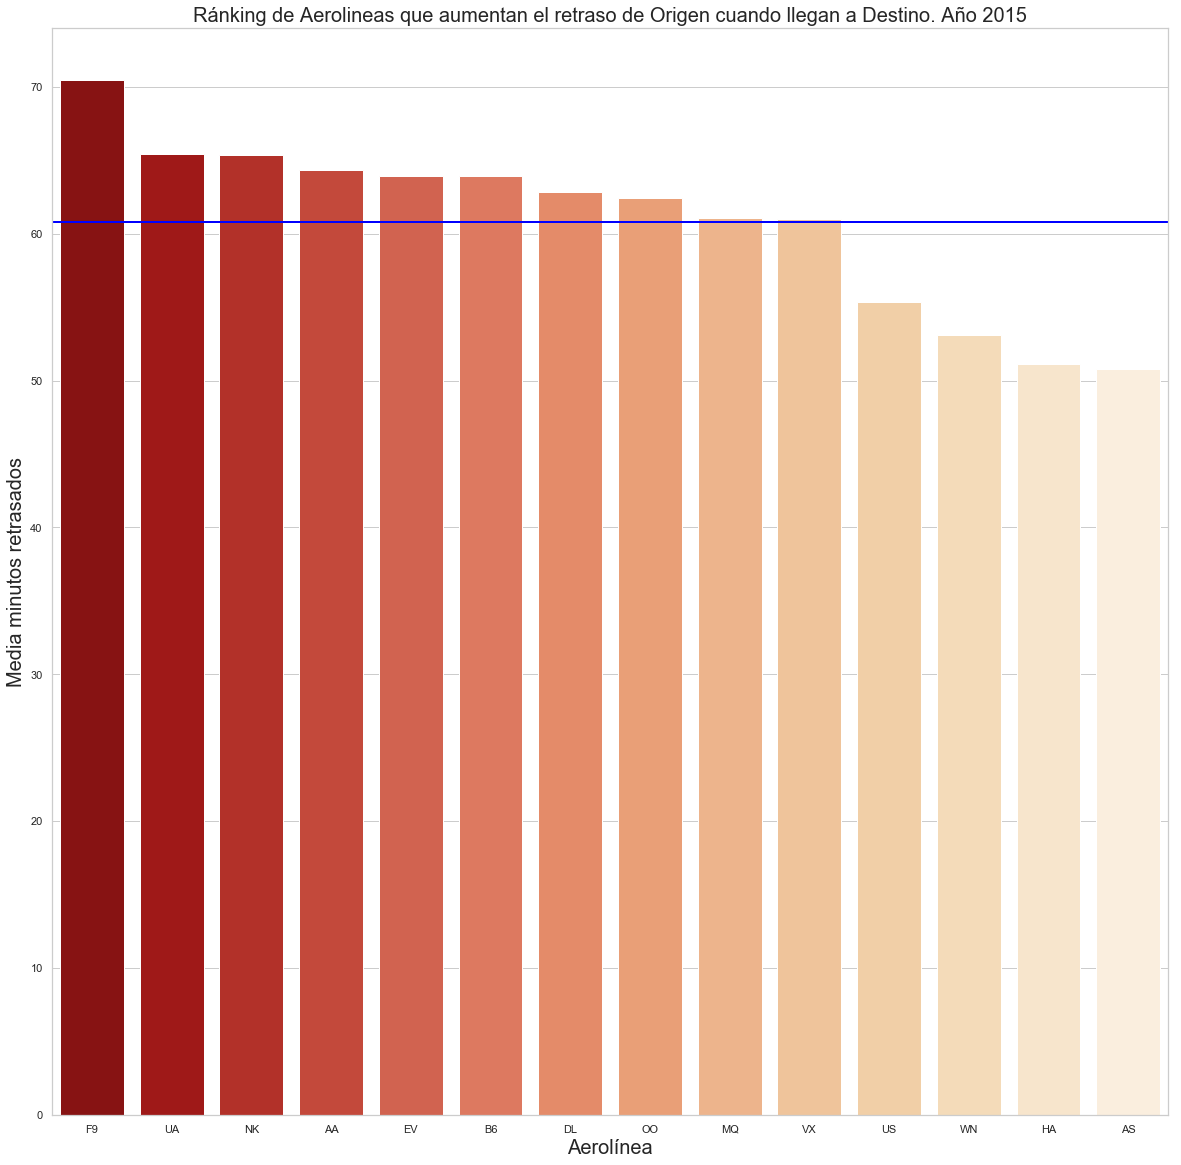

In [121]:
#Ránking de Aerolineas que aumentan el retraso de Origen cuando llegan a Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorAerolinea))
ax = sns.barplot(x=retrasosPosterioresSalidaPorAerolinea.index, y=retrasosPosterioresSalidaPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que aumentan el retraso de Origen cuando llegan a Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

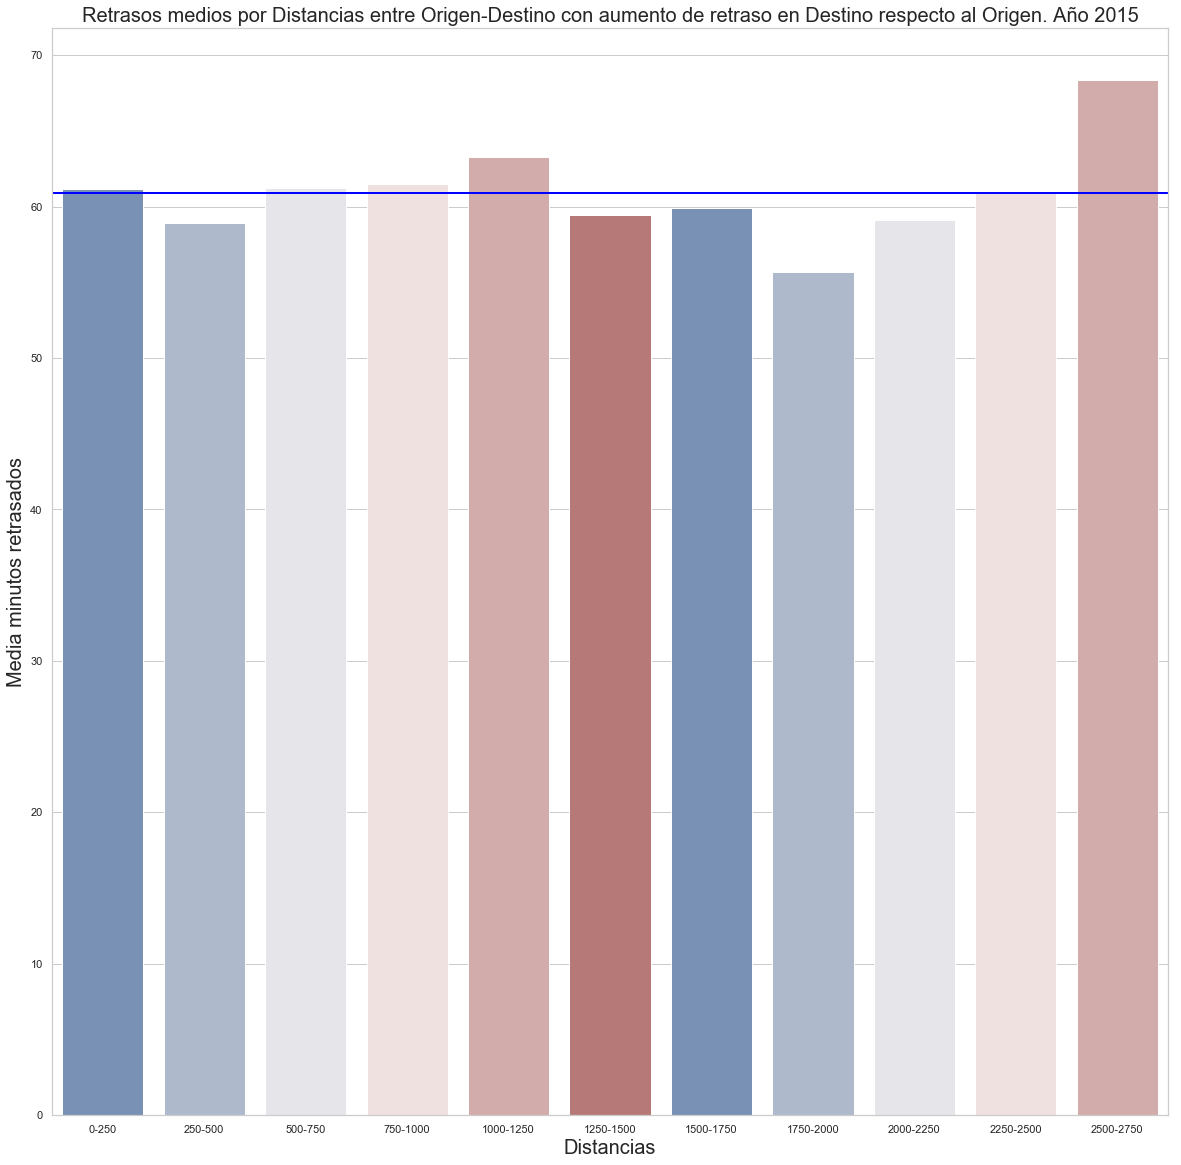

In [122]:
#Retrasos medios por Distancias entre Origen-Destino y que aumenta el retraso en Destino respecto al Origen

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosPosterioresSalidaPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino con aumento de retraso en Destino respecto al Origen. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.5 Visualización de Recuperación del tiempo de retraso, de Origen, en Destino.

In [123]:
#cálculo de los que el retraso de origen se recupera al llegar al Destino
#Visto por origen, destino, aerolínea y por distancia del vuelo

retrasosRecuperadosPorAeropuertoOrigen = pd.DataFrame(retrasosRecuperados.groupby('Origin').aggregate({'Origin': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAeropuertoOrigen = retrasosRecuperadosPorAeropuertoOrigen.rename(columns={'Origin': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorAeropuertoDestino = pd.DataFrame(retrasosRecuperados.groupby('Dest').aggregate({'Dest': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAeropuertoDestino = retrasosRecuperadosPorAeropuertoDestino.rename(columns={'Dest': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorAerolinea = pd.DataFrame(retrasosRecuperados.groupby('IATA_CODE_Reporting_Airline').aggregate({'IATA_CODE_Reporting_Airline': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorAerolinea = retrasosRecuperadosPorAerolinea.rename(columns={'IATA_CODE_Reporting_Airline': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})

retrasosRecuperadosPorDistanciaADestino = pd.DataFrame(retrasosRecuperados.groupby('DistanceGroup').aggregate({'DistanceGroup': 'count', 'DepDelay':'mean'}))

retrasosRecuperadosPorDistanciaADestino = retrasosRecuperadosPorDistanciaADestino.rename(columns={'DistanceGroup': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [124]:
#ordenamos por de mayor a menor retraso
retrasosRecuperadosPorAeropuertoOrigen = retrasosRecuperadosPorAeropuertoOrigen.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosRecuperadosPorAeropuertoDestino = retrasosRecuperadosPorAeropuertoDestino.sort_values(['MediaRetrasoTotal'], ascending=False)

retrasosRecuperadosPorAerolinea = retrasosRecuperadosPorAerolinea.sort_values(['MediaRetrasoTotal'], ascending=False)


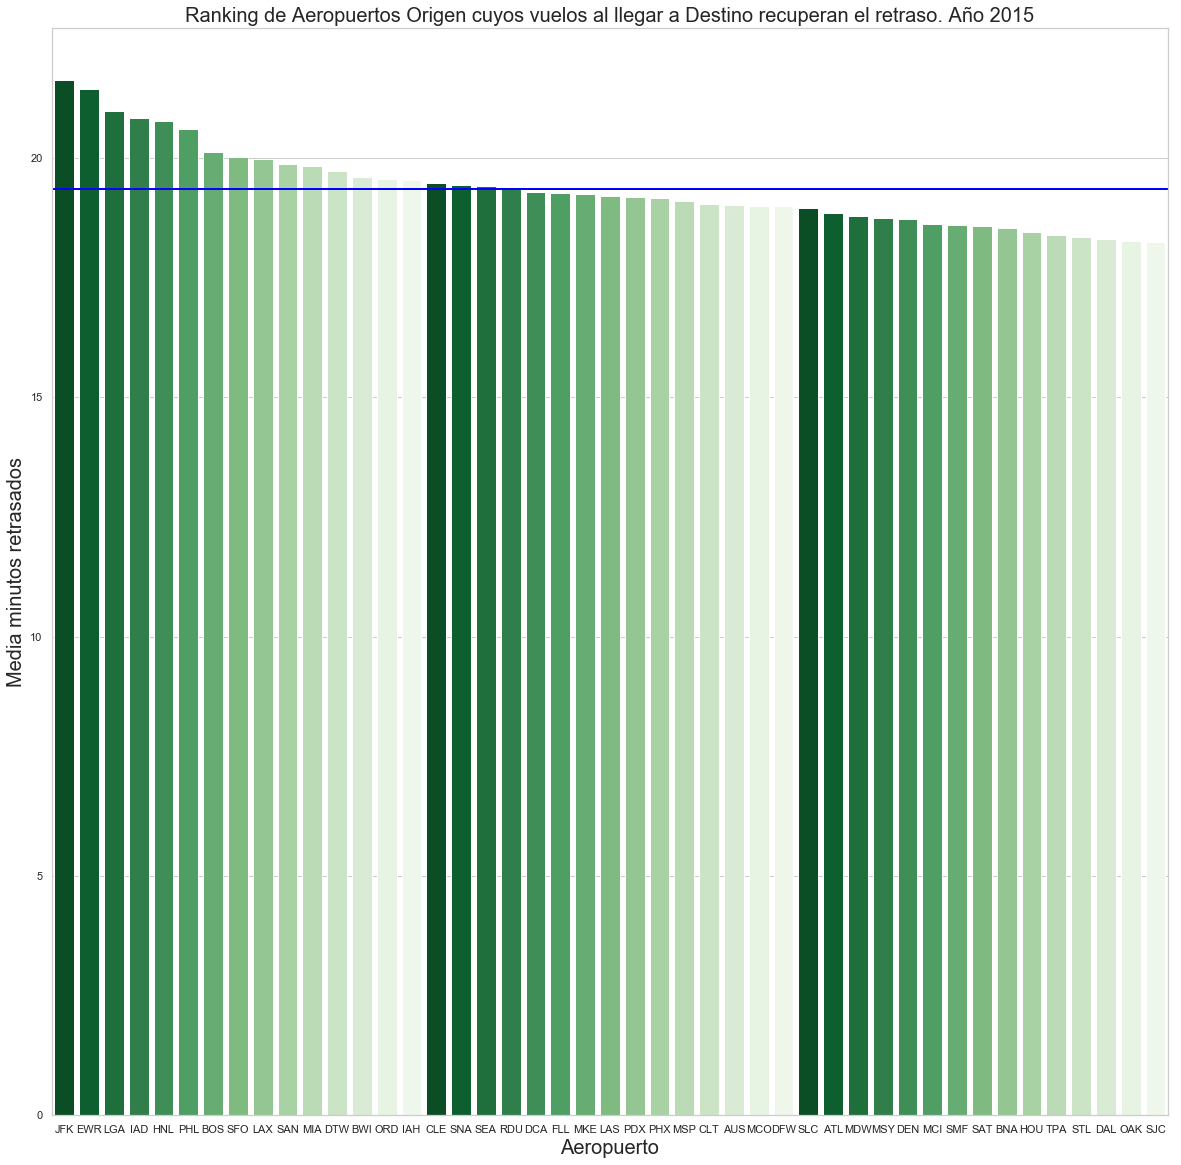

In [125]:
#Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino recuperan el retraso

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", 15) #len(retrasosRecuperadosPorAeropuertoOrigen))
ax = sns.barplot(x=retrasosRecuperadosPorAeropuertoOrigen.index, y=retrasosRecuperadosPorAeropuertoOrigen['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Origen cuyos vuelos al llegar a Destino recuperan el retraso. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorAeropuertoOrigen['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

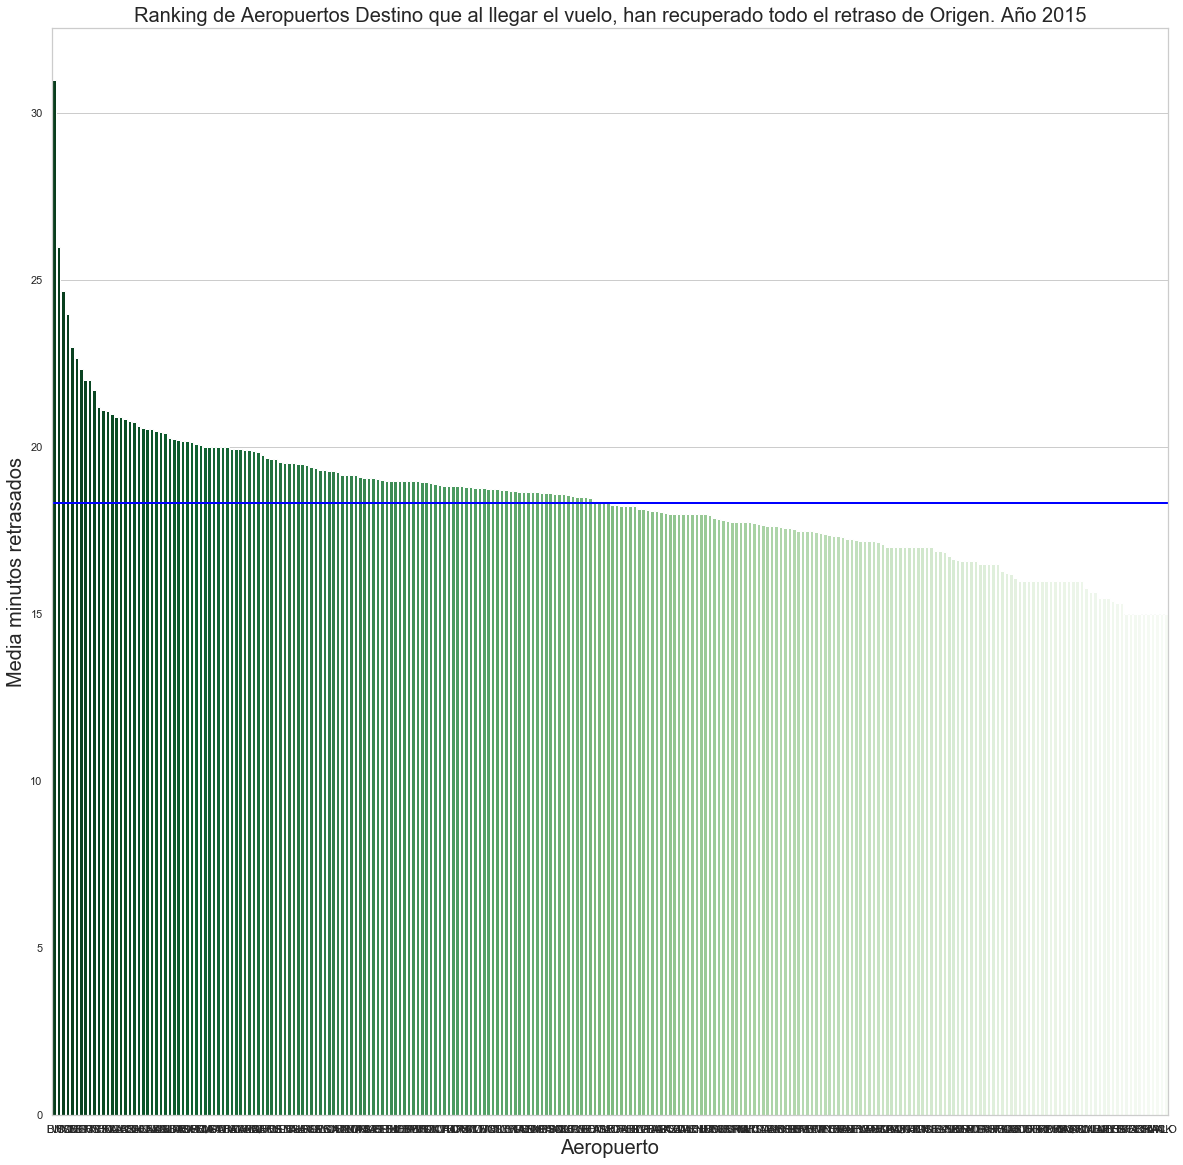

In [126]:
#Ranking de Aeropuertos Destino que al llegar el vuelo, han recuperado todo el retraso de Origen.

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperadosPorAeropuertoDestino))
ax = sns.barplot(x=retrasosRecuperadosPorAeropuertoDestino.index, y=retrasosRecuperadosPorAeropuertoDestino['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Aeropuertos Destino que al llegar el vuelo, han recuperado todo el retraso de Origen. Año ' + year, fontsize=20)


plt.axhline(retrasosRecuperadosPorAeropuertoDestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

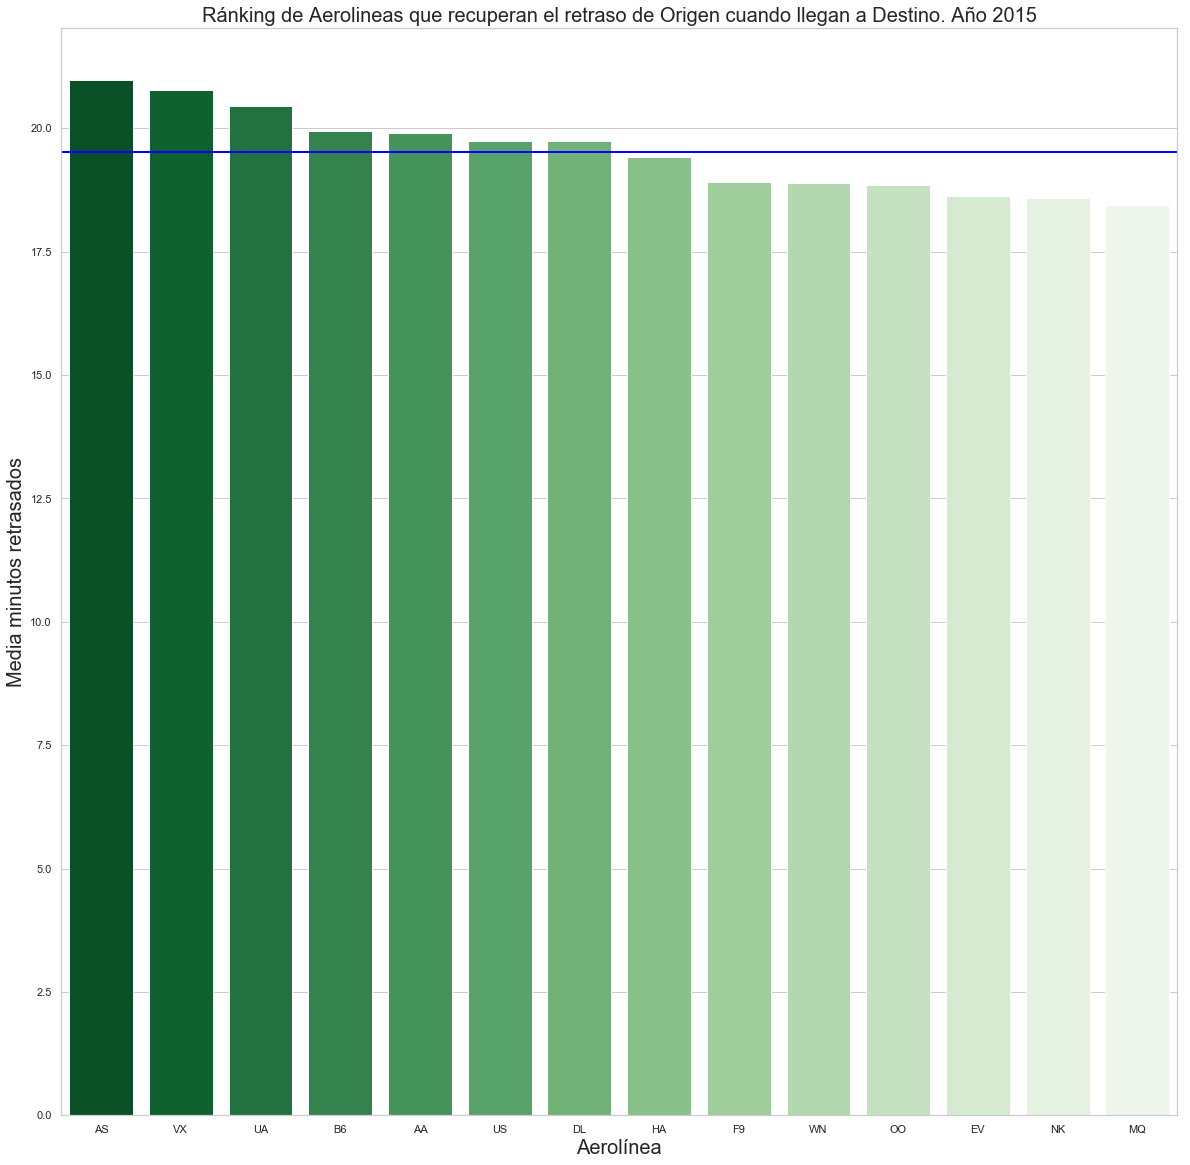

In [127]:
#Ránking de Aerolineas que recuperan el retraso de Origen cuando llegan a Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperadosPorAerolinea))
ax = sns.barplot(x=retrasosRecuperadosPorAerolinea.index, y=retrasosRecuperadosPorAerolinea['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Aerolínea", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ránking de Aerolineas que recuperan el retraso de Origen cuando llegan a Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorAerolinea['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

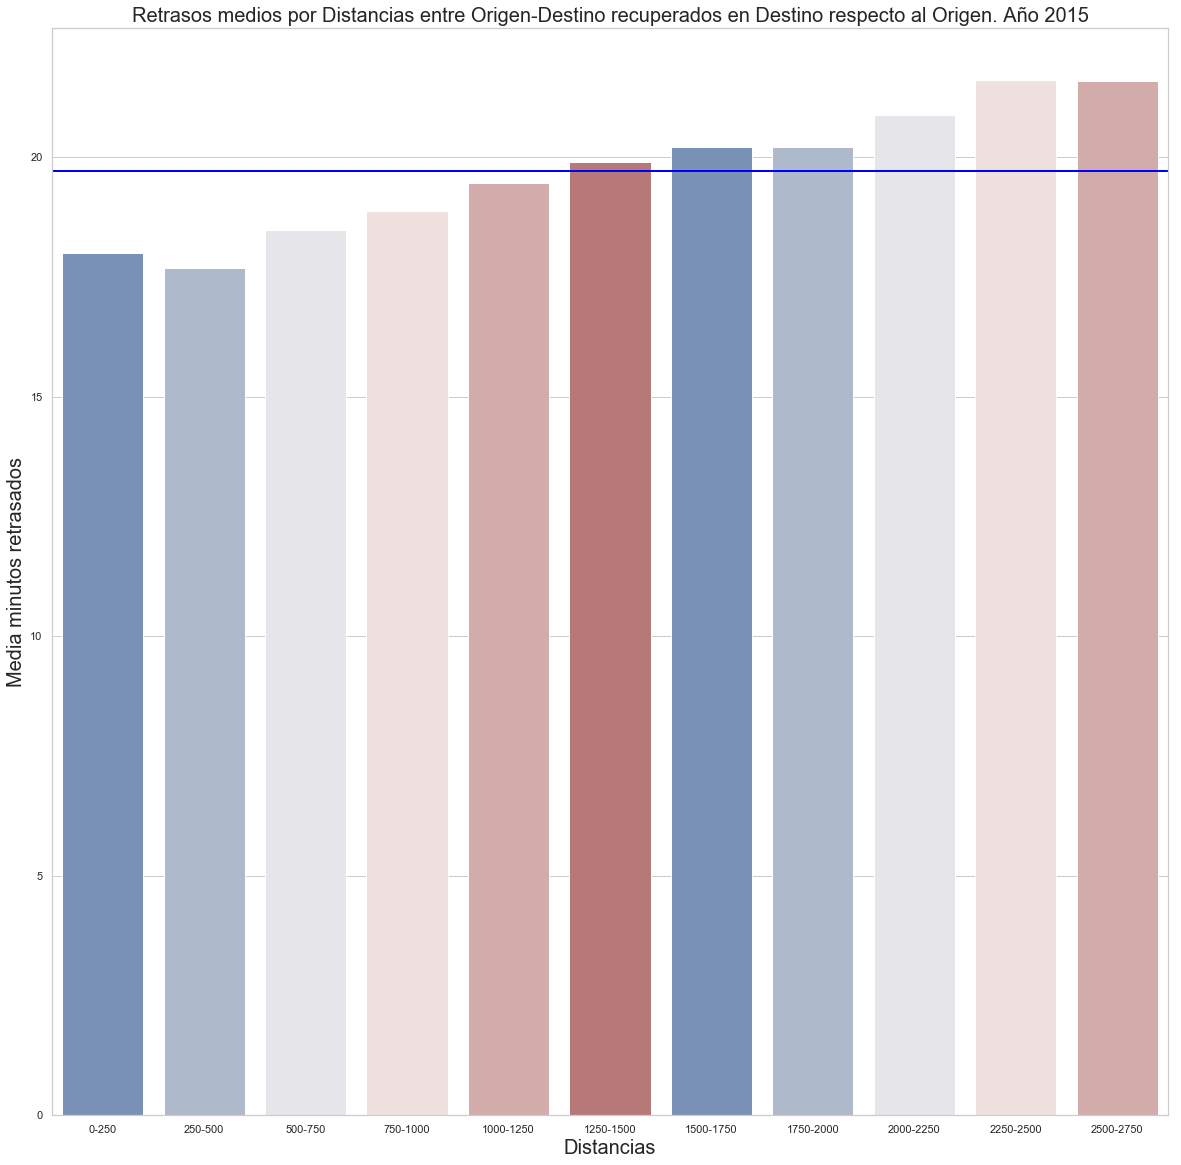

In [128]:
#Retrasos medios por Distancias entre Origen-Destino recuperados en Destino respecto al Origen

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosRecuperadosPorDistanciaADestino['MediaRetrasoTotal'], palette=pal)


ax.set_xlabel("Distancias", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Retrasos medios por Distancias entre Origen-Destino recuperados en Destino respecto al Origen. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperadosPorDistanciaADestino['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.3.6 Conclusiones: 

Vuelos que recuperan el tiempo de retraso que acumulaban en Origen
1. Para que en Destino se recupere el tiempo de retraso de Origen, la media de minutos en Origen debe estar entre 17,5 y 21 minutos.
2. Para la recupearción del retraso, cuanto mayor sea la distancia a Destino más tiempo se recupera, es bastante lineal.
3. Los aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, recuperan el retraso son principalmente de la Costa Este y el Medio Este.
4. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste. 

Vuelos que se retrasan más, al llegar a Destino, respecto al retraso de Origen
1. Más de 50 minutos de retraso en Origen, supone con gran probabilidad que en Destino se aumente aún más el retraso.
2. En el caso de aumento de retraso, no parece influir demasiado la distancia sobre el aumento del mismo, sólo destaca un poco en el caso de los vuelos de entre 2.500 y 2.750 millas.
3. Los aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, aumentan el retraso son principalmente de la Costa Este y el Medio Este.
4. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste.


Vuelos que consiguen Mantener el retraso en Destino
1. Aquellos vuelos que salen entre 40 y 65 minutos tarde en Origen, pueden conseguir no retrasarse más a la llegada a Destino. 
2. 9 de los 10 aeropuertos de Origen con mayor media de tiempo de retraso y que en destino, el vuelo, mantener el retraso, sin aumentarlo, son de la costa Este y Medio Este.
3. Por la cola, los 10 aeropuertos con menor media de retraso en Origen, son de la costa Oeste y Medio Oeste.
4. La distancia tampoco parece clave en el mantenimiento del retraso de Origen a la llegada, en el caso de los vuelos más largos (2.500 y 2.750 millas) sí parece ayudar conseguir mantenerse en el caso de los retrasos más altos.

Aerolíneas

1. Express Airlines parece que es la que destaca con los retrasos en las 3 situaciones.
2. Otra de las destacadas que suele estar entre las primeras es United Airlines y JetBlue
3. Por el contrario, parece que Southwest y Frontier son las aerolíneas con menor retraso en los aeropuertos principales.
4. Compañías relevantes como American Airlnes y Delta, están en los 3 casos en la media de retrasos, siendo Delta mejor.


Parece que es relevante en la media de minutos retrasados que la zona geográfica sea la de la Costa Este y el Medio Este de Estados Unidos, y viceversa. 
Sin embargo una cosa son los minutos retrasados, y otra el número de vuelos retrasados, en la que la ubicación geográfica no es tan evidente, sino que parece que es la densidad del tráfico nacional.
Parece que con hasta un máximo de 30 minutos de retraso, se puede recuperar el tiempo en Destino.





### 1.3.4 Visualización de retrasos medios en Origen por Rutas

In [129]:
retrasosSalidaIgualLlegada.shape

(635089, 112)

In [130]:
retrasosSalidaIgualLlegadaPorRuta = pd.DataFrame(retrasosSalidaIgualLlegada.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosSalidaIgualLlegadaPorRuta = retrasosSalidaIgualLlegadaPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})



In [131]:
#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosSalidaIgualLlegadaPorRuta = retrasosSalidaIgualLlegadaPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)


In [132]:
retrasosSalidaIgualLlegadaPorRuta.head(15)

VuelosTotales  MediaRetrasoTotal
Route                                    
SEA-JAC              1         341.000000
RDU-IND              1         209.000000
SAN-LIH              2         199.500000
FLL-MHT              1         181.000000
DCA-ACK              4         172.750000
BOS-MYR             10         170.400000
JFK-EGE             25         166.520000
HNL-DFW             71         155.478873
RDU-CVG              2         145.500000
LGA-PWM             10         139.500000
JFK-HNL             13         138.692308
HNL-JFK             20         133.950000
ATL-MSO              4         131.500000
STL-TTN              1         128.000000
DEN-MDT              1         124.000000

In [133]:
#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosSalidaRutaConPesos = retrasosSalidaIgualLlegadaPorRuta

retrasosSalidaRutaConPesos['Peso'] = retrasosSalidaRutaConPesos['VuelosTotales'] * retrasosSalidaRutaConPesos['MediaRetrasoTotal']

retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosSalidaRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal      Peso
Route                                              
LAX-SFO           2264          56.144876  127112.0
SFO-LAX           1940          59.612371  115648.0
LAX-JFK           1800          61.527222  110749.0
ORD-SFO           1892          57.268499  108352.0
ORD-LGA           1738          60.352704  104893.0
LGA-ATL           1481          70.506415  104420.0
ORD-DFW           1581          66.025933  104387.0
ORD-LAX           1739          57.656699  100265.0
LAS-SFO           1649          59.602183   98284.0
LGA-ORD           1325          73.275472   97090.0
SFO-JFK           1319          73.036391   96335.0
ORD-DEN           1250          67.841600   84802.0
ORD-BOS           1378          61.274311   84436.0
ORD-MSP           1345          62.761338   84414.0
SFO-LAS           1506          56.015936   84360.0

Ya parece que salen las más relevantes, vamos a quedarnos con las 20 primeras

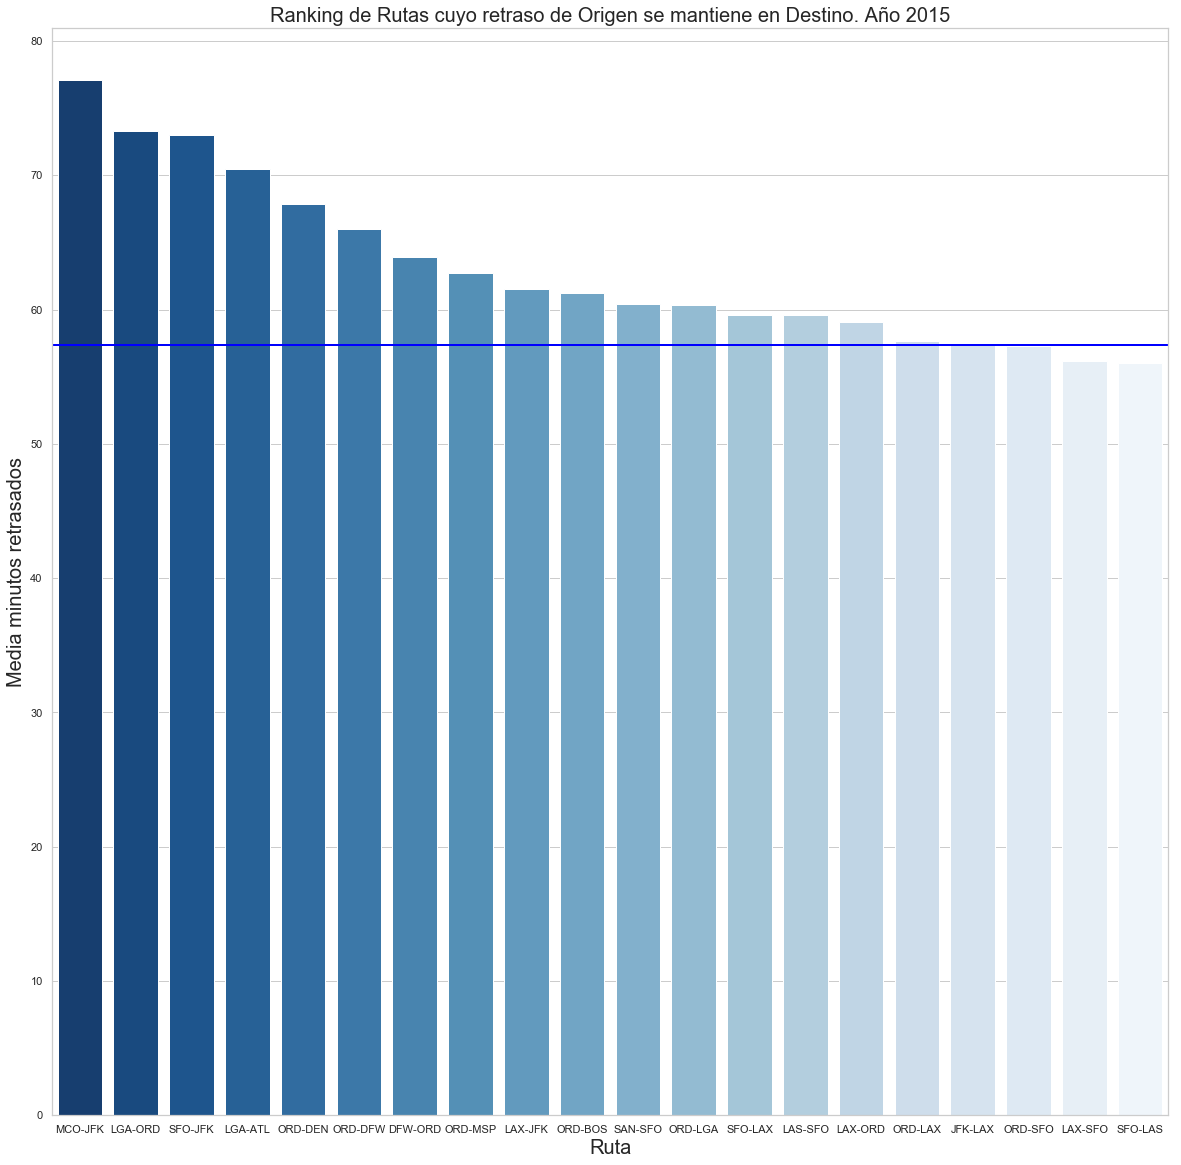

In [134]:
retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.head(20)

retrasosSalidaRutaConPesos = retrasosSalidaRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen se mantiene en Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Blues_r", len(retrasosSalidaRutaConPesos))
ax = sns.barplot(x=retrasosSalidaRutaConPesos.index, y=retrasosSalidaRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen se mantiene en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosSalidaIgualLlegadaPorRuta['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

La mayoría son rutas que salen de Atlanta (ATL) y de Newark (EWR) o de Chicago (ORD), son de la Costa Este, también de la costa Oeste son relavantes SFO (San Francisco) y LAX (Los Ángeles), pero predominan rutas que salen y llegan en la Costa Este.

Miremos ahora los otros dos casos, con mayor retraso en Destino, y con Recuperación del tiempo

In [135]:
retrasosPosterioresSalidaPorRuta = pd.DataFrame(retrasosPosterioresSalida.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosPosterioresSalidaPorRuta = retrasosPosterioresSalidaPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


In [136]:
#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosPosterioresSalidaPorRuta = retrasosPosterioresSalidaPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)

#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRuta

retrasosPosterioresSalidaPorRutaConPesos['Peso'] = retrasosPosterioresSalidaPorRutaConPesos['VuelosTotales'] * retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal']

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosPosterioresSalidaPorRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal     Peso
Route                                             
LAX-SFO           1277          61.935004  79091.0
SFO-LAX           1361          57.706098  78538.0
LAS-LAX           1085          55.579724  60304.0
ORD-LGA            815          70.078528  57114.0
LAS-SFO            619          72.219709  44704.0
LGA-ORD            620          71.841935  44542.0
LAX-LAS            769          56.924577  43775.0
MCO-JFK            502          84.326693  42332.0
BOS-LGA            588          71.462585  42020.0
ORD-DFW            571          72.530648  41415.0
ORD-DEN            570          72.119298  41108.0
LAX-JFK            583          70.343053  41010.0
ATL-LGA            607          67.471170  40955.0
MSP-ORD            557          70.910233  39497.0
OAK-LAX            725          51.586207  37400.0

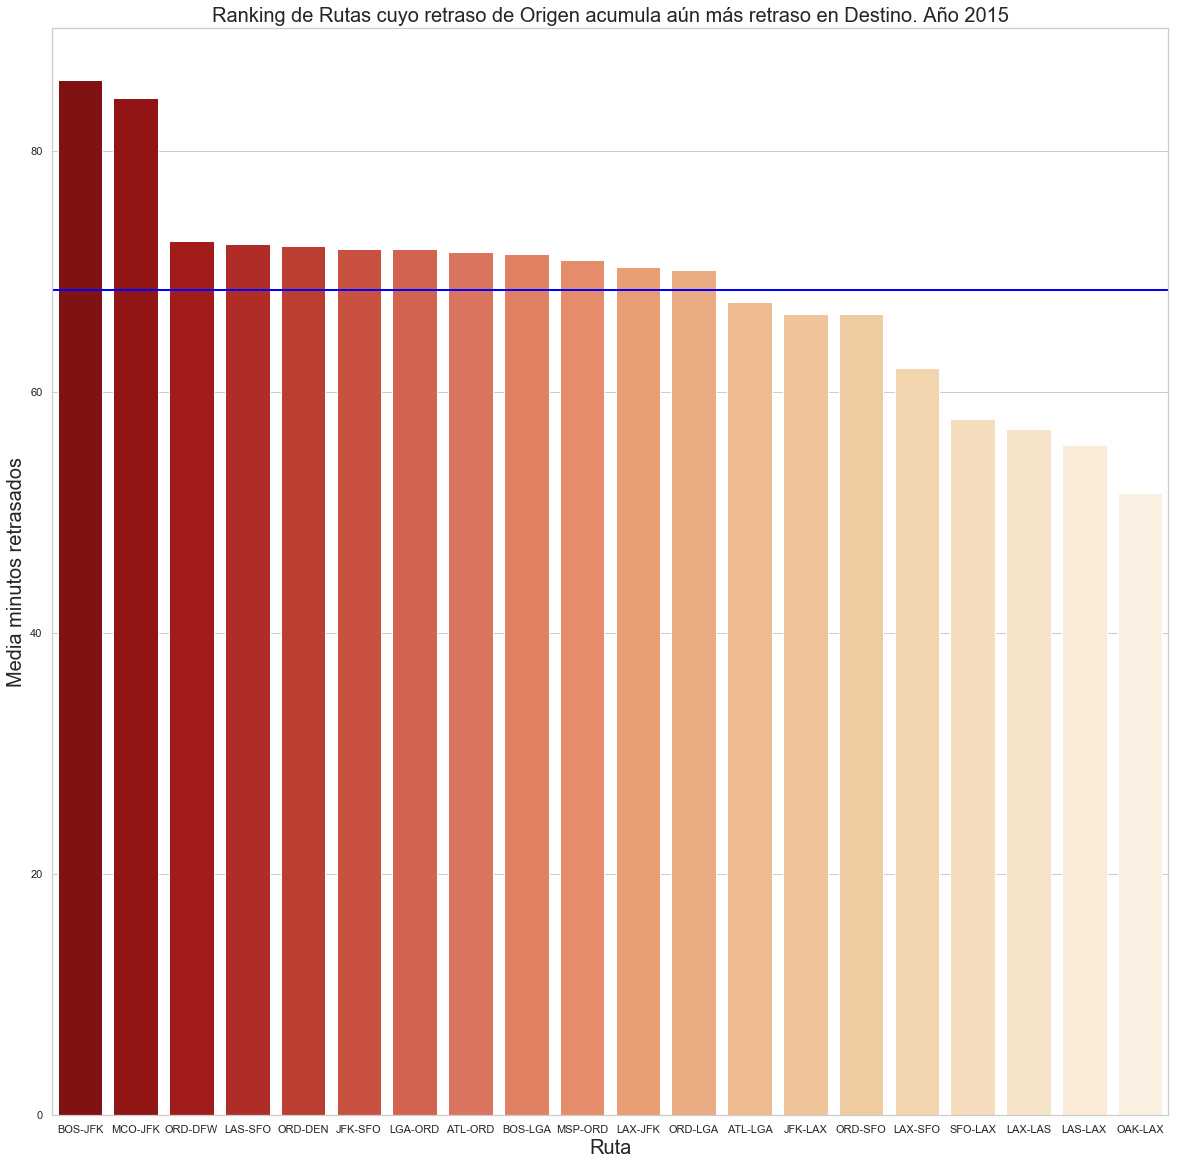

In [137]:
retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.head(20)

retrasosPosterioresSalidaPorRutaConPesos = retrasosPosterioresSalidaPorRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen aumenta Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("OrRd_r", len(retrasosPosterioresSalidaPorRutaConPesos))
ax = sns.barplot(x=retrasosPosterioresSalidaPorRutaConPesos.index, y=retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen acumula aún más retraso en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosPosterioresSalidaPorRutaConPesos['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

En este caso aumenta claramente la prevalencia de aeropuertos de la parte Este de Estados Unidos, es más, los vuelos parecen que casi todos son entre aeropuertos de esta parte de USA, especialemente a Atlanta, el de mayor tráfico de USA, por lo que se apuntan dos cosas vistas en los gráficos anteriores, con menor distancia no da tiempo a recuperar el retraso y que la mayoría de los aeropuertos con esta circunstancia son de la parte Este de USA, con una media de retraso por encima de los 60 minutos.

Veamos, por último, los vuelos que recuperan el tiempo.

In [138]:
retrasosRecuperanPorRuta = pd.DataFrame(retrasosRecuperados.groupby('Route').aggregate({'Route': 'count', 'DepDelay':'mean'}))

retrasosRecuperanPorRuta = retrasosRecuperanPorRuta.rename(columns={'Route': 'VuelosTotales', 'DepDelay': 'MediaRetrasoTotal'})


#ordenamos de mayor a menor retraso para coger las 20 primeras
retrasosRecuperanPorRuta = retrasosRecuperanPorRuta.sort_values(['MediaRetrasoTotal'], ascending=False)

#necesitamos darle importancia a la ruta por número de vuelos, ya que no nos vale que una ruta con 1 vuelo sea
#representativa de las rutas más retrasadas de media.

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRuta

retrasosRecuperanPorRutaConPesos['Peso'] = retrasosRecuperanPorRutaConPesos['VuelosTotales'] * retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal']

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.sort_values(['Peso'], ascending=False)

retrasosRecuperanPorRutaConPesos.head(15)

VuelosTotales  MediaRetrasoTotal    Peso
Route                                            
JFK-LAX            398          22.685930  9029.0
LAX-JFK            321          21.629283  6943.0
EWR-SFO            301          23.036545  6934.0
ORD-SFO            282          21.120567  5956.0
JFK-SFO            253          23.237154  5879.0
EWR-LAX            255          22.392157  5710.0
LGA-ATL            255          21.180392  5401.0
ORD-LAX            249          20.863454  5195.0
LAX-ORD            215          21.037209  4523.0
SFO-JFK            208          21.211538  4412.0
ATL-LAX            214          20.420561  4370.0
ORD-DFW            188          20.468085  3848.0
EWR-IAH            162          21.574074  3495.0
LAX-EWR            168          20.154762  3386.0
LGA-ORD            149          21.697987  3233.0

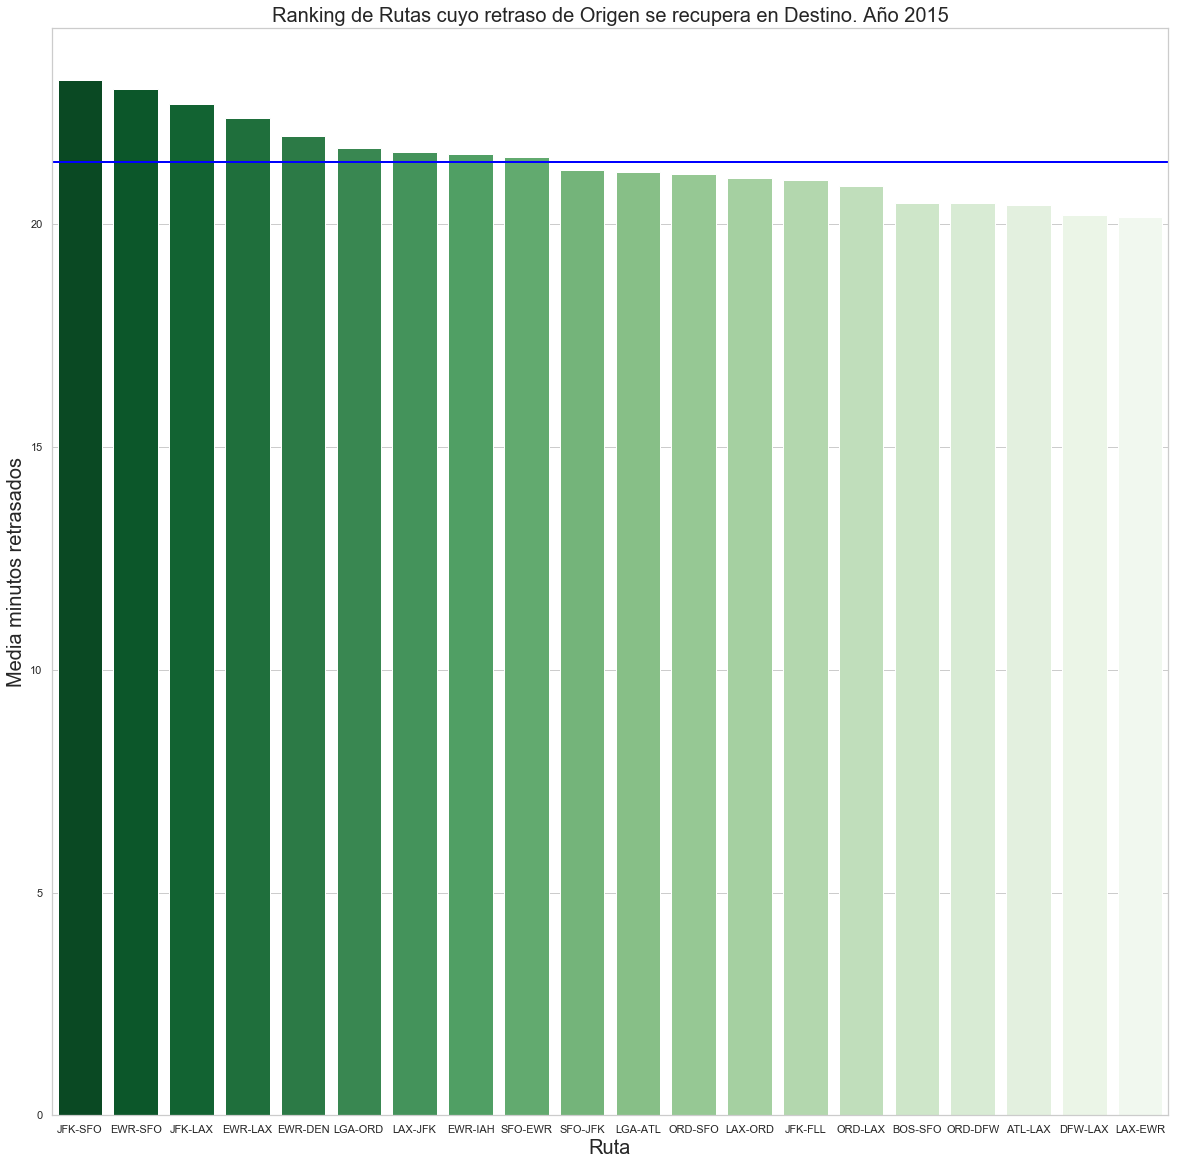

In [139]:
retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.head(20)

retrasosRecuperanPorRutaConPesos = retrasosRecuperanPorRutaConPesos.sort_values(['MediaRetrasoTotal'], ascending=False)

#Ranking de Rutas en cuyo retraso de Origen se recupera en Destino

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)

pal = sns.color_palette("Greens_r", len(retrasosRecuperanPorRutaConPesos))
ax = sns.barplot(x=retrasosRecuperanPorRutaConPesos.index, y=retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal'], palette=pal)
ax.set_xlabel("Ruta", fontsize=20)
ax.set_ylabel("Media minutos retrasados", fontsize=20)
ax.set_title('Ranking de Rutas cuyo retraso de Origen se recupera en Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosRecuperanPorRutaConPesos['MediaRetrasoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

Una vez más, prevalecen los aeropuertos de la Costa Este, pero en este caso, las distancias de la ruta son mayores, casi todos vuelan al Oeste. Y claramente, como se vio en los apartados anteriores por aeropuertos, el menor número de minutos de retrasos es recuperable, y más aún si la distancia es grande, como es el caso. La media de tiempo de retraso de estas rutas prácticamente coincide con la del caso de los aeropuertos.

### 1.3.4.1 Conclusiones:

Parece que mirando los retrasos en Origen por Rutas, se confirman los datos que se vieron en el apartado anterior por Aeropuertos.

Parece claramente que en un modelo de predicción, el peso de la Costa Este de USA, en cuanto a los retrasos, es mayor que en la Costa Oeste.

Deberíamos etiquetar a los aeropuertos por la zona geográfica en la que están y que los modelos se orienten a cada una de las zonas geográficas

## 1.3.5 Análisis de Retrasos en Destino

#### Ahora veamos cómo es el comportamiento de los retrasos en llegadas

#### Vuelos que se han retrasado al menos 15 minutos en la llegada 

In [140]:
#Vuelos que se han retrasado al menos 15 minutos en la llegada
len(dfanual[dfanual['ArrDel15'] == 1])

1063439

In [141]:
#retrasos por mes en llegadas

vuelosTotalesRetrasadosDestinoPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosTotalesRetrasadosDestinoPorMes = vuelosTotalesRetrasadosDestinoPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['ArrDel15'] == 1)])}, ignore_index=True)


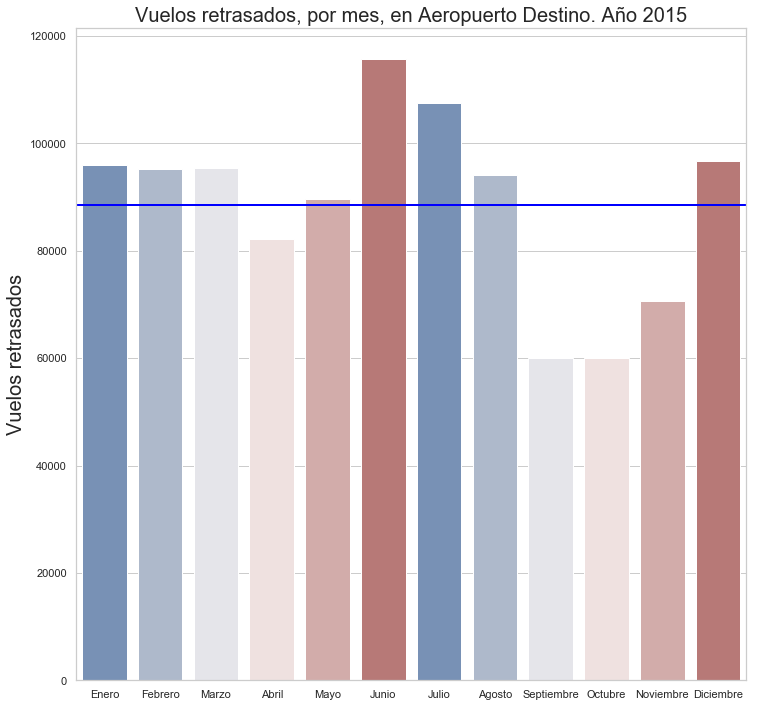

In [142]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosTotalesRetrasadosDestinoPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados, por mes, en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(vuelosTotalesRetrasadosDestinoPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

De las múltiples combinaciones de los retrasos, motivos, si en origen , si en destino, si en ambos, etc. Vamos a ver primero cuántos hay retrasados, ya vimos en el apartado correspondiente de retrasos en origen, cuántos mantenían su retraso en la llegada, se recuperaban o aumentaban más el retraso de origen. Vamos a ver, nuevos casos: 
1. Retrasos que sólo ocurren en Destino, es decir, en Origen no tenían retraso.
2. Volveremos a ver los retrasados en Destino, y que en origen también estaban retrasados.
3. Iremos viéndolos también, por aeropuertos más retrasados, con más vuelos, por zonas geográficas, tipos de retraso, aerolíneas, etc.

### 1.3.5.1 Vuelos retrasados sólo en Destino

In [143]:
#vuelos retrasados en Destino pero que salieron en hora en Origen
len(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

232701

In [144]:
vuelosRestrasadosSoloEnDestino = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosRestrasadosSoloEnDestino = vuelosRestrasadosSoloEnDestino.append({'mes': df["Month"][1], 'vuelos': len(df[(df['ArrDel15'] == 1) & (df['DepDel15'] == 0)])}, ignore_index=True)


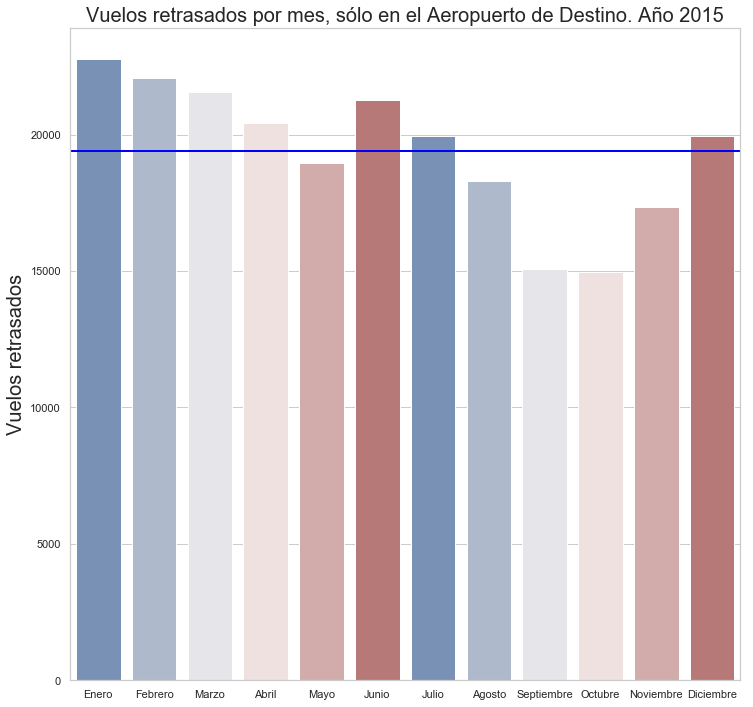

In [145]:
#Vuelos retrasados por mes sólo en destino, es decir, en origen salieron puntuales

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosRestrasadosSoloEnDestino['vuelos'], palette=pal)

ax.set_ylabel("Vuelos retrasados", fontsize=20)
ax.set_title('Vuelos retrasados por mes, sólo en el Aeropuerto de Destino. Año ' + year, fontsize=20)

plt.axhline(vuelosRestrasadosSoloEnDestino['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

In [146]:
retrasosSoloDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [147]:
retrasosSoloDestino = pd.DataFrame(retrasosSoloDestino['ArrDelay'])

retrasosSoloDestino.head(5)

ArrDelay
5        25.0
67       52.0
70       18.0
81       23.0
110      22.0

In [148]:
retrasosSoloDestino.describe().T

count       mean       std   min   25%   50%   75%    max
ArrDelay  232701.0  26.338065  14.58449  15.0  17.0  22.0  30.0  324.0

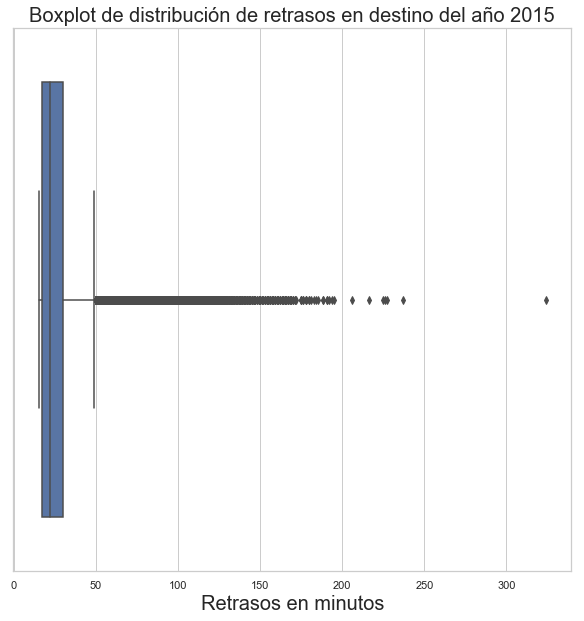

In [149]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasosSoloDestino["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino del año ' + year, fontsize=20)
plt.show()

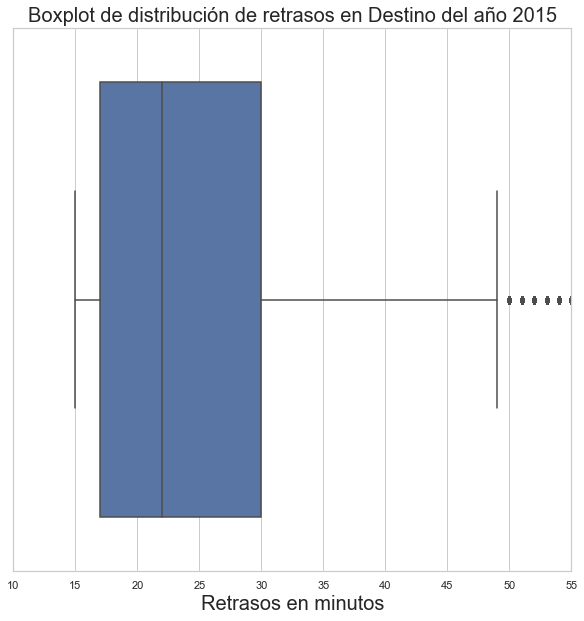

In [150]:
#vamos a reducir la escala para al menos ver la parte principal

sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(10,55)
ax = sns.boxplot(x=retrasosSoloDestino["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en Destino del año ' + year, fontsize=20)
plt.show()

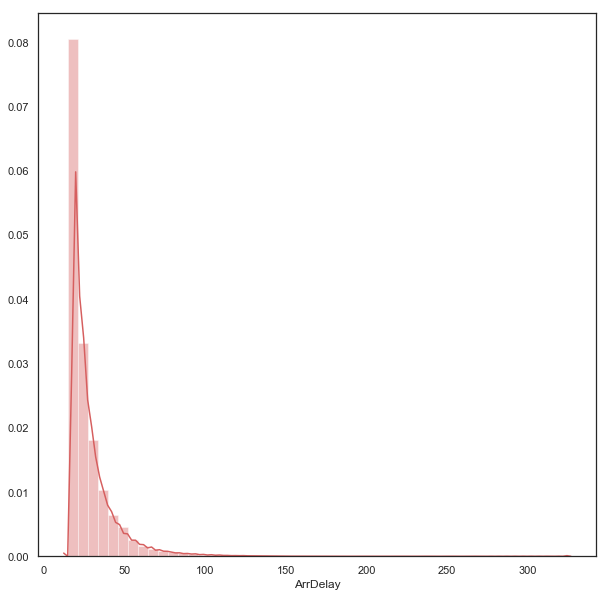

In [151]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")

plt.show()

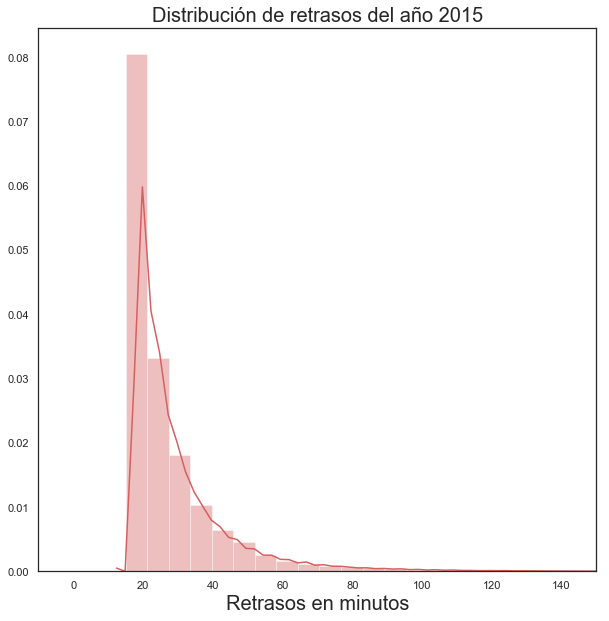

In [152]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")
plt.xlim(-10,150)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

Quizás deberíamos cortar sobre los 100 minutos de retraso

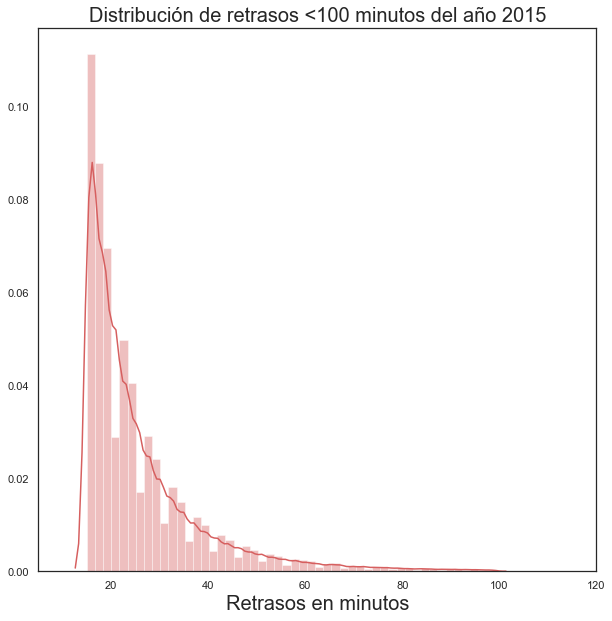

In [153]:
corte100Min = pd.DataFrame(retrasosSoloDestino[retrasosSoloDestino["ArrDelay"]<100])

# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(corte100Min["ArrDelay"], color="r")
plt.xlim(5,120)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos <100 minutos del año ' + year, fontsize=20)


plt.show()

In [154]:
retrasosDestinoPorDiaSemana = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

retrasosDestinoPorDiaSemana = pd.DataFrame(retrasosDestinoPorDiaSemana.groupby('DayOfWeek').aggregate({'DayOfWeek': 'count', 'ArrDelay':'mean'}))

In [155]:
retrasosDestinoPorDiaSemana

DayOfWeek   ArrDelay
DayOfWeek                      
1              33875  26.871321
2              32112  26.501028
3              34475  25.984336
4              39867  26.479093
5              37200  25.865914
6              24379  26.553058
7              30793  26.195109

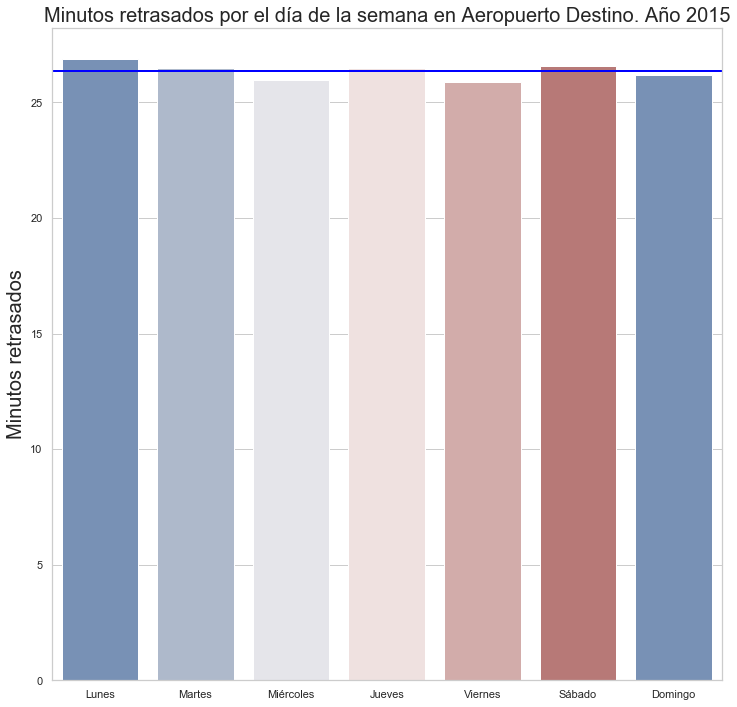

In [156]:

#Vuelos retrasados por el día de la semana

my_xticks=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorDiaSemana['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por el día de la semana en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaSemana['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [157]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [158]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(retrasosDestinoPorHoraDelDia.groupby('ArrTimeBlk').aggregate({'ArrTimeBlk': 'count', 'ArrDelay':'mean'}))

In [159]:
retrasosDestinoPorHoraDelDia

ArrTimeBlk   ArrDelay
ArrTimeBlk                       
0001-0559         4286  25.030565
0600-0659         2821  24.481035
0700-0759         6349  26.219405
0800-0859        11557  26.218223
0900-0959        13574  26.129512
1000-1059        14216  26.419105
1100-1159        13204  25.817328
1200-1259        12968  25.652529
1300-1359        12599  25.404556
1400-1459        13474  25.927861
1500-1559        11821  26.021572
1600-1659        16877  26.374830
1700-1759        14528  26.955534
1800-1859        17336  27.004442
1900-1959        16406  27.264781
2000-2059        15971  27.351136
2100-2159        15255  26.812389
2200-2259        11260  26.167496
2300-2359         8199  25.559093

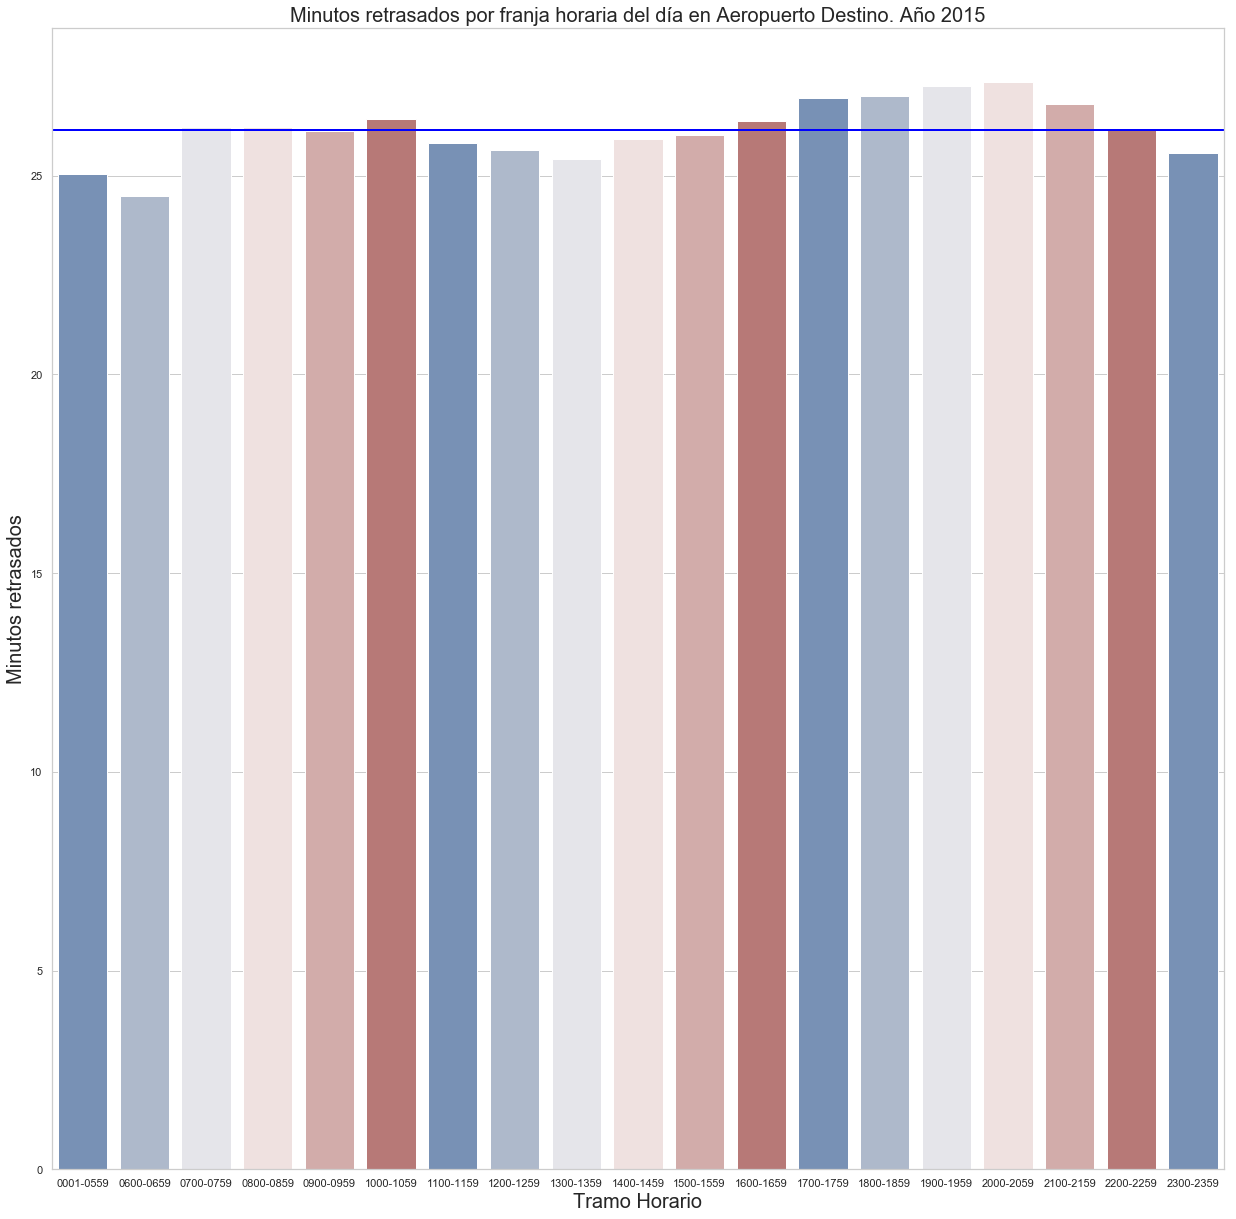

In [160]:

#Vuelos retrasados por franja horaria

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorHoraDelDia.index, y=retrasosDestinoPorHoraDelDia['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Tramo Horario", fontsize=20)
ax.set_title('Minutos retrasados por franja horaria del día en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorHoraDelDia['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [161]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [162]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(retrasosDestinoPorDiaDelMes.groupby('DayofMonth').aggregate({'DayofMonth': 'count', 'ArrDelay':'mean'}))

In [163]:
retrasosDestinoPorDiaDelMes

DayofMonth   ArrDelay
DayofMonth                       
1                 7507  26.541894
2                 9065  26.225703
3                 8364  26.970230
4                 7747  26.219182
5                 7772  26.476068
6                 6872  26.466240
7                 6726  25.329022
8                 7338  27.667212
9                 8087  26.640905
10                7791  27.408677
11                7585  25.595517
12                7723  24.719151
13                7510  25.379627
14                6817  26.405164
15                7570  25.954293
16                8369  25.674155
17                7761  26.962118
18                9288  27.995263
19                7119  25.047057
20                7852  26.995925
21                7168  26.601283
22                7480  25.500802
23                7776  26.606224
24                6484  26.603486
25                7663  26.279394
26                8642  26.914487
27                8157  27.111315
28                7197  25.680700
29                6552  25.102564
30                7194  26.295663
31                3525  26.167943

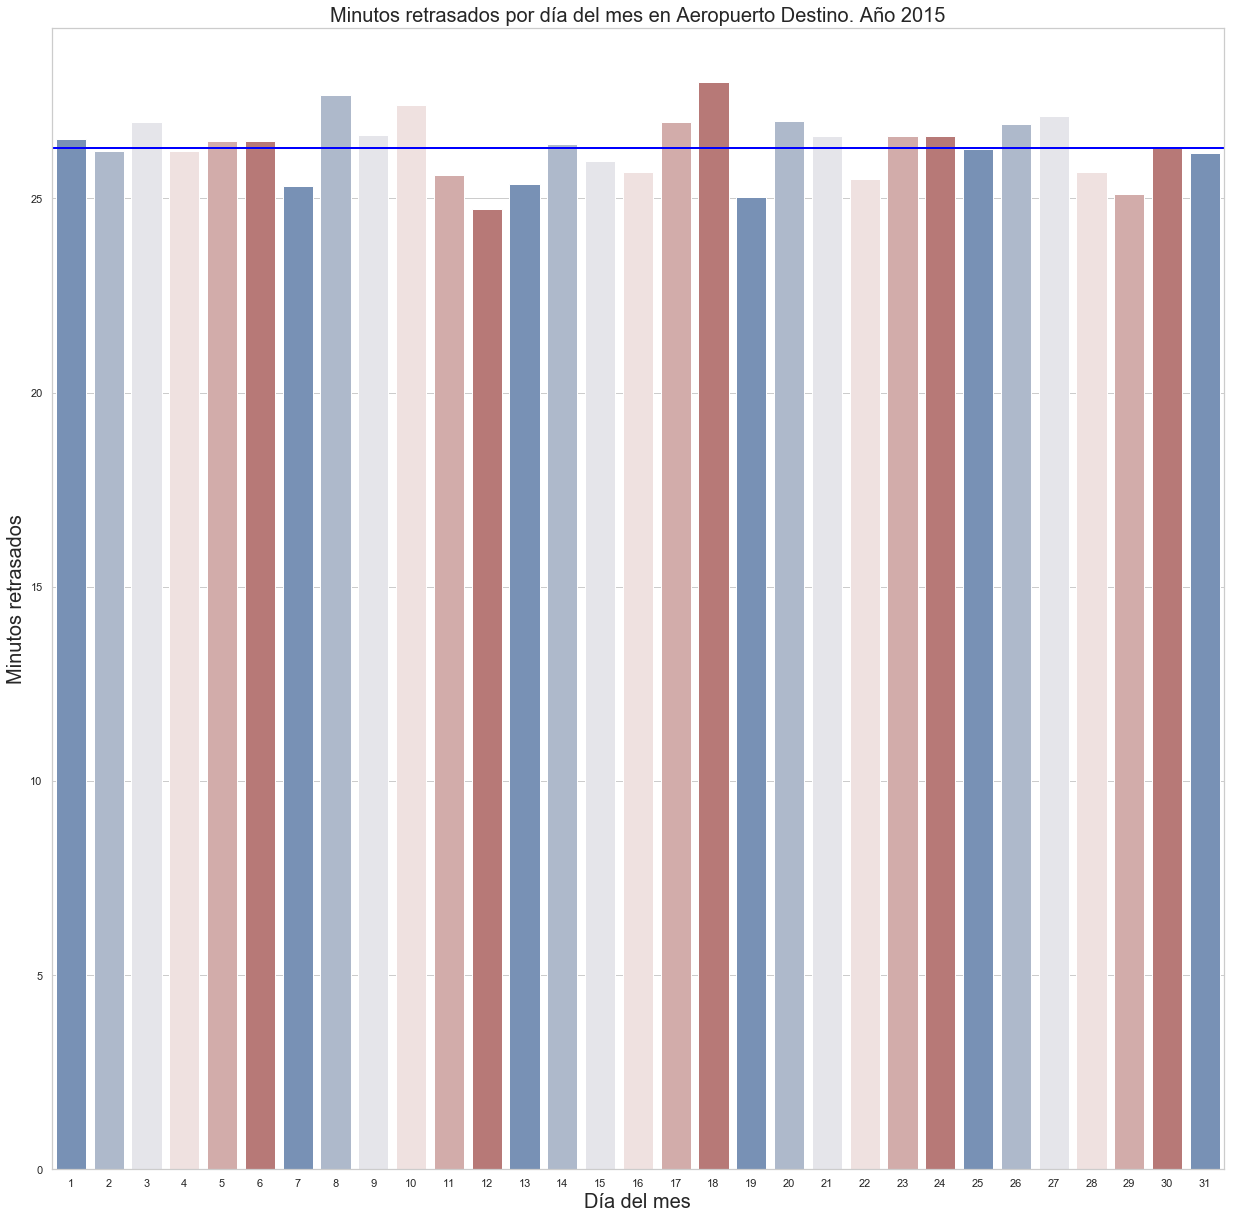

In [164]:

#Vuelos retrasados por dia del mes 

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorDiaDelMes.index, y=retrasosDestinoPorDiaDelMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Día del mes", fontsize=20)
ax.set_title('Minutos retrasados por día del mes en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show() 

In [165]:
retrasosDestinoPorTrimestre = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])

In [166]:
retrasosDestinoPorTrimestre = pd.DataFrame(retrasosDestinoPorTrimestre.groupby('Quarter').aggregate({'Quarter': 'count', 'ArrDelay':'mean'}))

In [167]:
retrasosDestinoPorTrimestre

Quarter   ArrDelay
Quarter                    
1          66435  26.380221
2          60663  26.817253
3          53329  26.812616
4          52274  25.244271

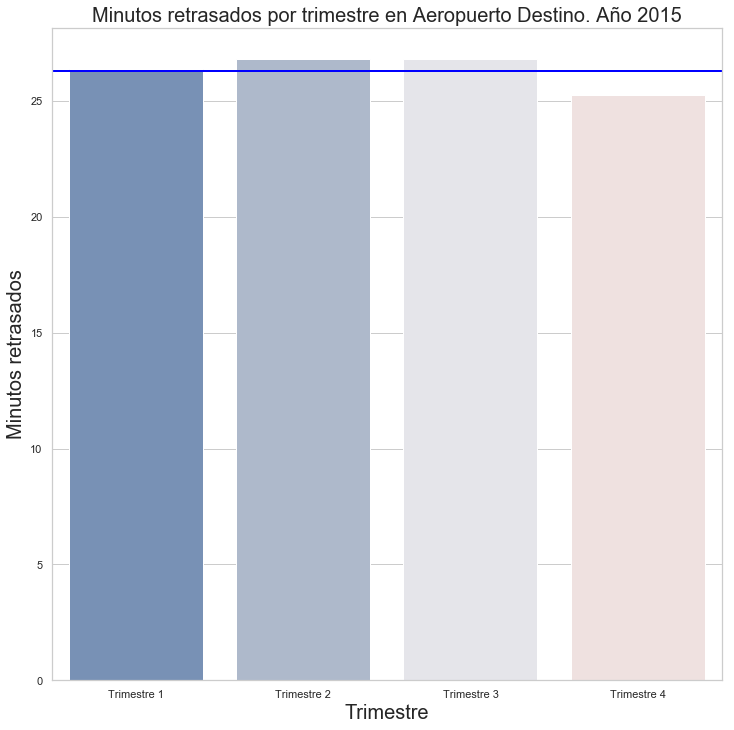

In [168]:
#Vuelos retrasados por trimestre 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.5.1.1 Ranking de aeropuertos en Retrasos sólo en Destino

In [169]:
dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)].Dest.value_counts(sort=True).head(15)

ORD    16659
ATL    13451
LAX    13205
DFW    11661
DEN     8679
IAH     8130
PHX     6299
LGA     6261
SFO     5839
CLT     5742
MSP     5696
SEA     5679
MCO     5434
BOS     4884
MIA     4785
Name: Dest, dtype: int64

In [170]:
#primero cogemos los 45 aeropuertos (de destino) con mayor número de retrasos
retrasosSoloDestinoEnAeropuertos = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)].Dest.value_counts(sort=True)).head(45)

In [171]:
#retrasos totales de esos 45 aeropuerto
retrasosSoloDestinoEnAeropuertos.sum()

Dest    190309
dtype: int64

In [172]:
#el 80% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80AeropuertosDestino = ((retrasosSoloDestinoEnAeropuertos.sum() / (len(dfanual[(dfanual['ArrDel15'] == 1) & (dfanual['DepDel15'] == 0)])))) *100

In [173]:
pct80AeropuertosDestino

Dest    81.782631
dtype: float64

In [174]:
print('45 aeropuertos concentran el %.2f' %pct80AeropuertosDestino + '% de los retrasos (solo en destino) del año ' + year)

45 aeropuertos concentran el 81.78% de los retrasos (solo en destino) del año 2015


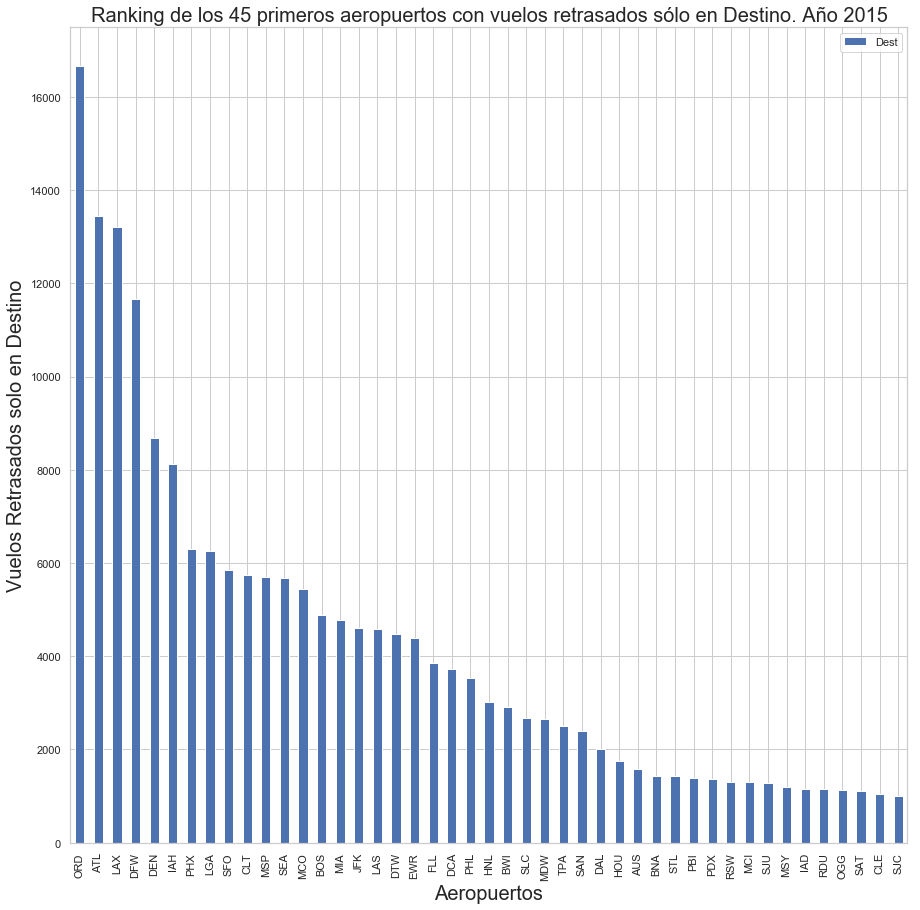

In [175]:
ax = retrasosSoloDestinoEnAeropuertos.plot(kind='bar', figsize=(15,15))

ax.set_ylabel("Vuelos Retrasados solo en Destino", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)

plt.show()

De estos, ATL (Atlanta), ORD (Chicago) y DEN(Denver) repiten 2 como los 3 primeros, al igual que en Origen, pero se añaden IAH(Houston) y DFW (Dallas) como significativos, entre los 5 concentran más del 35% de los retrasos.
Sigue siendo un factor clave, ser aeropuerto Hub, distribuidor de tráfico de interconexión con otros destinos, como elemento de demoras en la red.

In [176]:
retrasosSoloDestinoEnAeropuertos = retrasosSoloDestinoEnAeropuertos.reset_index()
retrasosSoloDestinoEnAeropuertos.columns = ['Destination','ArrDelay']

In [177]:
retrasosSoloDestinoEnAeropuertos.head(45)

Destination  ArrDelay
0          ORD     16659
1          ATL     13451
2          LAX     13205
3          DFW     11661
4          DEN      8679
5          IAH      8130
6          PHX      6299
7          LGA      6261
8          SFO      5839
9          CLT      5742
10         MSP      5696
11         SEA      5679
12         MCO      5434
13         BOS      4884
14         MIA      4785
15         JFK      4607
16         LAS      4580
17         DTW      4468
18         EWR      4389
19         FLL      3853
20         DCA      3715
21         PHL      3523
22         HNL      3024
23         BWI      2912
24         SLC      2680
25         MDW      2647
26         TPA      2506
27         SAN      2386
28         DAL      2011
29         HOU      1747
30         AUS      1583
31         BNA      1441
32         STL      1433
33         PBI      1393
34         PDX      1366
35         RSW      1301
36         MCI      1300
37         SJU      1270
38         MSY      1193
39         IAD      1146
40         RDU      1143
41         OGG      1122
42         SAT      1116
43         CLE      1054
44         SJC       996

In [178]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosSoloDestinoEnAeropuertos["Destination"].values.tolist()

In [179]:
#nos quedamos con los datos de esos aeropuertos
retrasosSoloDestinoEnAeropuertos = dfanual.loc[(dfanual["Dest"].isin(aeropuertos))]

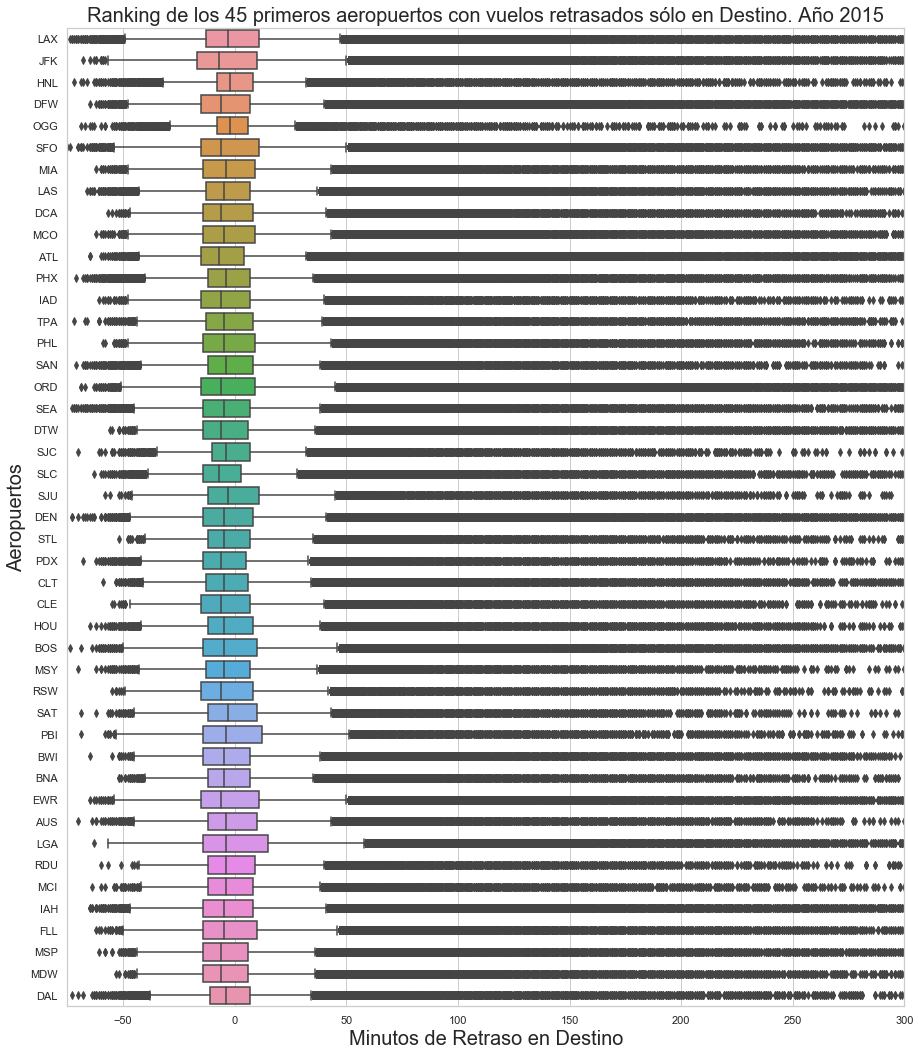

In [180]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-75,300)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)

plt.show()

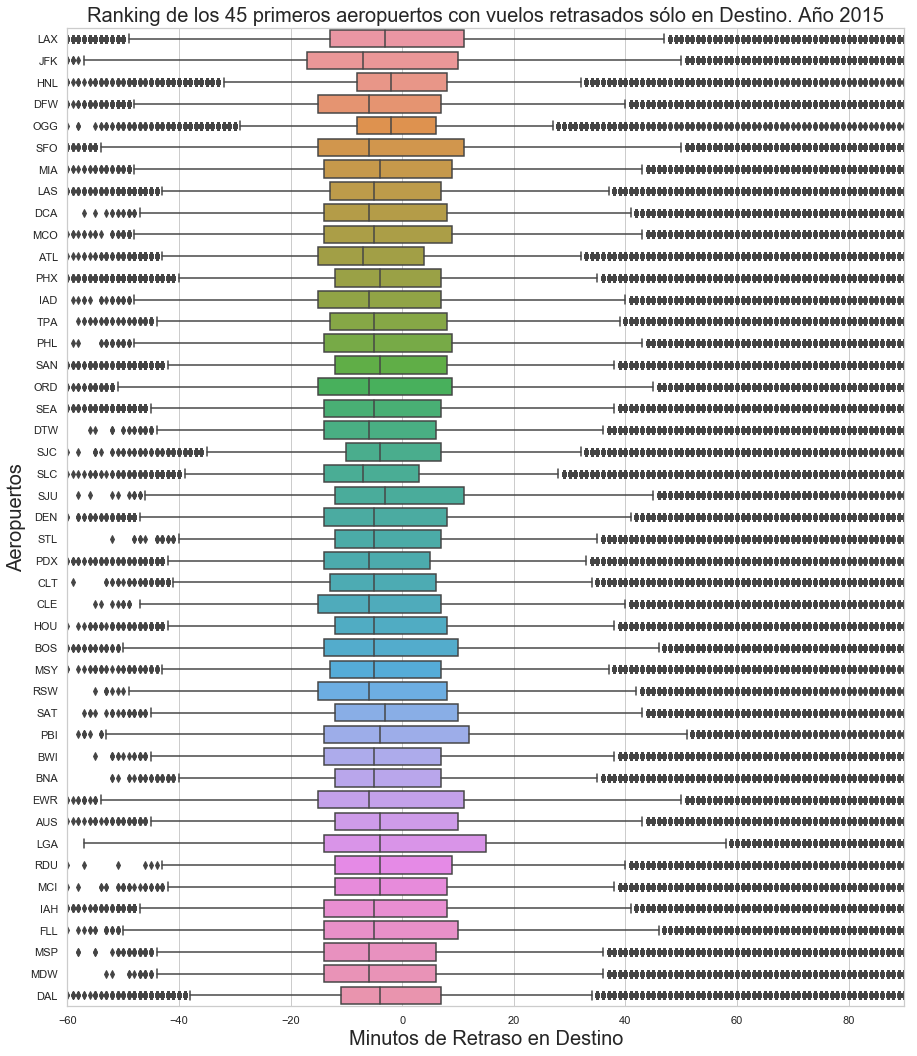

In [181]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(-60,90)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)


plt.show()

Podemos apreciar que hay una gran cantidad de vuelos con adelanto, es decir, que tendremos que si queremos quedarnos solo con retrasos de verdad y sacar sus estadísticos debemos eliminar las muestras con adelanto.

In [182]:
retrasosSoloDestinoEnAeropuertosSinAdelantos = pd.DataFrame(retrasosSoloDestinoEnAeropuertos[(retrasosSoloDestinoEnAeropuertos['ArrDelay'] > 15)])



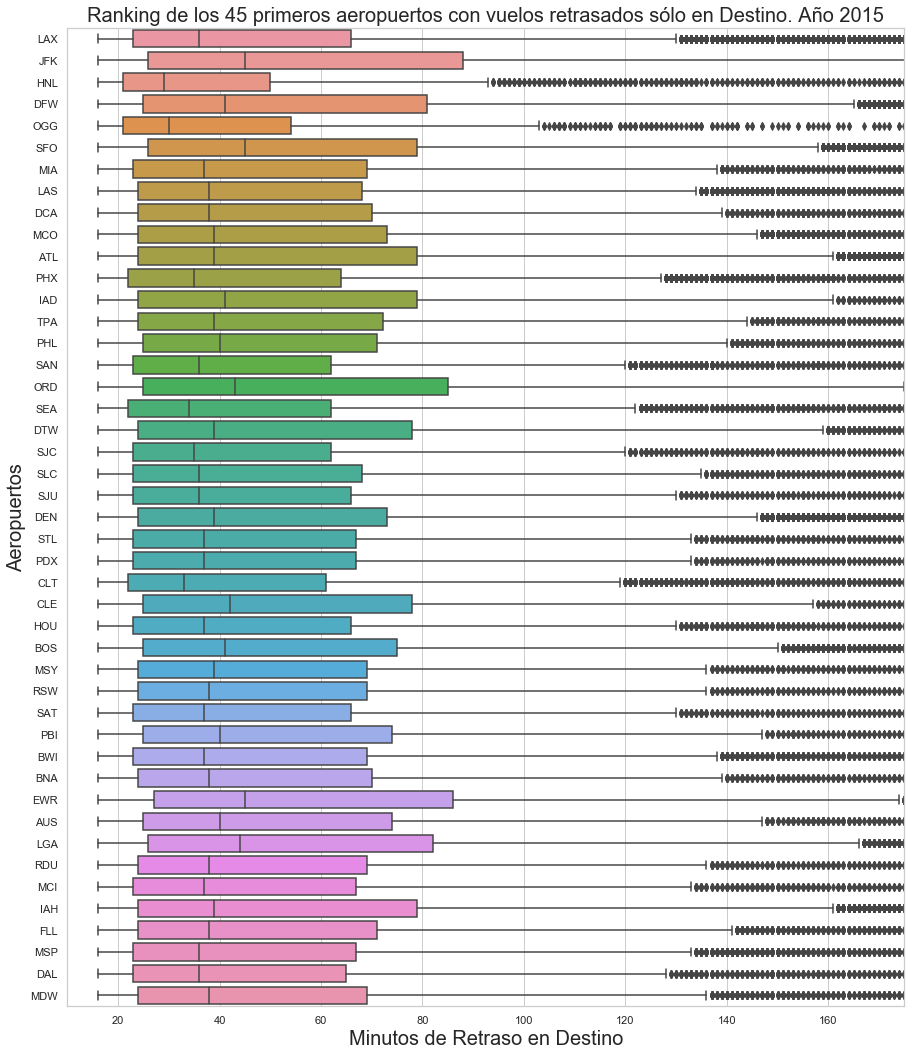

In [183]:
#vamos a despejar un poco el gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(15,18))
plt.xlim(10,175)
ax = sns.boxplot(x=retrasosSoloDestinoEnAeropuertosSinAdelantos["ArrDelay"], y=retrasosSoloDestinoEnAeropuertosSinAdelantos["Dest"])

ax.set_ylabel("Aeropuertos", fontsize=20)
ax.set_xlabel("Minutos de Retraso en Destino", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados sólo en Destino. Año ' + year , fontsize=20)


plt.show()

In [184]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en sólo destino 
vuelosTotalesPorAeropuerto = retrasosSoloDestinoEnAeropuertos.groupby('Dest').aggregate({'Dest': 'count', 'ArrDel15':'sum'})

In [185]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Dest': 'VuelosTotales', 'ArrDel15': 'VuelosRetrasados'})

In [186]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados sólo en destino en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [187]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de sólo en destino en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

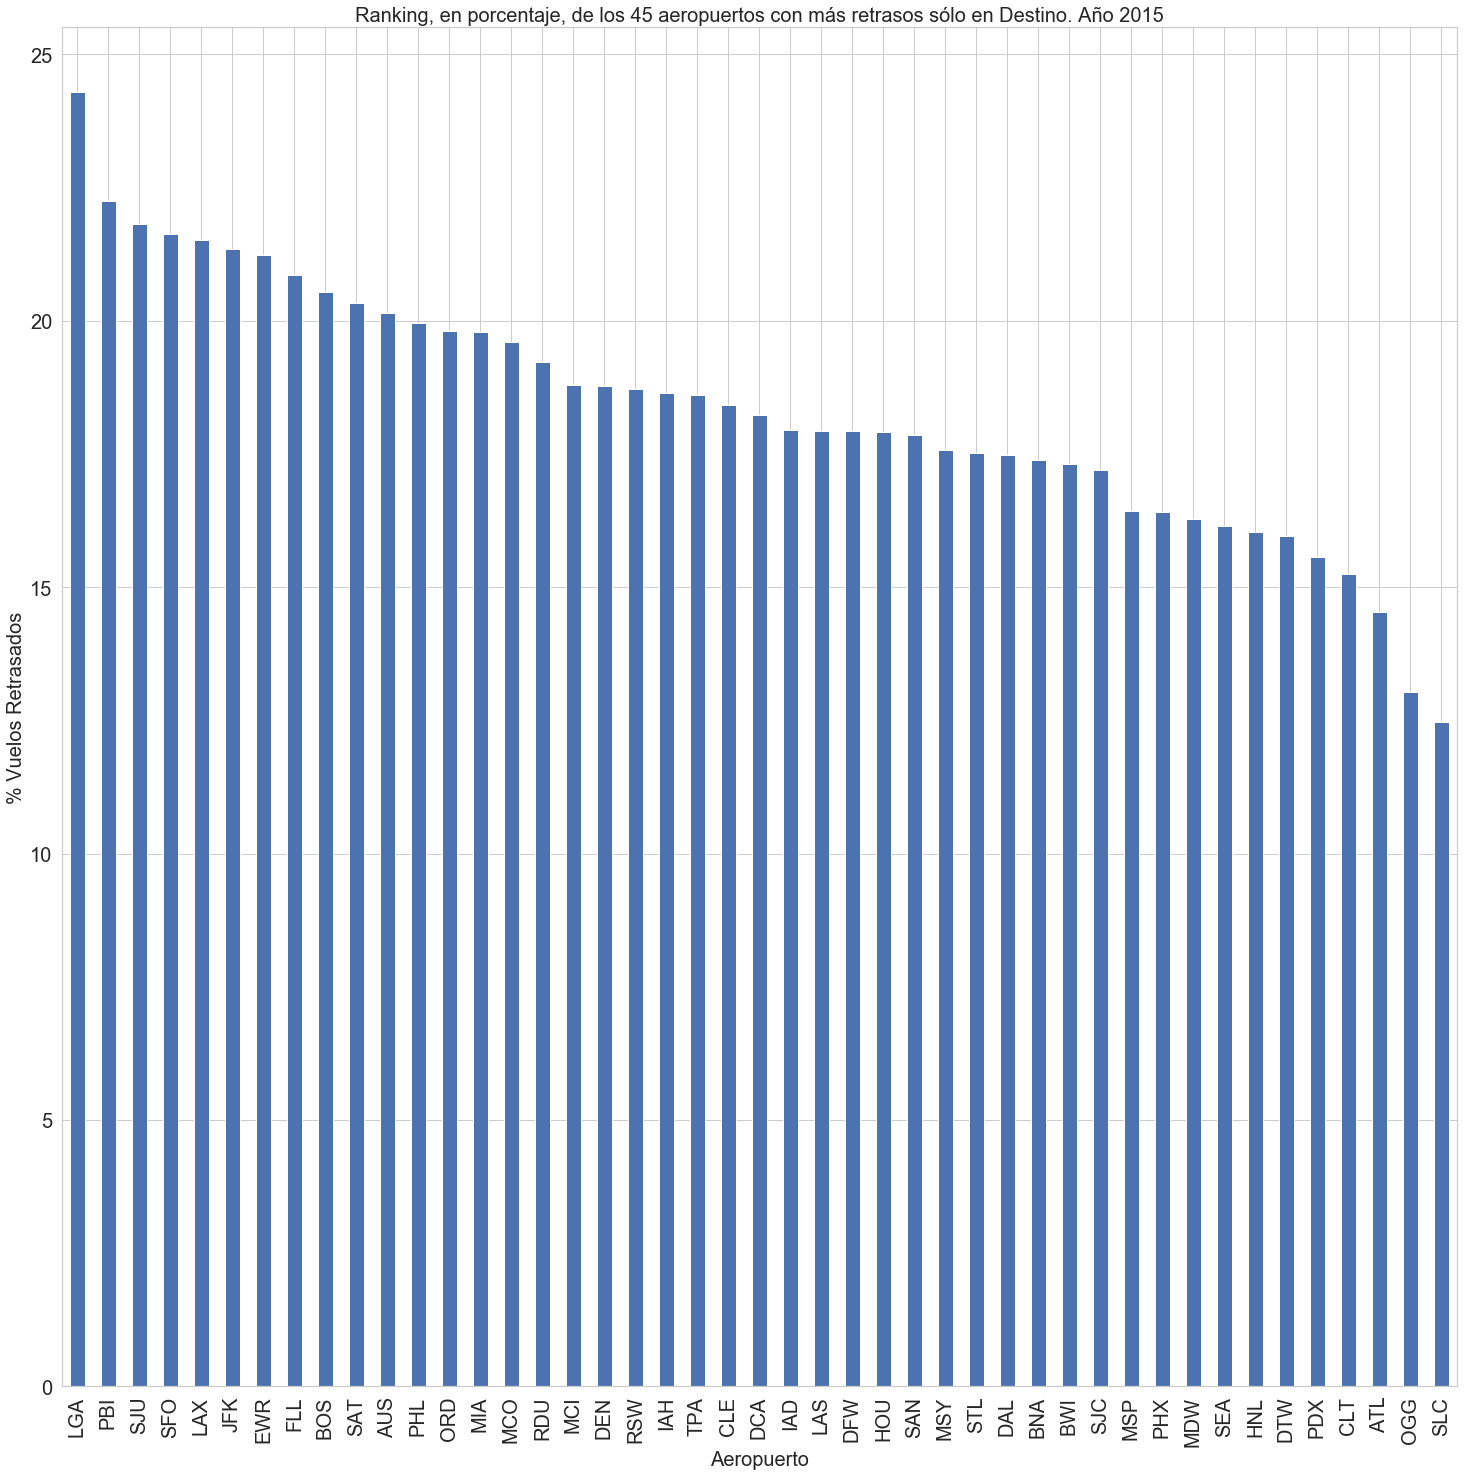

In [188]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos sólo en Destino

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos sólo en Destino. Año ' + year, fontsize=20)

plt.show()

Por porcentaje sobre su total de vuelos, destaca enormemente los 3 aeropuertos principales del área de Nueva York, EWR, LGA y JFK. Y en los 10 primeros 9 de ellos son de la Costa Este y Puerto Rico, sólo SFO (San Francisco) es de la Costa Oeste.

### 1.3.5.1.2 Retraso Destino (CON o SIN retraso en Origen)

En el apartado anterior sólo mostrábamos vuelos que se habían retrasado sólo en Destino y que salieron puntuales en Origen

In [189]:
#vuelos retrasados en Destino saliesen o no retrasados en origen
retrasosDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

In [190]:
retrasos = pd.DataFrame(retrasosDestino['ArrDelay'])

retrasos.head(5)

ArrDelay
5       25.0
23      79.0
33      24.0
34     150.0
58      28.0

In [191]:
retrasos.describe().T

count       mean        std   min   25%   50%   75%     max
ArrDelay  1063439.0  58.914397  64.250318  15.0  23.0  37.0  70.0  1971.0

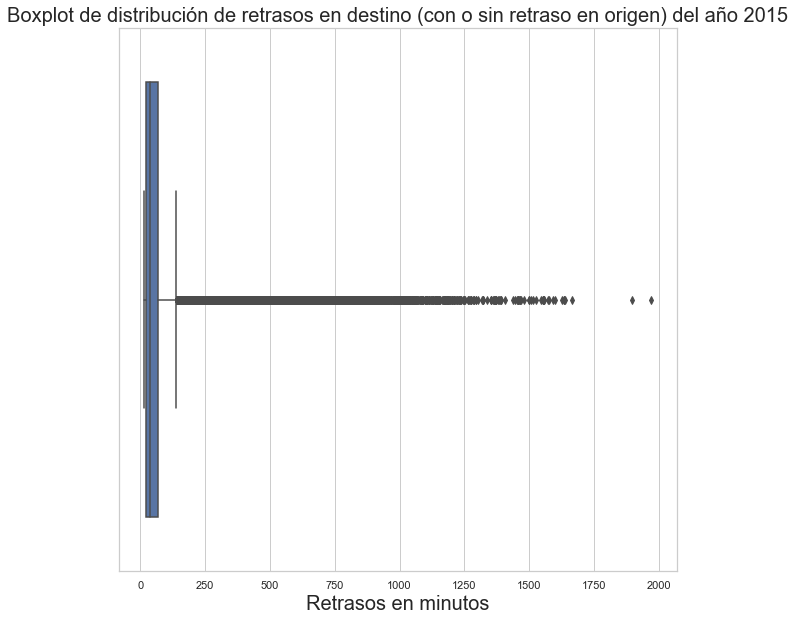

In [192]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x=retrasos["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino (con o sin retraso en origen) del año ' + year, fontsize=20)
plt.show()

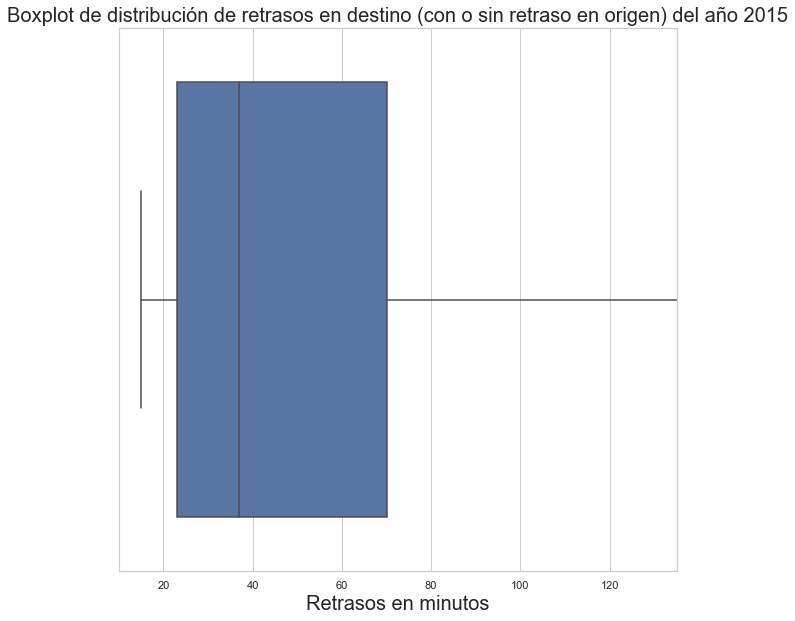

In [193]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xlim(10,135)
ax = sns.boxplot(x=retrasos["ArrDelay"])
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Boxplot de distribución de retrasos en destino (con o sin retraso en origen) del año ' + year, fontsize=20)
plt.show()

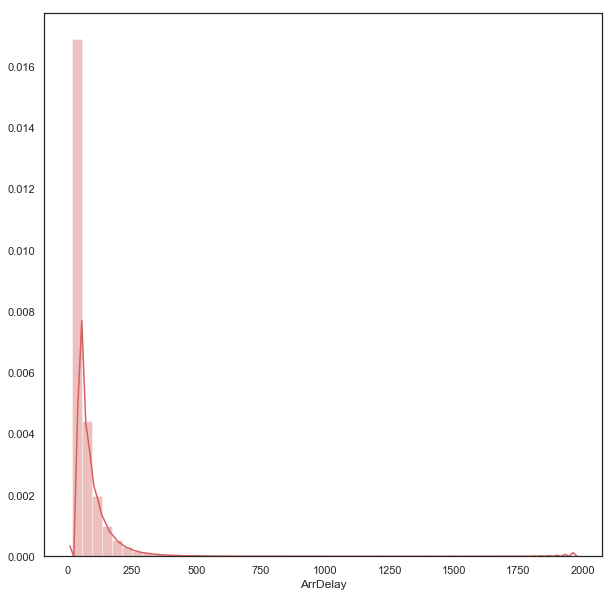

In [194]:
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

sns.distplot(retrasos["ArrDelay"], color="r")

plt.show()

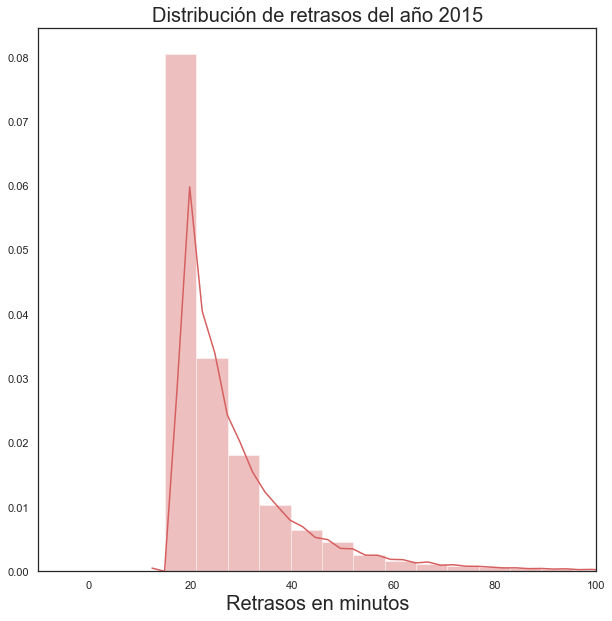

In [195]:
#acortamos la escala del eje X para verlo mejor
# distribución con densidad
sns.set(style="white", palette="muted", color_codes=True)

plt.figure(figsize=(10,10))

ax= sns.distplot(retrasosSoloDestino["ArrDelay"], color="r")
plt.xlim(-10,100)
ax.set_xlabel("Retrasos en minutos", fontsize=20)
ax.set_title('Distribución de retrasos del año ' + year, fontsize=20)



plt.show()

In [196]:
retrasosDestinoPorMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

retrasosDestinoPorMes = pd.DataFrame(retrasosDestinoPorMes.groupby('Month').aggregate({'Month': 'count', 'ArrDelay':'mean'}))


In [197]:
retrasosDestinoPorMes

Month   ArrDelay
Month                   
1       95951  56.694167
2       95179  59.210498
3       95452  56.980577
4       82247  56.163848
5       89645  60.654348
6      115742  63.683192
7      107627  59.339236
8       94113  59.677951
9       60061  54.804066
10      60079  55.181178
11      70571  57.257287
12      96772  62.616418

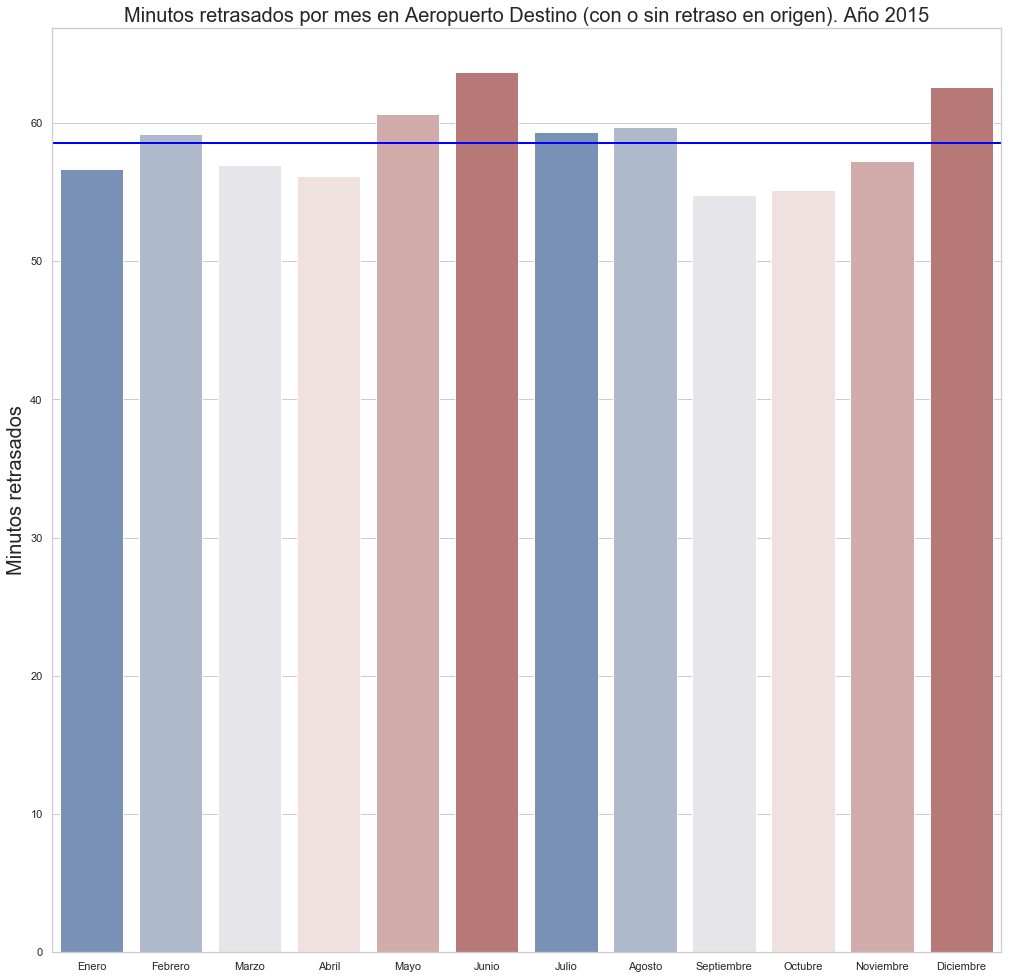

In [198]:

#Vuelos retrasados por el día de la semana

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(17,17))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por mes en Aeropuerto Destino (con o sin retraso en origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [199]:
retrasosDestinoPorDiaSemana = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

retrasosDestinoPorDiaSemana = pd.DataFrame(retrasosDestinoPorDiaSemana.groupby('DayOfWeek').aggregate({'DayOfWeek': 'count', 'ArrDelay':'mean'}))


In [200]:
retrasosDestinoPorDiaSemana

DayOfWeek   ArrDelay
DayOfWeek                      
1             166266  62.744608
2             151183  60.015749
3             153604  57.050884
4             171692  57.892808
5             163441  56.459438
6             110315  58.894312
7             146938  59.334699

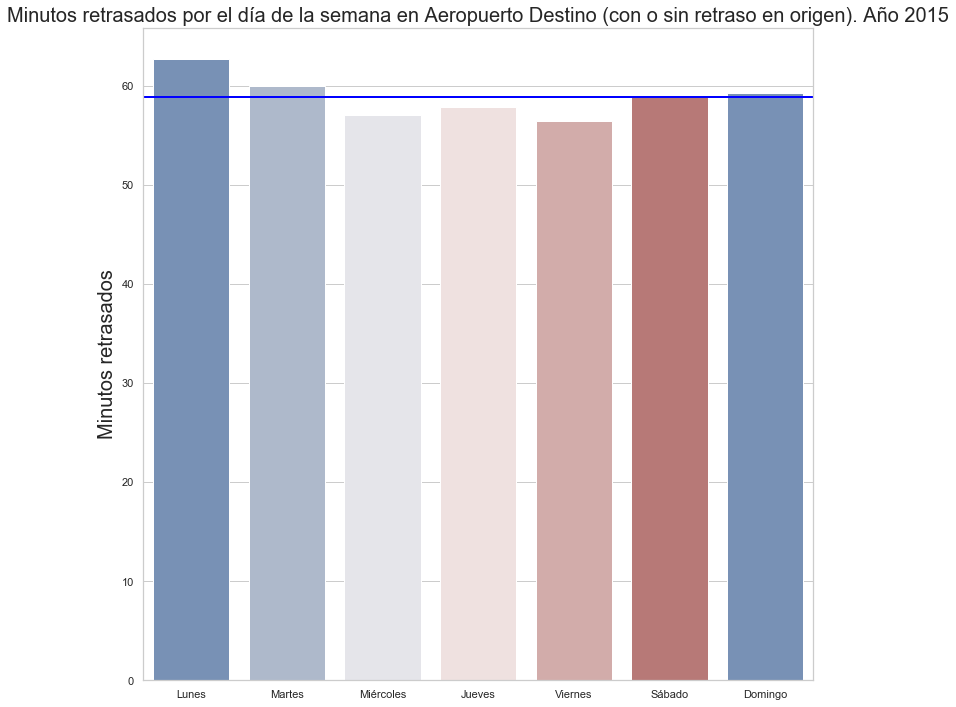

In [201]:

#Vuelos retrasados por el día de la semana

my_xticks=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorDiaSemana['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_title('Minutos retrasados por el día de la semana en Aeropuerto Destino (con o sin retraso en origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaSemana['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [202]:
retrasosDestinoPorHoraDelDia = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorHoraDelDia = pd.DataFrame(retrasosDestinoPorHoraDelDia.groupby('ArrTimeBlk').aggregate({'ArrTimeBlk': 'count', 'ArrDelay':'mean'}))

In [203]:
retrasosDestinoPorHoraDelDia

ArrTimeBlk   ArrDelay
ArrTimeBlk                       
0001-0559        30443  56.770653
0600-0659         9788  65.060074
0700-0759        17228  66.951590
0800-0859        27665  60.300199
0900-0959        38147  59.795502
1000-1059        43680  56.820055
1100-1159        47110  56.639461
1200-1259        50664  56.893633
1300-1359        53975  57.064178
1400-1459        60352  58.305624
1500-1559        57636  58.001319
1600-1659        77004  57.837125
1700-1759        73689  59.528139
1800-1859        84129  59.171499
1900-1959        84819  61.047572
2000-2059        87167  61.106979
2100-2159        89493  60.099818
2200-2259        71652  58.411433
2300-2359        58798  56.515579

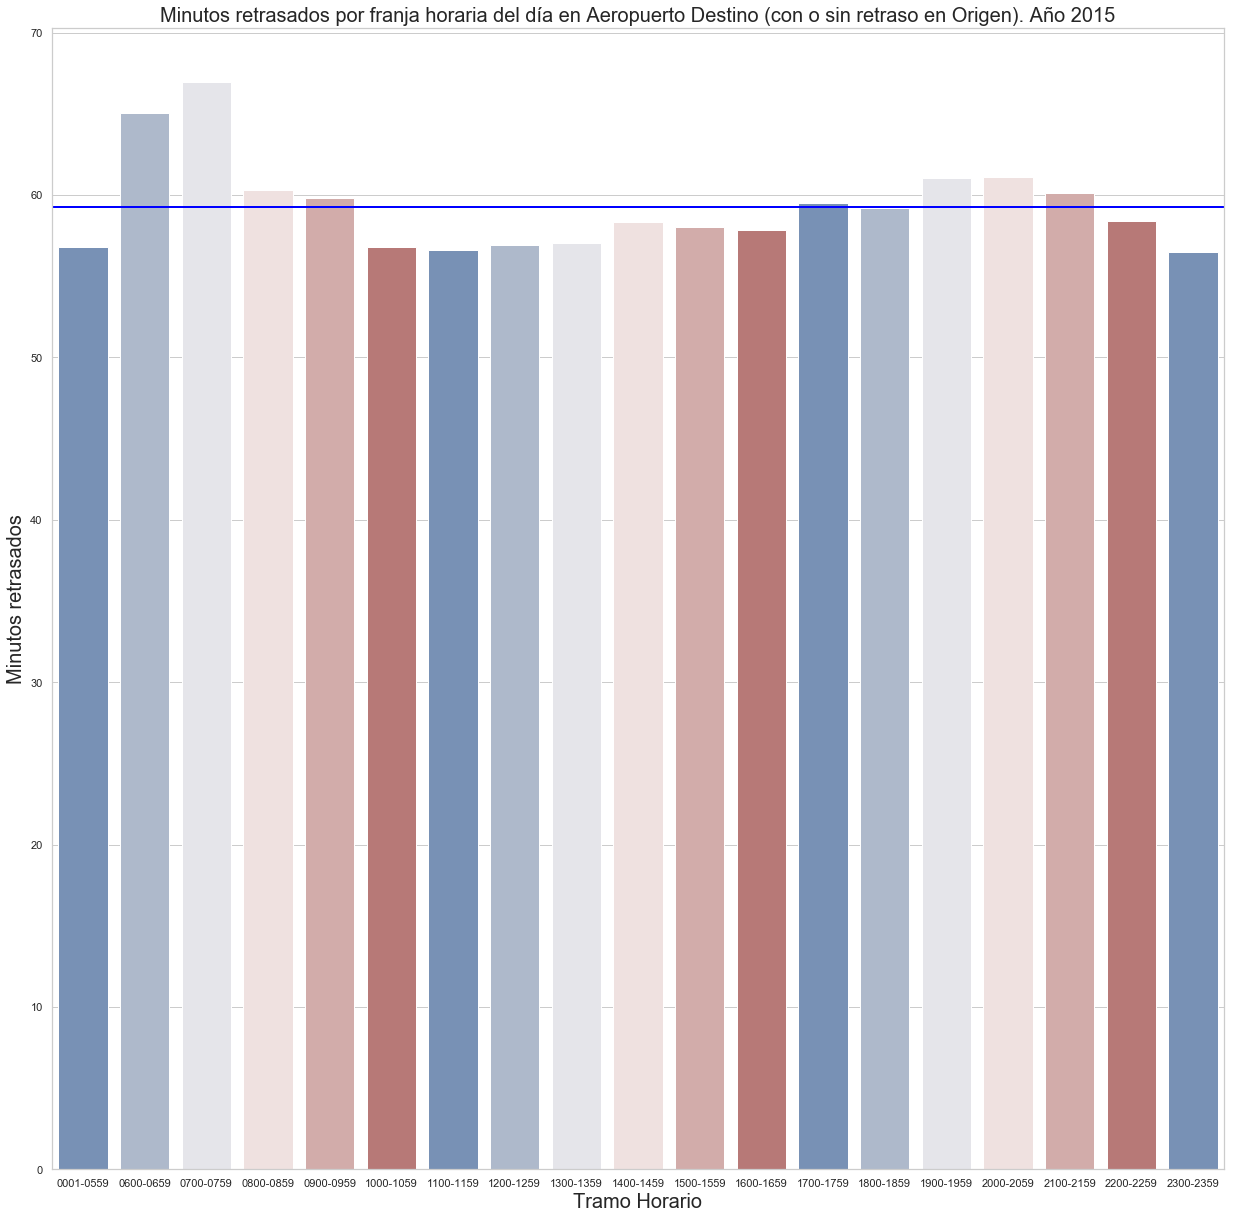

In [204]:
#Vuelos retrasados por franja horaria

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorHoraDelDia.index, y=retrasosDestinoPorHoraDelDia['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Tramo Horario", fontsize=20)
ax.set_title('Minutos retrasados por franja horaria del día en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorHoraDelDia['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [205]:
retrasosDestinoPorDiaDelMes = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorDiaDelMes = pd.DataFrame(retrasosDestinoPorDiaDelMes.groupby('DayofMonth').aggregate({'DayofMonth': 'count', 'ArrDelay':'mean'}))

In [206]:
retrasosDestinoPorDiaDelMes

DayofMonth   ArrDelay
DayofMonth                       
1                36198  60.858528
2                40966  55.642313
3                37513  57.165089
4                35496  58.334995
5                34979  57.581663
6                33034  57.016831
7                29586  53.817515
8                35347  62.607237
9                36983  61.512695
10               35824  61.358447
11               33955  55.715889
12               32334  52.165089
13               33787  56.326368
14               30900  58.450259
15               34602  61.760303
16               35456  55.763764
17               38899  61.069873
18               43350  63.843576
19               34612  56.501734
20               36984  61.984831
21               33975  60.691773
22               34022  55.515813
23               37862  63.267947
24               30805  62.216945
25               30409  55.572692
26               36251  59.888858
27               36068  61.423450
28               31851  58.278735
29               29680  55.357615
30               34730  59.766801
31               16981  63.079795

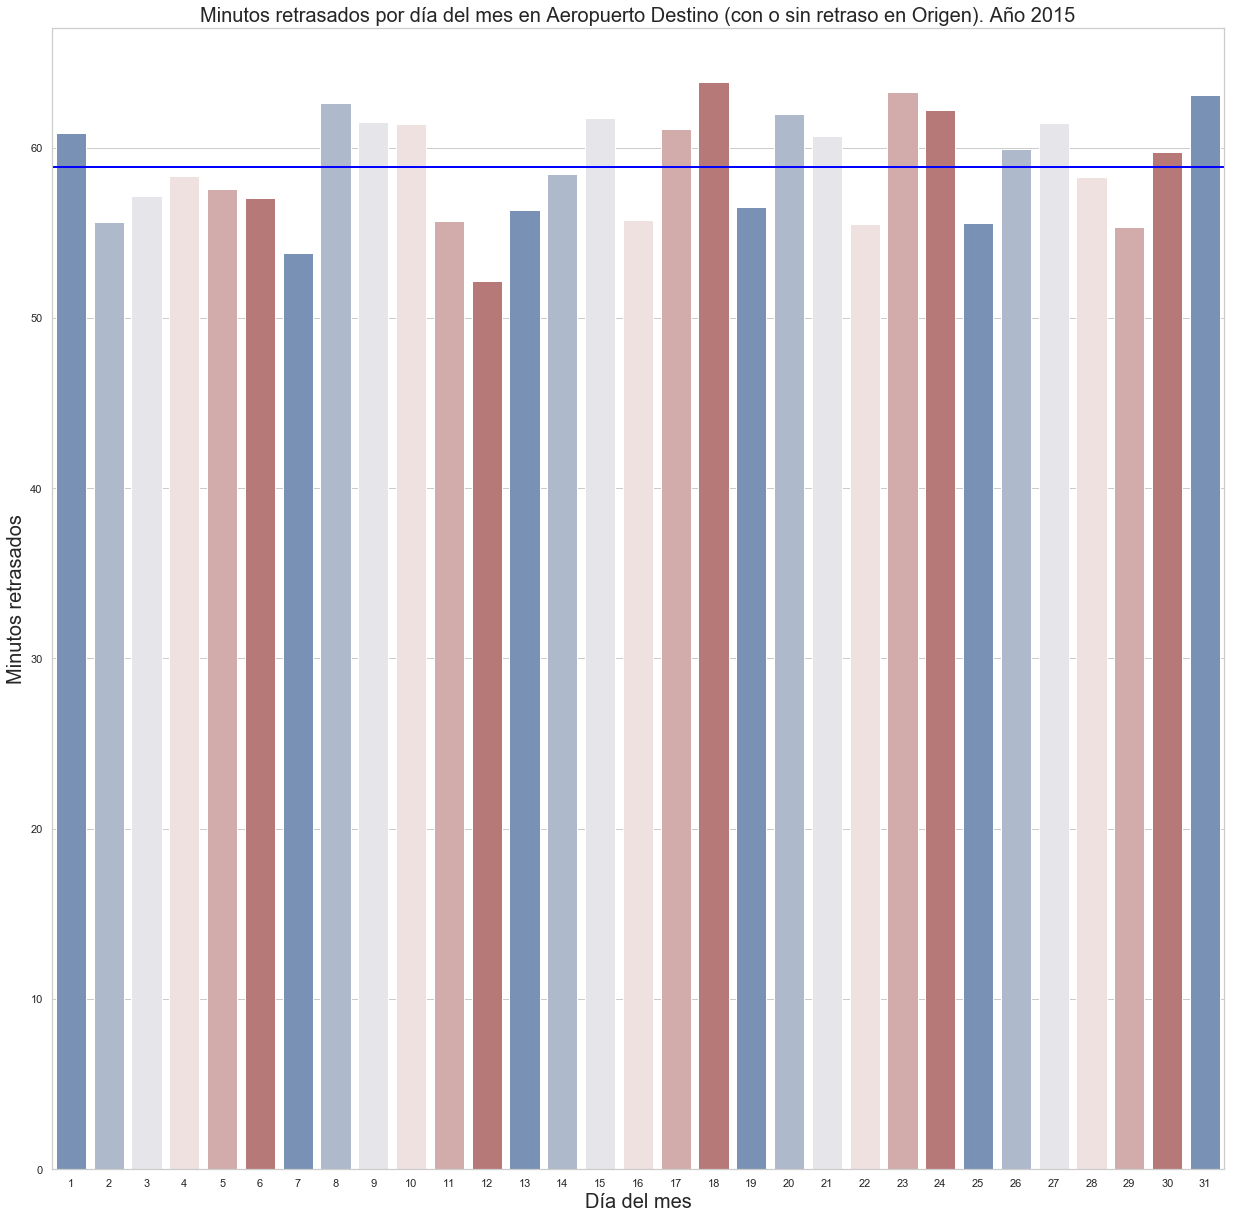

In [207]:

#Vuelos retrasados por dia del mes 

plt.figure(figsize=(21,21))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=retrasosDestinoPorDiaDelMes.index, y=retrasosDestinoPorDiaDelMes['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Día del mes", fontsize=20)
ax.set_title('Minutos retrasados por día del mes en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show() 

In [208]:
retrasosDestinoPorTrimestre = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])
retrasosDestinoPorTrimestre = pd.DataFrame(retrasosDestinoPorTrimestre.groupby('Quarter').aggregate({'Quarter': 'count', 'ArrDelay':'mean'}))

In [209]:
retrasosDestinoPorTrimestre

Quarter   ArrDelay
Quarter                    
1         286582  57.625280
2         287634  60.589106
3         261801  58.420564
4         227422  58.989236

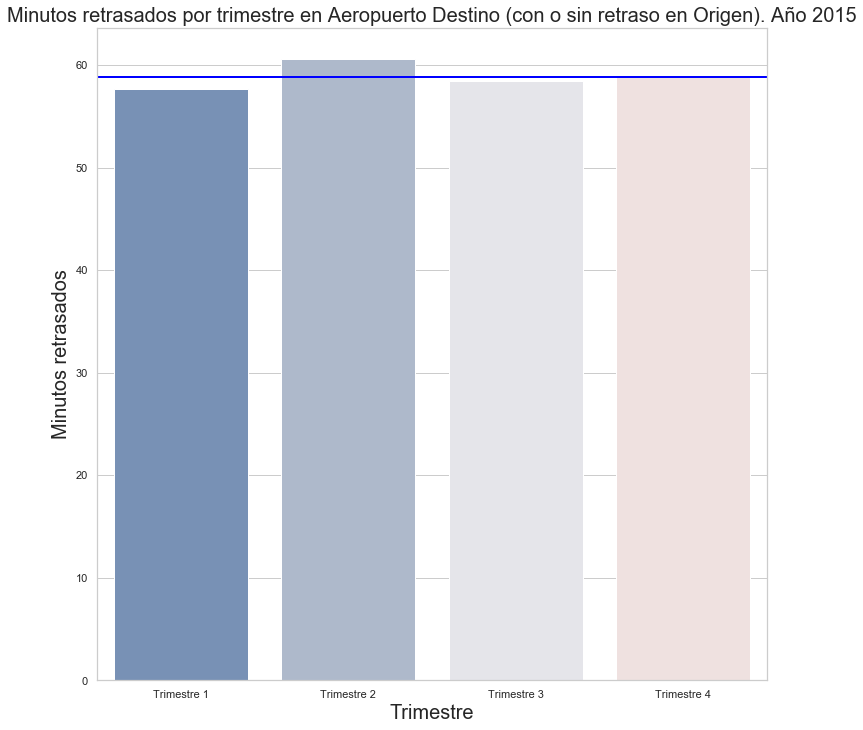

In [210]:
#Vuelos retrasados por trimestre 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

Vistos las diferentes dimensiones temporales, se puede observar:
* cómo se van acumulando los retrasos a lo largo del día.
* como los principios y fines de mes hay algo más de retraso
* no hay gran diferencia entre los días de la semana

In [211]:
#primero cogemos los 45 aeropuertos (de destino) con mayor número de retrasos
retrasosAeropuertos = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)].Dest.value_counts(sort=True)).head(45)

In [212]:
retrasosAeropuertos

Dest
ORD  62123
ATL  55176
DFW  46733
LAX  45714
DEN  40223
SFO  35080
IAH  29808
LGA  26273
PHX  26200
LAS  26169
BOS  24246
EWR  23675
MCO  23531
JFK  21792
MSP  20170
SEA  19587
DTW  18883
CLT  16747
FLL  16567
BWI  16295
MIA  14891
DCA  14701
MDW  14398
PHL  14387
SAN  13648
SLC  13206
TPA  12851
DAL  11471
HOU  10169
AUS   9286
BNA   9047
STL   8979
OAK   8398
PDX   8033
MCI   7932
SMF   7569
HNL   7530
MSY   7467
SJC   7170
CLE   6962
RDU   6710
IAD   6695
SAT   6589
SNA   5931
SJU   5785

In [213]:
#retrasos totales de esos 45 aeropuerto
retrasosAeropuertos.sum()

Dest    834797
dtype: int64

In [214]:
#el 80% de los retrasos acumulados en todo el año se concentran en 45 aeropuertos, de los 300 de media que tenemos por año
pct80AeropuertosDestino = ((retrasosAeropuertos.sum() / (len(dfanual[(dfanual['ArrDel15'] == 1)])))) *100

In [215]:
pct80AeropuertosDestino

Dest    78.499754
dtype: float64

In [216]:
print('45 aeropuertos concentran el %.2f' %pct80AeropuertosDestino + '% de los retrasos del año ' + year)

45 aeropuertos concentran el 78.50% de los retrasos del año 2015


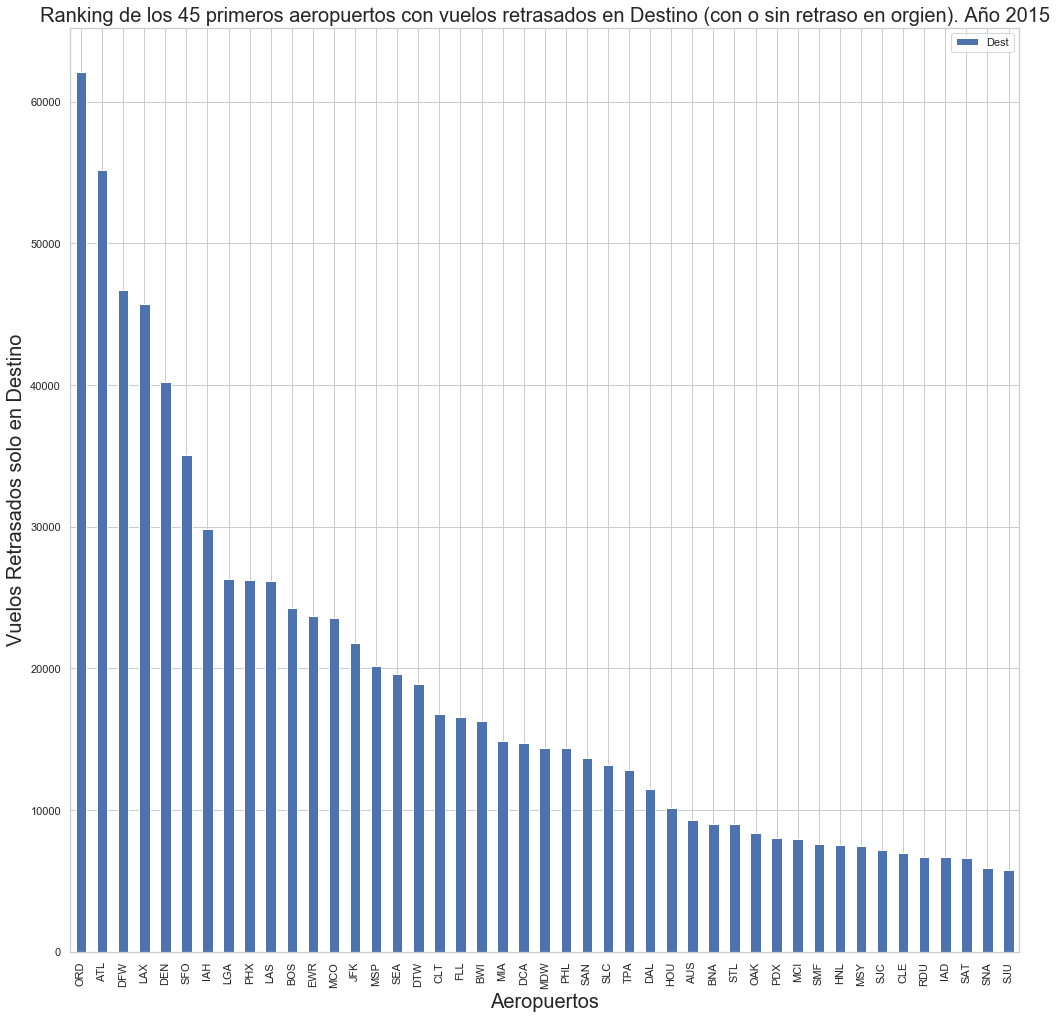

In [217]:
ax = retrasosAeropuertos.plot(kind='bar', figsize=(17,17))

ax.set_ylabel("Vuelos Retrasados solo en Destino", fontsize=20)
ax.set_xlabel("Aeropuertos", fontsize=20)
ax.set_title('Ranking de los 45 primeros aeropuertos con vuelos retrasados en Destino (con o sin retraso en orgien). Año ' + year , fontsize=20)

plt.show()

In [218]:
#nos quedamos con los identificadores de los aeropuertos para poder filtrarlos en el 
aeropuertos = retrasosAeropuertos.index.values.tolist()

In [219]:
#nos quedamos con los datos de esos aeropuertos
retrasosDestinoAeropuertos = dfanual.loc[(dfanual["Dest"].isin(aeropuertos))]

In [220]:
#me quedo con la agrupación por aeropuertos con su total de vuelos y su total de retrasos en sólo destino 
vuelosTotalesPorAeropuerto = retrasosDestinoAeropuertos.groupby('Dest').aggregate({'Dest': 'count', 'ArrDel15':'sum'})

In [221]:
#renombramos columnas
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.rename(columns={'Dest': 'VuelosTotales', 'ArrDel15': 'VuelosRetrasados'})

In [222]:
#calulamos el porcentaje de vuelos retrasados sonbre el total de vuelos operados sólo en destino en el año
vuelosTotalesPorAeropuerto['PctVuelosRetrasados'] = (vuelosTotalesPorAeropuerto['VuelosRetrasados'] / vuelosTotalesPorAeropuerto['VuelosTotales']) * 100

In [223]:
#ordenamos por aeropuertos con mayor porcentaje de vuelos retrasados de sólo en destino en el año
vuelosTotalesPorAeropuerto = vuelosTotalesPorAeropuerto.sort_values(['PctVuelosRetrasados'], ascending=False)

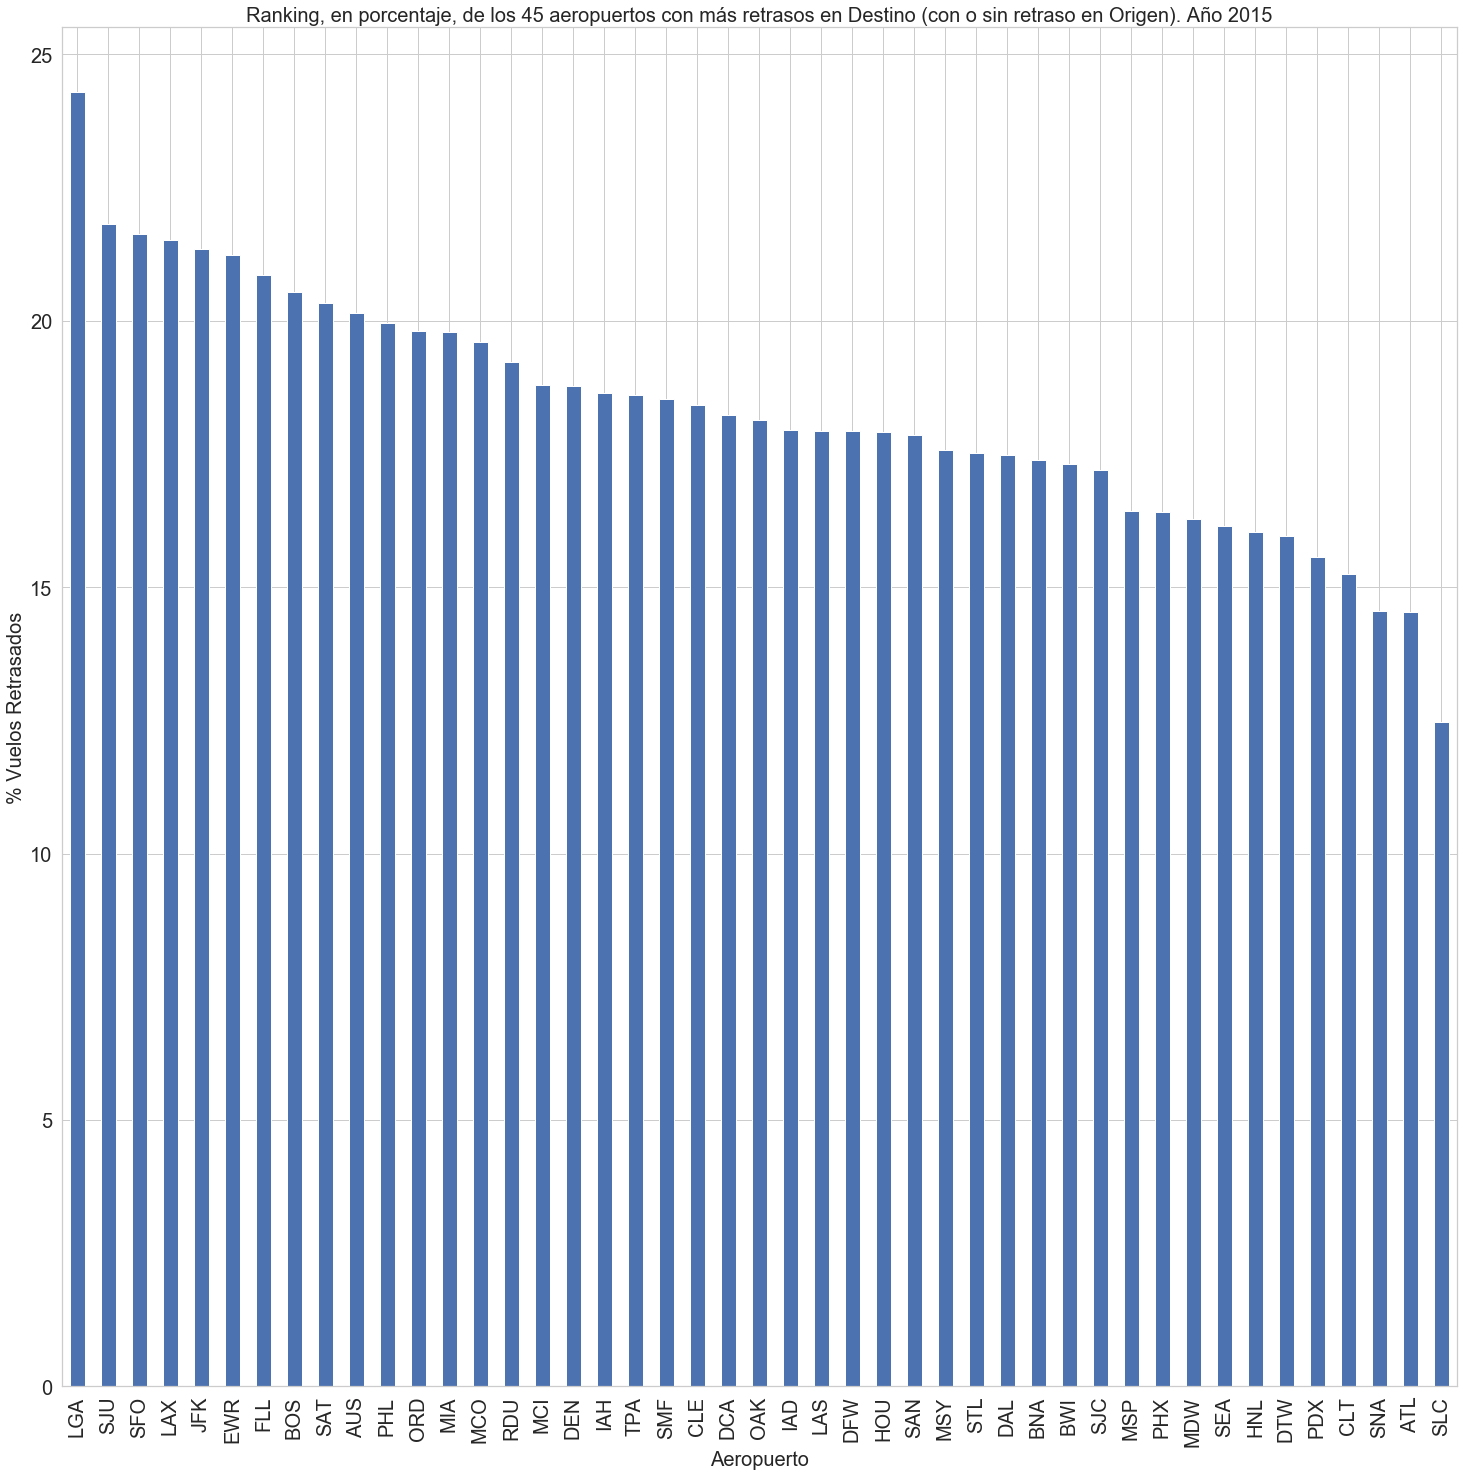

In [224]:
#mostramos el porcentaje de retrasos, ordenados, de los 45 aeropuertos con más retrasos sólo en Destino

ax = vuelosTotalesPorAeropuerto.PctVuelosRetrasados.plot(kind='bar', figsize=(25,25), fontsize=20)

ax.set_xlabel("Aeropuerto", fontsize=20)
ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Ranking, en porcentaje, de los 45 aeropuertos con más retrasos en Destino (con o sin retraso en Origen). Año ' + year, fontsize=20)

plt.show()

En porcentaje de vuelos retrasados, claramente, se ve que 9 de los 10 primeros aeropuertos del ranking son de la Costa Este.

### 1.3.5.1.2 Retraso por zona geográfica del Destino

In [225]:
#cualquier vuelo retrasado en la llegada
retrasosDestino = pd.DataFrame(dfanual[(dfanual['ArrDel15'] == 1)])

In [226]:
#vamos a ponerle de qué zona greográfica es
#hemos creado un csv con las zonas geográficas Este, Central y Oeste y por Norte y Sur 
#abreviado en ES, EN, CS, CN, WS y WN
zonaEstados = pd.read_csv("/Users/moncholv/Documents/Proyecto AIr/datasets/geo/" + 'ZonasEstados.csv', delimiter=';')

In [227]:
#para hacer el join por estado, y como tenemos dos Estados en el Dataset (OriginState y DestState), renombraremos
#sucesivamente la cabecera para hacer el join
zonaEstados = zonaEstados.rename(columns={'State': 'OriginState', 'GeoCluster': 'OriginGeo'})

In [228]:
#hacemos el join por el Estado Origen del vuelo
retrasosDestino = pd.merge(retrasosDestino, zonaEstados, on='OriginState', how='inner')

In [229]:
#ahora renombramos para casar con los de Destino
zonaEstados = zonaEstados.rename(columns={'OriginState': 'DestState', 'OriginGeo': 'DestGeo'})

#hacemos el join por el Estado Destino del vuelo
retrasosDestino = pd.merge(retrasosDestino, zonaEstados, on='DestState', how='inner')

In [230]:
#comprobamos
retrasosDestino[['OriginState', 'OriginGeo', 'DestState', 'DestGeo']].head(5)

OriginState OriginGeo DestState DestGeo
0          NY        EN        CA      WS
1          NY        EN        CA      WS
2          NY        EN        CA      WS
3          NY        EN        CA      WS
4          NY        EN        CA      WS

In [231]:
retrasosDestinoGeo = pd.DataFrame(retrasosDestino.groupby('DestGeo').aggregate({'DestGeo': 'count', 'ArrDelay':'mean'}))

In [232]:
retrasosDestinoGeo

DestGeo   ArrDelay
DestGeo                    
CN         56462  56.554833
CS        204076  60.618275
EN        350408  61.431135
ES        220328  58.861452
WN         18793  52.144522
WS        210976  54.320051

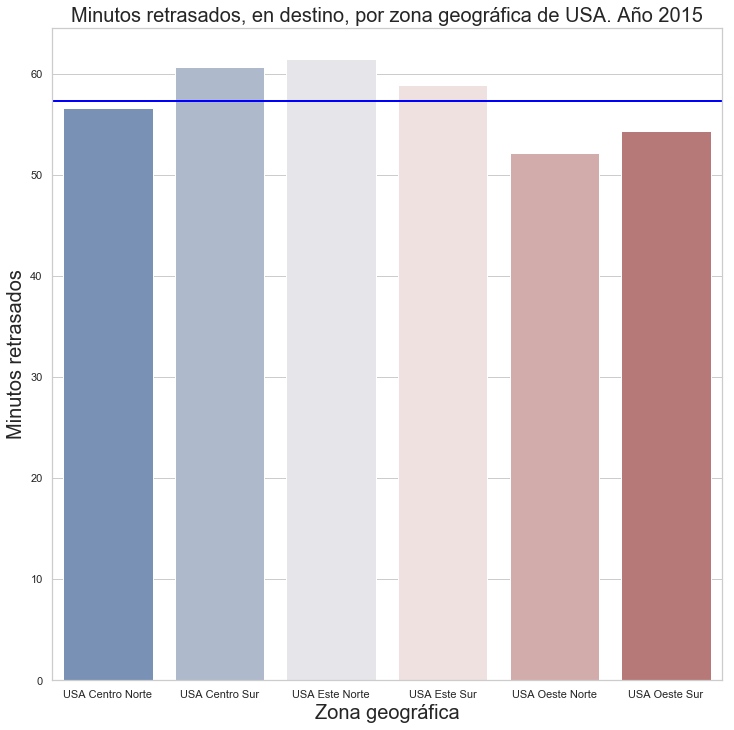

In [233]:
#Vuelos retrasados por Costa Este 

plt.figure(figsize=(12,12))

my_xticks=['USA Centro Norte', 'USA Centro Sur', 'USA Este Norte', 'USA Este Sur', 'USA Oeste Norte', 'USA Oeste Sur']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoGeo['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Zona geográfica", fontsize=20)
ax.set_title('Minutos retrasados, en destino, por zona geográfica de USA. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoGeo['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

Nos quedamos sólo con los de la Costa Este

In [234]:

retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestino[((retrasosDestino['OriginGeo'] == 'EN') | (retrasosDestino['OriginGeo'] == 'ES')) & ((retrasosDestino['DestGeo'] == 'EN') | (retrasosDestino['DestGeo'] == 'ES'))])

In [235]:
retrasosDestinoSoloCostaEste.Dest.unique()

array(['SJU', 'PSE', 'BQN', 'BOS', 'ACK', 'MVY', 'HYA', 'ORH', 'ORD',
       'MDW', 'PIA', 'BMI', 'MLI', 'SPI', 'CMI', 'DCA', 'IAD', 'CHO',
       'RIC', 'ORF', 'ROA', 'PHF', 'SEA', 'GEG', 'BLI', 'PSC', 'MIA',
       'MCO', 'PBI', 'FLL', 'TPA', 'RSW', 'SRQ', 'JAX', 'EYW', 'PNS',
       'DAB', 'MLB', 'ECP', 'TLH', 'VPS', 'GNV', 'UST', 'CLT', 'RDU',
       'GSO', 'ILM', 'AVL', 'FAY', 'OAJ', 'EWN', 'SLC', 'VEL', 'SGU',
       'CNY', 'CDC', 'PWM', 'BGR', 'JFK', 'SYR', 'ROC', 'BUF', 'LGA',
       'ALB', 'HPN', 'ELM', 'SWF', 'ISP', 'PBG', 'IAG', 'BGM', 'ITH',
       'BTV', 'SAV', 'ATL', 'AGS', 'VLD', 'CSG', 'BQK', 'ABY', 'CHS',
       'MYR', 'CAE', 'GSP', 'DTW', 'GRR', 'TVC', 'FNT', 'MBS', 'AZO',
       'LAN', 'CMX', 'MKG', 'MQT', 'PLN', 'ESC', 'CIU', 'APN', 'IMT',
       'BWI', 'BNA', 'TYS', 'MEM', 'TRI', 'CHA', 'MKE', 'MSN', 'ATW',
       'GRB', 'EAU', 'CWA', 'LSE', 'RHI', 'CAK', 'DAY', 'CLE', 'CMH',
       'TOL', 'PHL', 'PIT', 'MDT', 'AVP', 'ABE', 'SCE', 'LBE', 'ERI',
       'EWR', 'TTN',

In [236]:
retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestinoSoloCostaEste.groupby('DestGeo').aggregate({'DestGeo': 'count', 'ArrDelay':'mean'}))

In [237]:
retrasosDestinoSoloCostaEste

DestGeo   ArrDelay
DestGeo                    
EN        244507  62.373548
ES        158871  59.858993

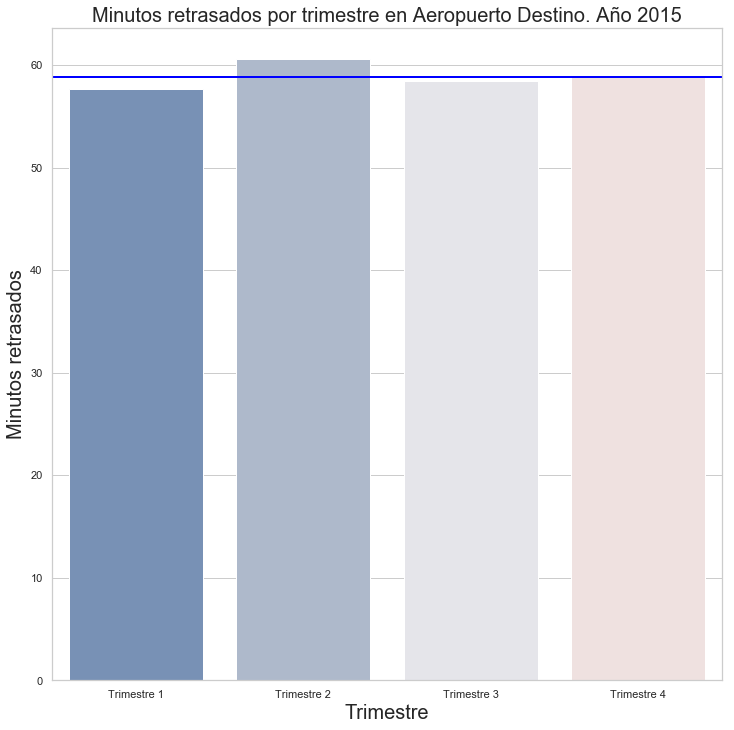

In [238]:
#Vuelos retrasados por Costa Este 

plt.figure(figsize=(12,12))

my_xticks=['Trimestre 1', 'Trimestre 2', 'Trimestre 3', 'Trimestre 4']

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=retrasosDestinoPorTrimestre['ArrDelay'], palette=pal)


ax.set_ylabel("Minutos retrasados", fontsize=20)
ax.set_xlabel("Trimestre", fontsize=20)
ax.set_title('Minutos retrasados por trimestre en Aeropuerto Destino. Año ' + year, fontsize=20)

plt.axhline(retrasosDestinoPorDiaDelMes['ArrDelay'].mean(), color='Blue', linewidth=2)

plt.show()

In [239]:
retrasosDestinoSoloCostaEste = pd.DataFrame(retrasosDestino[((retrasosDestino['OriginGeo'] == 'EN') | (retrasosDestino['OriginGeo'] == 'ES')) & ((retrasosDestino['DestGeo'] == 'EN') | (retrasosDestino['DestGeo'] == 'ES'))])

In [240]:
retrasosDestinoPorRuta = pd.DataFrame(retrasosDestinoSoloCostaEste.groupby(['Route']).aggregate({'Route': 'count', 'ArrDelay':'mean', 'DepDelay': 'mean', 'Origin': 'count', 'Dest':'count'}))

retrasosDestinoPorRuta = retrasosDestinoPorRuta.rename(columns={'Route': 'VuelosTotales', 'ArrDelay': 'MediaRetrasoDestinoTotal', 'DepDelay': 'MediaRetrasoOrigenTotal'})



In [241]:
retrasosDestinoPorRuta.reset_index()

Route  VuelosTotales  MediaRetrasoDestinoTotal  \
0     ABE-ATL            150                 58.640000   
1     ABE-DTW            147                 70.993197   
2     ABE-ORD            145                 76.758621   
3     ABY-ATL            169                 69.792899   
4     ACK-BOS             22                 49.727273   
5     ACK-DCA             10                 73.600000   
6     ACK-JFK             75                102.173333   
7     ACY-ATL             41                 76.170732   
8     ACY-BOS             77                 71.987013   
9     ACY-DTW             60                 83.883333   
10    ACY-FLL            148                 53.635135   
11    ACY-MCO            186                 59.161290   
12    ACY-MYR             26                 82.461538   
13    ACY-ORD             61                 67.803279   
14    ACY-PBI             18                 45.611111   
15    ACY-RSW            120                 56.650000   
16    ACY-TPA             64                 62.390625   
17    AGS-ATL            499                 59.959920   
18    ALB-ATL            132                 64.893939   
19    ALB-BWI            211                 50.014218   
20    ALB-CLT            112                 50.785714   
21    ALB-DTW             68                 56.397059   
22    ALB-EWR             64                 50.546875   
23    ALB-FLL             44                 73.431818   
24    ALB-IAD              2                 37.000000   
25    ALB-MCO             83                 75.096386   
26    ALB-MDW             96                 60.875000   
27    ALB-ORD            166                 75.837349   
28    ALB-TPA             24                 71.083333   
29    APN-DTW             79                 82.810127   
...       ...            ...                       ...   
1709  TTN-BNA              1                 19.000000   
1710  TTN-CLT             68                 70.867647   
1711  TTN-CVG              2                112.000000   
1712  TTN-DTW             40                 68.375000   
1713  TTN-FLL             45                 93.777778   
1714  TTN-IND              1                 40.000000   
1715  TTN-MCO            120                 95.350000   
1716  TTN-MDW             12                 68.333333   
1717  TTN-ORD             42                 86.809524   
1718  TTN-PBI             13                121.461538   
1719  TTN-RDU             47                 97.340426   
1720  TTN-RSW             27                 54.666667   
1721  TTN-TPA             62                 72.725806   
1722  TTN-UST             37                 54.810811   
1723  TVC-ATL              2                 52.500000   
1724  TVC-DTW             78                 73.730769   
1725  TVC-EWR              2                 29.500000   
1726  TVC-LGA              7                 77.428571   
1727  TVC-ORD            320                 68.156250   
1728  TYS-ATL            280                 61.421429   
1729  TYS-DTW              9                 75.888889   
1730  TYS-EWR             22                 56.909091   
1731  TYS-IAD              7                 85.000000   
1732  TYS-LGA             36                 72.250000   
1733  TYS-ORD            478                 70.926778   
1734  UST-IAD              1                 18.000000   
1735  UST-TTN             41                 60.560976   
1736  VEL-SLC              7                190.428571   
1737  VLD-ATL            162                 66.314815   
1738  VPS-ATL            264                 87.075758   

      MediaRetrasoOrigenTotal  Origin  Dest  
0                   50.260000     150   150  
1                   67.156463     147   147  
2                   66.379310     145   145  
3                   64.508876     169   169  
4                   48.181818      22    22  
5                   72.000000      10    10  
6                   98.640000      75    75  
7                   72.609756      41    41

In [242]:
rutasVuelosTop20 = retrasosDestinoPorRuta.sort_values(['VuelosTotales'], ascending=False).head(20)

In [243]:
rutasVuelosTop20

VuelosTotales  MediaRetrasoDestinoTotal  MediaRetrasoOrigenTotal  \
Route                                                                       
ORD-LGA           2511                 66.424134                60.736360   
LGA-ORD           2096                 69.766221                62.997615   
ATL-LGA           1972                 61.746957                54.731744   
LGA-ATL           1752                 70.416096                68.077055   
LGA-BOS           1725                 58.513043                48.092174   
MIA-LGA           1722                 56.698026                48.764808   
BOS-LGA           1698                 63.113074                50.055948   
ORD-BOS           1640                 64.046341                63.240244   
MCO-JFK           1574                 79.862135                77.104828   
ATL-ORD           1550                 65.132903                55.187742   
ATL-MCO           1523                 52.695338                48.061064   
ORD-ATL           1516                 72.078496                67.650396   
LGA-FLL           1504                 66.698803                59.079787   
DCA-BOS           1496                 58.157086                45.635027   
FLL-LGA           1463                 62.291183                54.102529   
BOS-ORD           1439                 60.689368                51.743572   
ORD-DCA           1431                 63.953878                60.291405   
LGA-MIA           1414                 60.487977                50.388967   
BOS-DCA           1409                 52.498935                39.251242   
ATL-PHL           1382                 60.512301                58.253256   

         Origin  Dest  
Route                  
ORD-LGA    2511  2511  
LGA-ORD    2096  2096  
ATL-LGA    1972  1972  
LGA-ATL    1752  1752  
LGA-BOS    1725  1725  
MIA-LGA    1722  1722  
BOS-LGA    1698  1698  
ORD-BOS    1640  1640  
MCO-JFK    1574  1574  
ATL-ORD    1550  1550  
ATL-MCO    1523  1523  
ORD-ATL    1516  1516  
LGA-FLL    1504  1504  
DCA-BOS    1496  1496  
FLL-LGA    1463  1463  
BOS-ORD    1439  1439  
ORD-DCA    1431  1431  
LGA-MIA    1414  1414  
BOS-DCA    1409  1409  
ATL-PHL    1382  1382

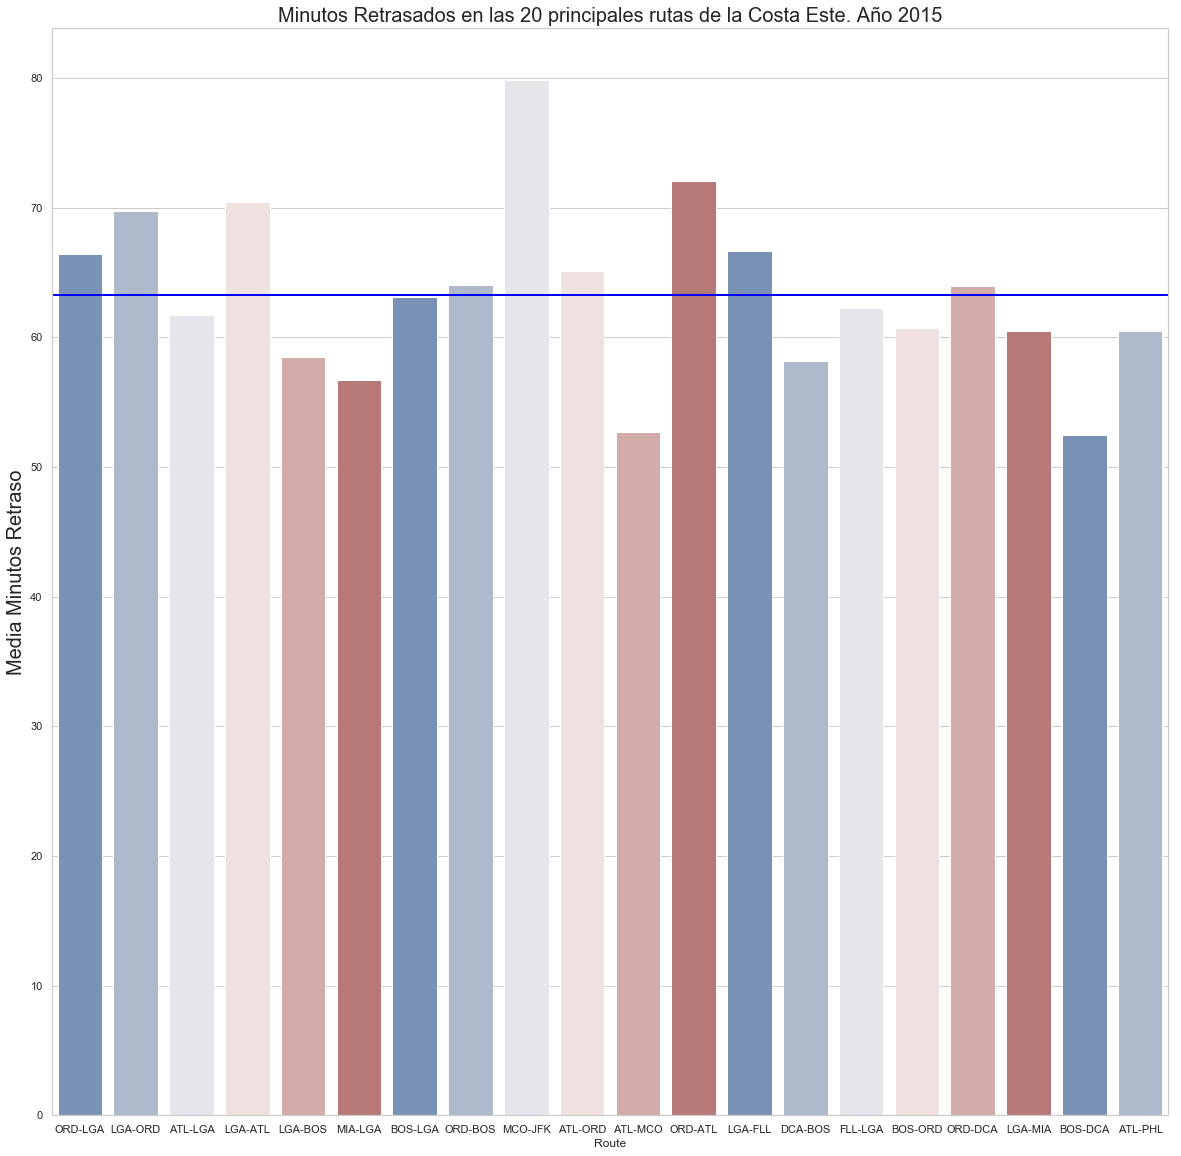

In [244]:
#retaso medio en destino  en las 20 principales rutas retrasadas de la costa Este

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=rutasVuelosTop20.index, y=rutasVuelosTop20['MediaRetrasoDestinoTotal'], palette=pal)

ax.set_ylabel("Media Minutos Retraso", fontsize=20)
ax.set_title('Minutos Retrasados en las 20 principales rutas de la Costa Este. Año ' + year, fontsize=20)

plt.axhline(rutasVuelosTop20['MediaRetrasoDestinoTotal'].mean(), color='Blue', linewidth=2)

plt.show()

## 1.3.6 Cancelaciones de Vuelos

In [245]:
#Vuelos que se han cancelado
len(dfanual[dfanual['Cancelled'] == 1])

89884

In [246]:
vuelosCanceladosPorMes = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorMes = vuelosCanceladosPorMes.append({'mes': df["Month"][1], 'vuelos': len(df[(df['Cancelled'] == 1)])}, ignore_index=True)


In [247]:
vuelosCanceladosPorMes

mes vuelos
0    1  11982
1    2  20517
2    3  11002
3    4   4520
4    5   5694
5    6   9120
6    7   4806
7    8   5052
8    9   2075
9   10   2454
10  11   4599
11  12   8063

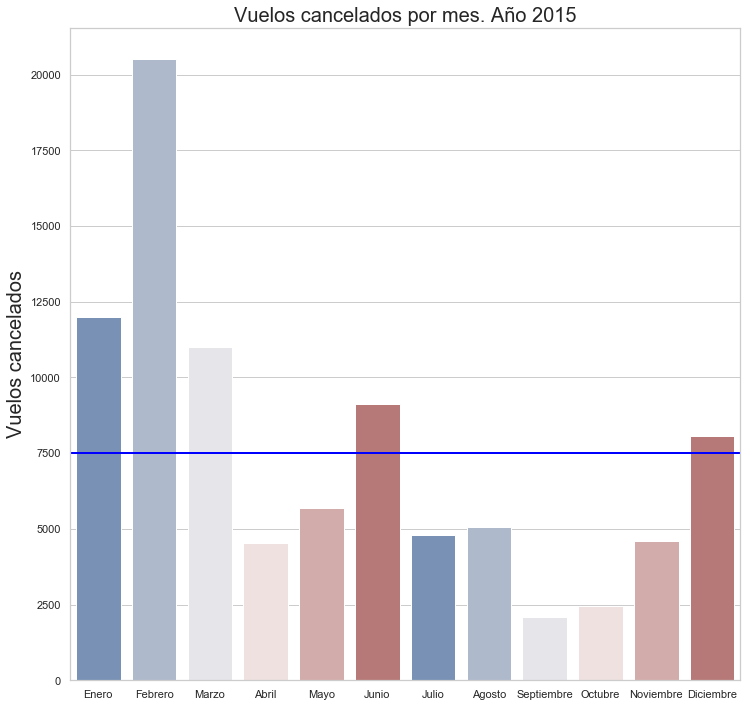

In [248]:
#Vuelos retrasados por mes

my_xticks=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorMes['vuelos'], palette=pal)


ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por mes. Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorMes['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

In [249]:
#comprobación de que tenemos o no códigos de cancelación asociados a los cancelados (entre 2001 y 2003 no tenemos)
#hay 65143
conCodigo = dfanual.CancellationCode.dropna()
len(conCodigo)

89884

Tenemos motivos de cancelación, así que vamos a estudiarlos

### 1.3.6.1 Cancelados por la Aerolínea

In [250]:
#cancelados por culpa de aerolínea
len(dfanual[dfanual['CancellationCode'] == 'A'])

25262

In [251]:
vuelosCanceladosPorAerolinea = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorAerolinea = vuelosCanceladosPorAerolinea.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'A')])}, ignore_index=True)


In [252]:
vuelosCanceladosPorAerolinea

mes vuelos
0    1   2874
1    2   2815
2    3   2494
3    4   1796
4    5   2007
5    6   3619
6    7   2588
7    8   2364
8    9   1088
9   10    953
10  11   1085
11  12   1579

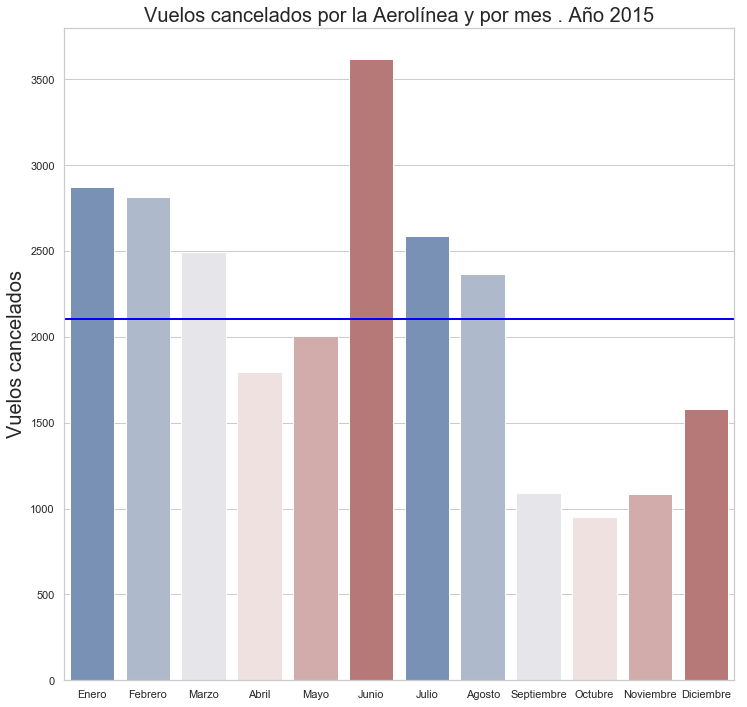

In [253]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorAerolinea['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por la Aerolínea y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorAerolinea['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.2 Cancelados por Meteorología

In [254]:
#cancelados por las condiciones meteorológicas
len(dfanual[dfanual['CancellationCode'] == 'B'])

48851

In [255]:
vuelosCanceladosPorMeteo = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorMeteo = vuelosCanceladosPorMeteo.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'B')])}, ignore_index=True)


In [256]:
vuelosCanceladosPorMeteo

mes vuelos
0    1   7020
1    2  15447
2    3   6864
3    4   1789
4    5   2780
5    6   3325
6    7    882
7    8   1310
8    9    505
9   10    977
10  11   2339
11  12   5613

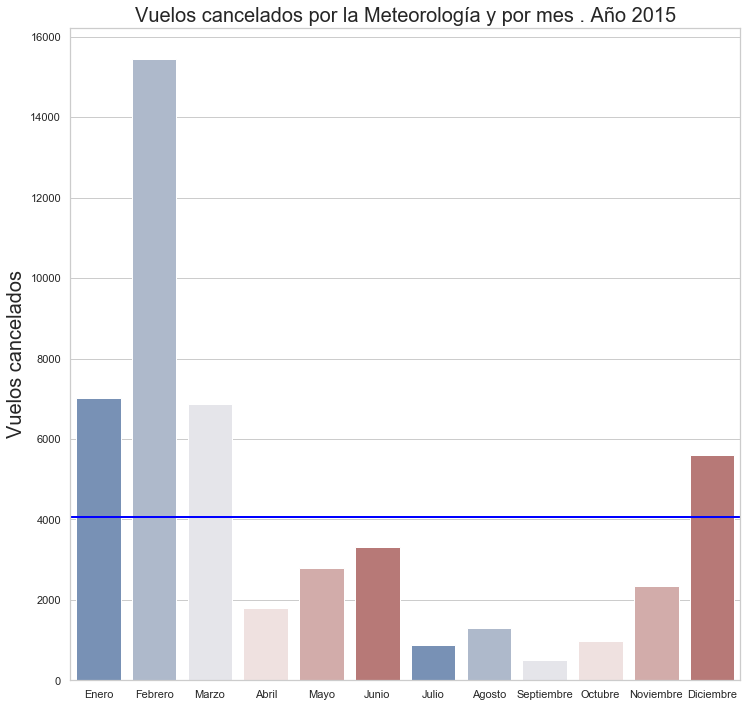

In [257]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorMeteo['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por la Meteorología y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorMeteo['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.3 Cancelados por Espacio Aéreo

In [258]:
#cancelados por el Espacio Aéreo
len(dfanual[dfanual['CancellationCode'] == 'C'])

15749

In [259]:
vuelosCanceladosPorNAS = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorNAS = vuelosCanceladosPorNAS.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'C')])}, ignore_index=True)


In [260]:
vuelosCanceladosPorNAS

mes vuelos
0    1   2087
1    2   2254
2    3   1639
3    4    935
4    5    906
5    6   2176
6    7   1335
7    8   1376
8    9    482
9   10    524
10  11   1164
11  12    871

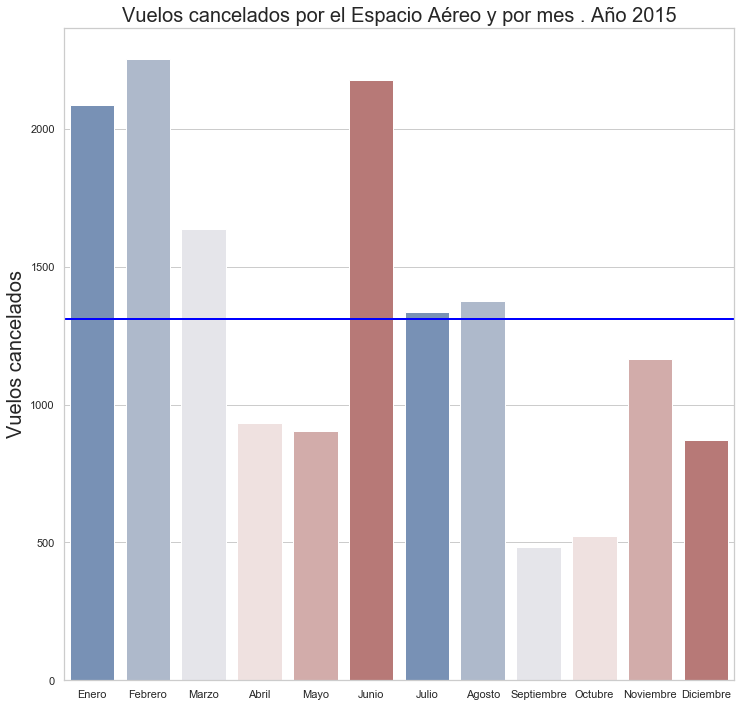

In [261]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorNAS['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por el Espacio Aéreo y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorNAS['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.4 Cancelación por motivos de Seguridad

In [262]:
#cancelados por Seguridad (física)
len(dfanual[dfanual['CancellationCode'] == 'D'])

22

In [263]:
vuelosCanceladosPorSeguridad = pd.DataFrame(columns=['mes', 'vuelos'])

for df in dataframes:
    vuelosCanceladosPorSeguridad = vuelosCanceladosPorSeguridad.append({'mes': df["Month"][1], 'vuelos': len(df[(df['CancellationCode'] == 'D')])}, ignore_index=True)

In [264]:
vuelosCanceladosPorSeguridad

mes vuelos
0    1      1
1    2      1
2    3      5
3    4      0
4    5      1
5    6      0
6    7      1
7    8      2
8    9      0
9   10      0
10  11     11
11  12      0

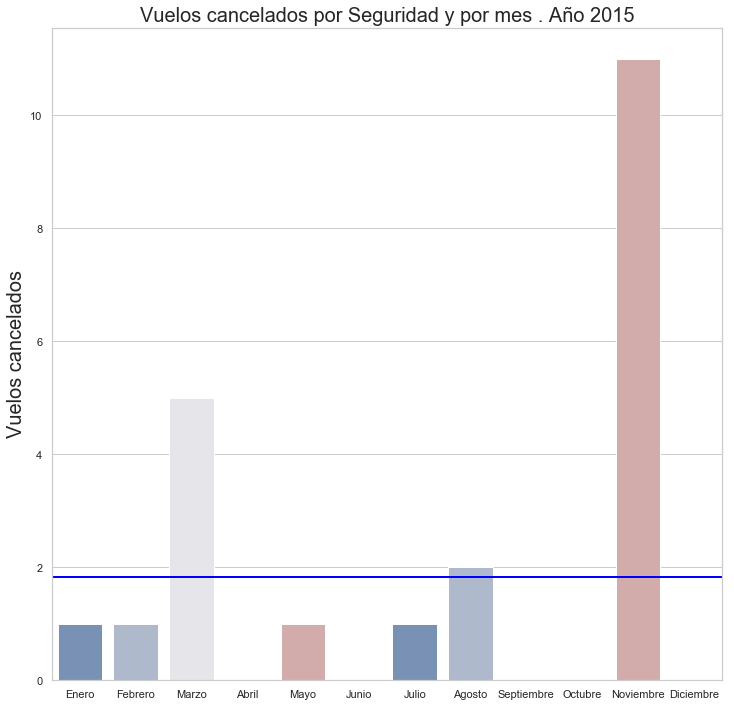

In [265]:
plt.figure(figsize=(12,12))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=vuelosCanceladosPorSeguridad['vuelos'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Vuelos cancelados por Seguridad y por mes . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorSeguridad['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

### 1.3.6.5 Cancelaciones distribuidas por aerolíneas

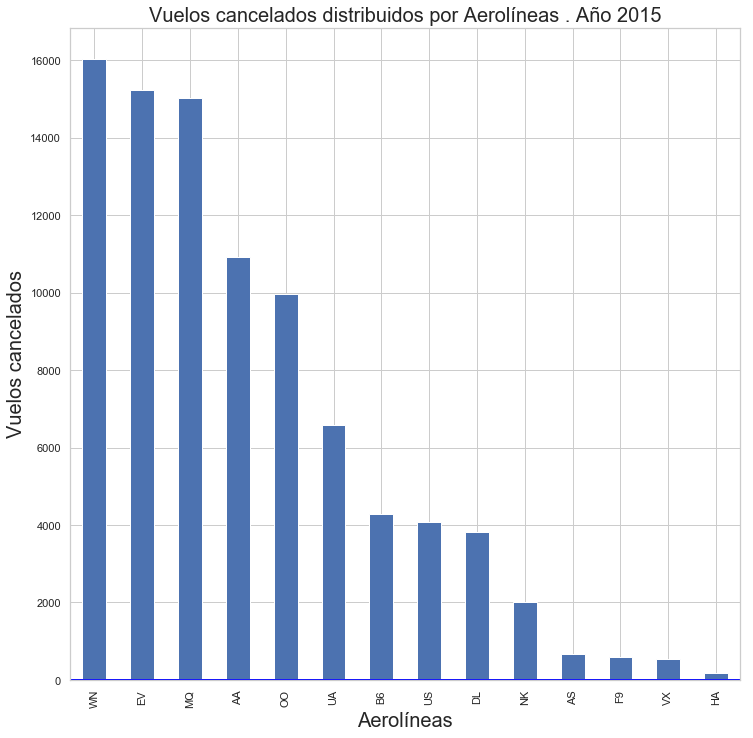

In [266]:
plt.figure(figsize=(12, 12))

ax = dfanual[dfanual['Cancelled'] == 1].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar')

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_xlabel("Aerolíneas", fontsize=20)
ax.set_title('Vuelos cancelados distribuidos por Aerolíneas . Año ' + year, fontsize=20)

plt.axhline(vuelosCanceladosPorSeguridad['vuelos'].mean(), color='Blue', linewidth=2)

plt.show()

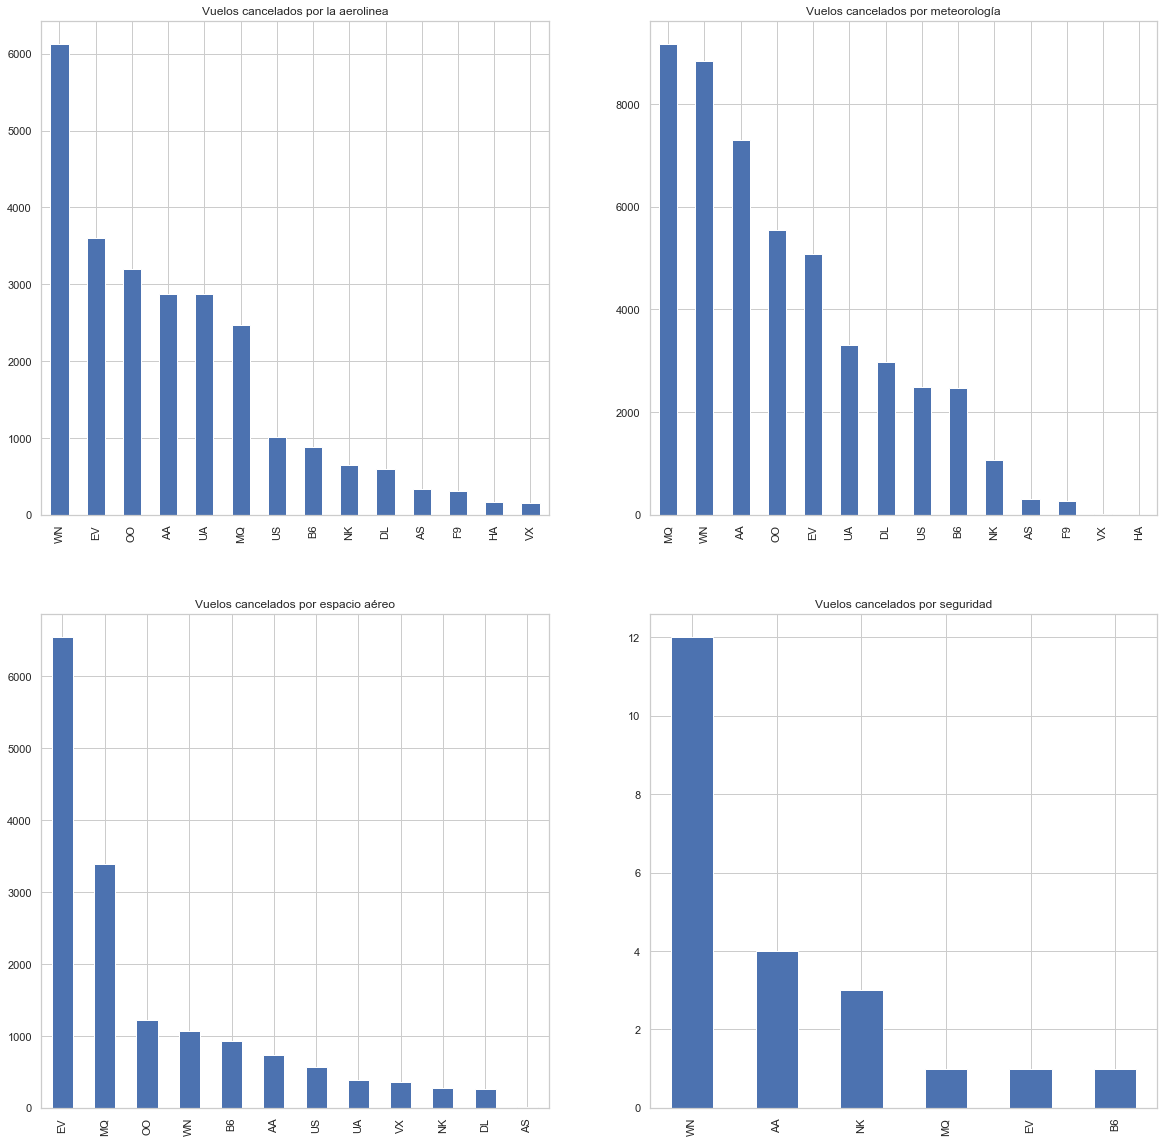

In [267]:
#Sacamos gráficos por compañía
plt.figure(figsize=(20, 20))

plt.subplot(2,2,1)
dfanual[dfanual['CancellationCode'] == 'A'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por la aerolinea')

plt.subplot(2,2,2)
dfanual[dfanual['CancellationCode'] == 'B'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por meteorología')

plt.subplot(2,2,3)
dfanual[dfanual['CancellationCode'] == 'C'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por espacio aéreo')

plt.subplot(2,2,4)
dfanual[dfanual['CancellationCode'] == 'D'].IATA_CODE_Reporting_Airline.value_counts().plot(kind='bar',title='Vuelos cancelados por seguridad')


### 1.3.6.6 Cancelaciones por Rutas

Mostramos aquellas rutas con más cancelaciones

#### 1.3.6.6.1 Vuelos cancelados por Ruta por la Aerolínea

In [268]:
rutasVuelosCanceladosAerolinea = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'A'].Route.value_counts(sort=True))

In [269]:
rutasVuelosCanceladosAerolinea.shape

(3275, 1)

In [270]:
rutasVuelosCanceladosAerolinea = rutasVuelosCanceladosAerolinea.rename(columns={'Route': 'VuelosCancelados'})

In [271]:
rutasVuelosCanceladosAerolinea.head(10)

VuelosCancelados
LAX-SFO               249
SFO-LAX               233
LAX-OAK               216
OAK-LAX               208
HOU-DAL               163
DAL-HOU               135
BUR-OAK               132
SJC-LAX               130
LAX-SJC               125
LGA-ORD               125

In [272]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosAerolinea = rutasVuelosCanceladosAerolinea.head(20)

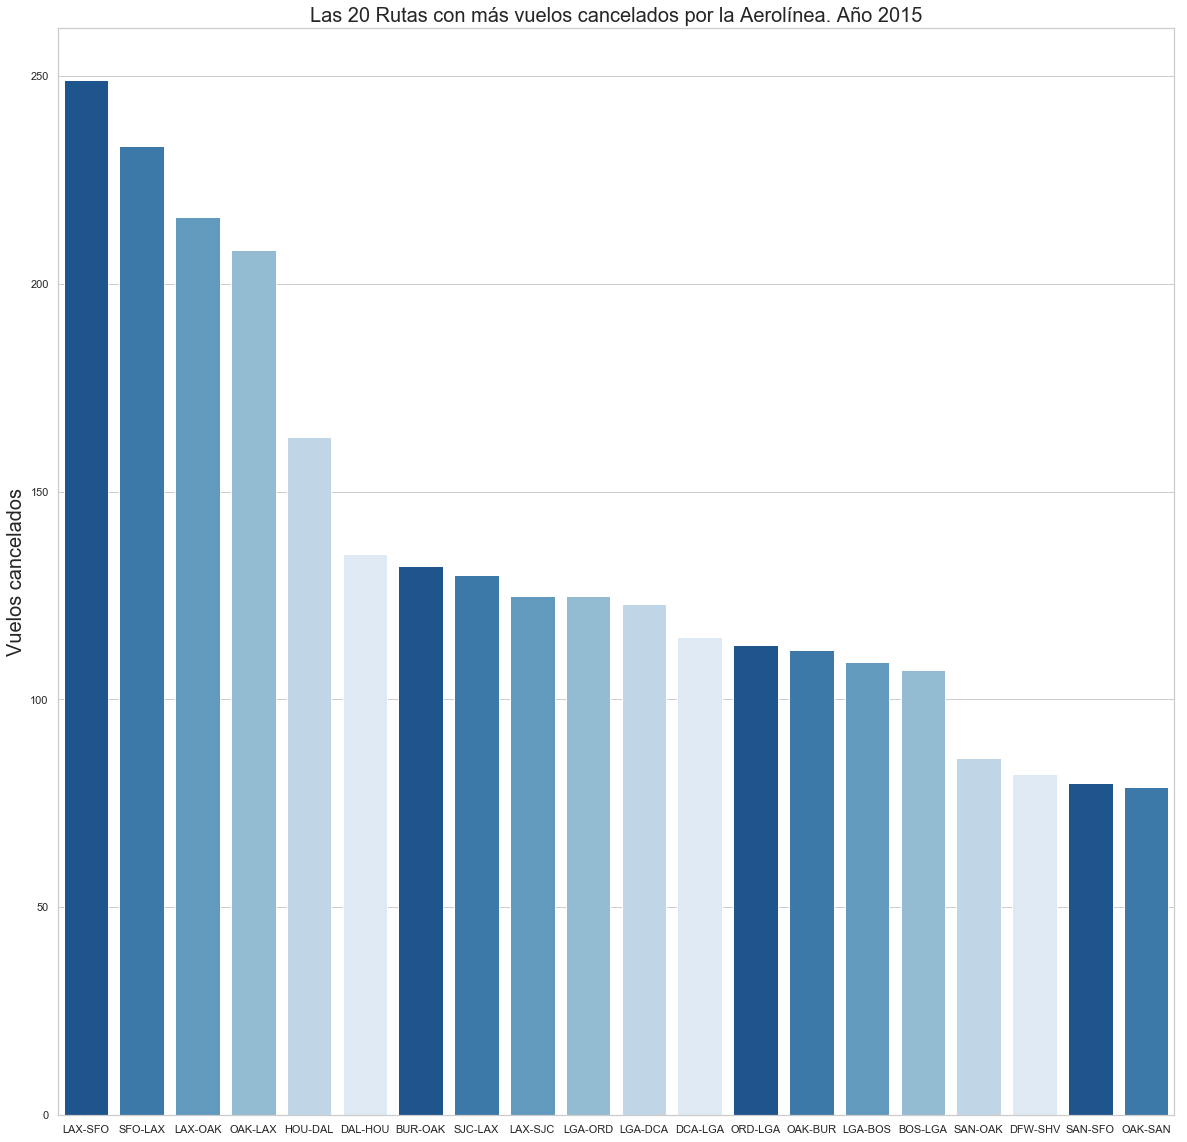

In [273]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_r")
ax = sns.barplot(x=rutasVuelosCanceladosAerolinea.index, y=rutasVuelosCanceladosAerolinea['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por la Aerolínea. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.2 Vuelos cancelados por Ruta por la Meteorología

In [274]:
rutasVuelosCanceladosMeteo = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'B'].Route.value_counts(sort=True))

In [275]:
rutasVuelosCanceladosMeteo.shape

(3473, 1)

In [276]:
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.rename(columns={'Route': 'VuelosCancelados'})

In [277]:
rutasVuelosCanceladosMeteo.head(10)

VuelosCancelados
LGA-ORD               247
ORD-LGA               238
BOS-LGA               209
LGA-BOS               204
BOS-DCA               182
DCA-BOS               177
LGA-ATL               146
ATL-LGA               142
DFW-ORD               141
ORD-BOS               138

In [278]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.head(20)

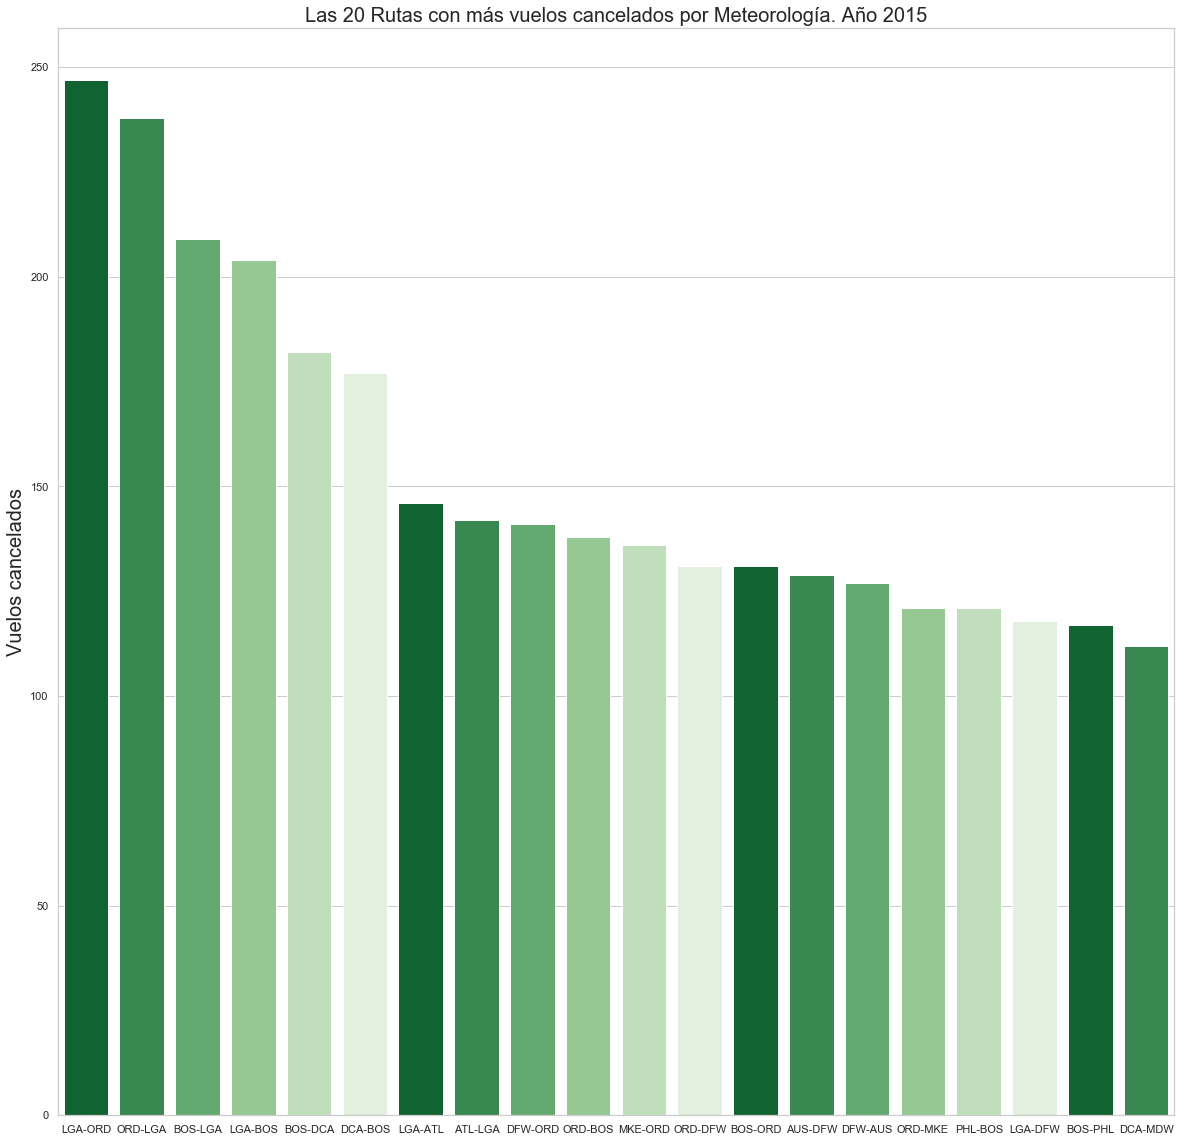

In [279]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=rutasVuelosCanceladosMeteo.index, y=rutasVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Meteorología. Año ' + year, fontsize=20)

plt.show()

In [280]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosMeteo = rutasVuelosCanceladosMeteo.head(20)

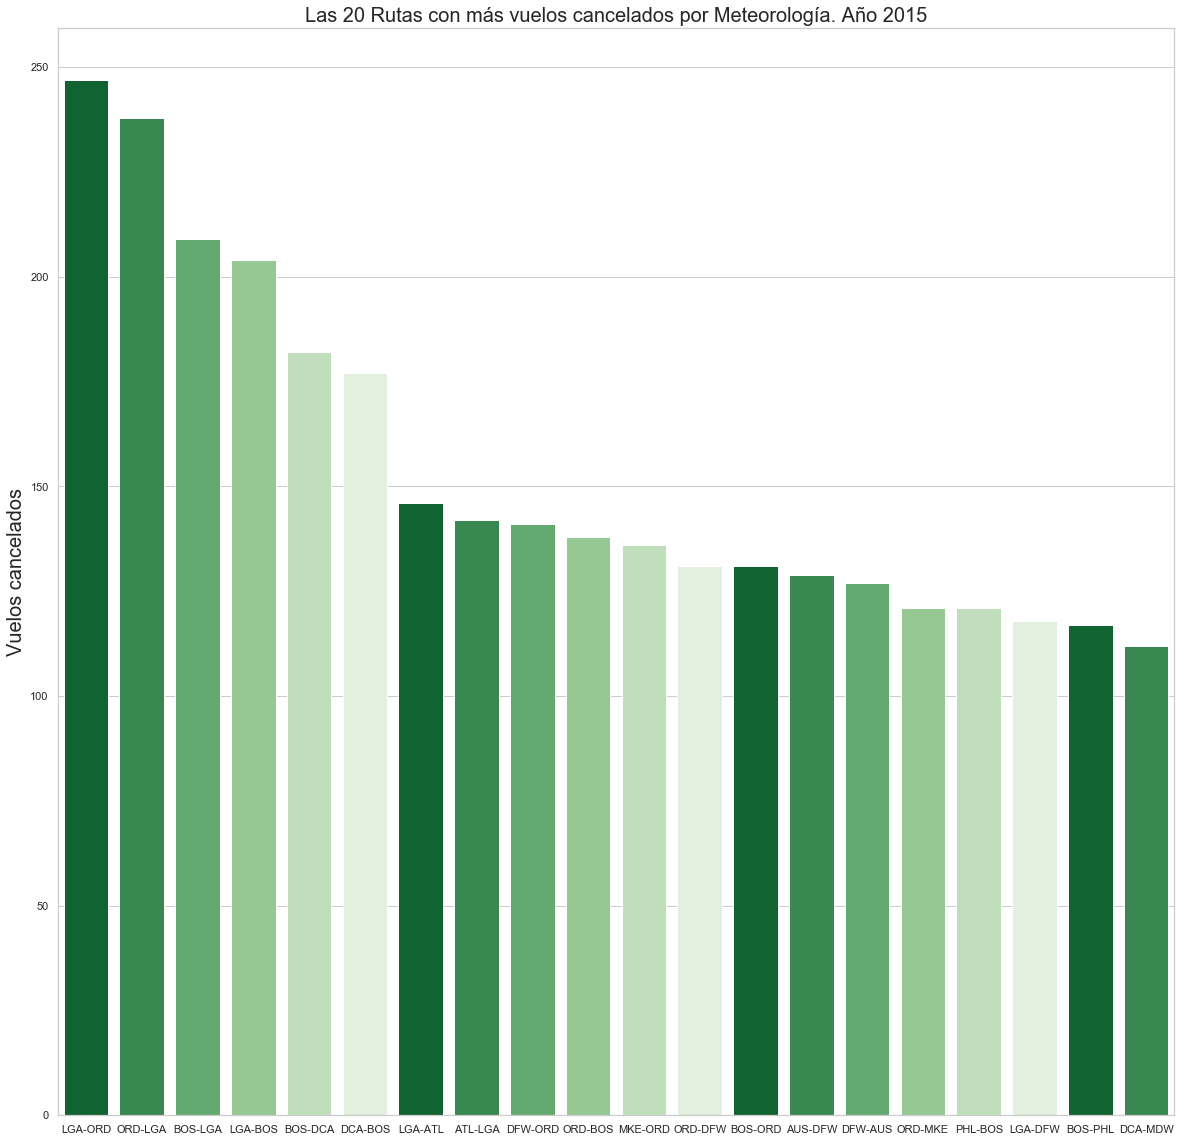

In [281]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=rutasVuelosCanceladosMeteo.index, y=rutasVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Meteorología. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.3 Vuelos cancelados por Ruta por la Espacio Aéreo

In [282]:
rutasVuelosCanceladosNAS = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'C'].Route.value_counts(sort=True))

In [283]:
rutasVuelosCanceladosNAS.shape

(1852, 1)

In [284]:
rutasVuelosCanceladosNAS = rutasVuelosCanceladosNAS.rename(columns={'Route': 'VuelosCancelados'})

rutasVuelosCanceladosNAS.head(10)

VuelosCancelados
BOS-LGA               154
LGA-BOS               154
DCA-LGA               151
LGA-DCA               150
LGA-CLE               136
CLE-LGA               133
EWR-DCA               120
DCA-EWR               115
SFO-LAX                97
LAX-SFO                90

In [285]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosNAS = rutasVuelosCanceladosNAS.head(20)

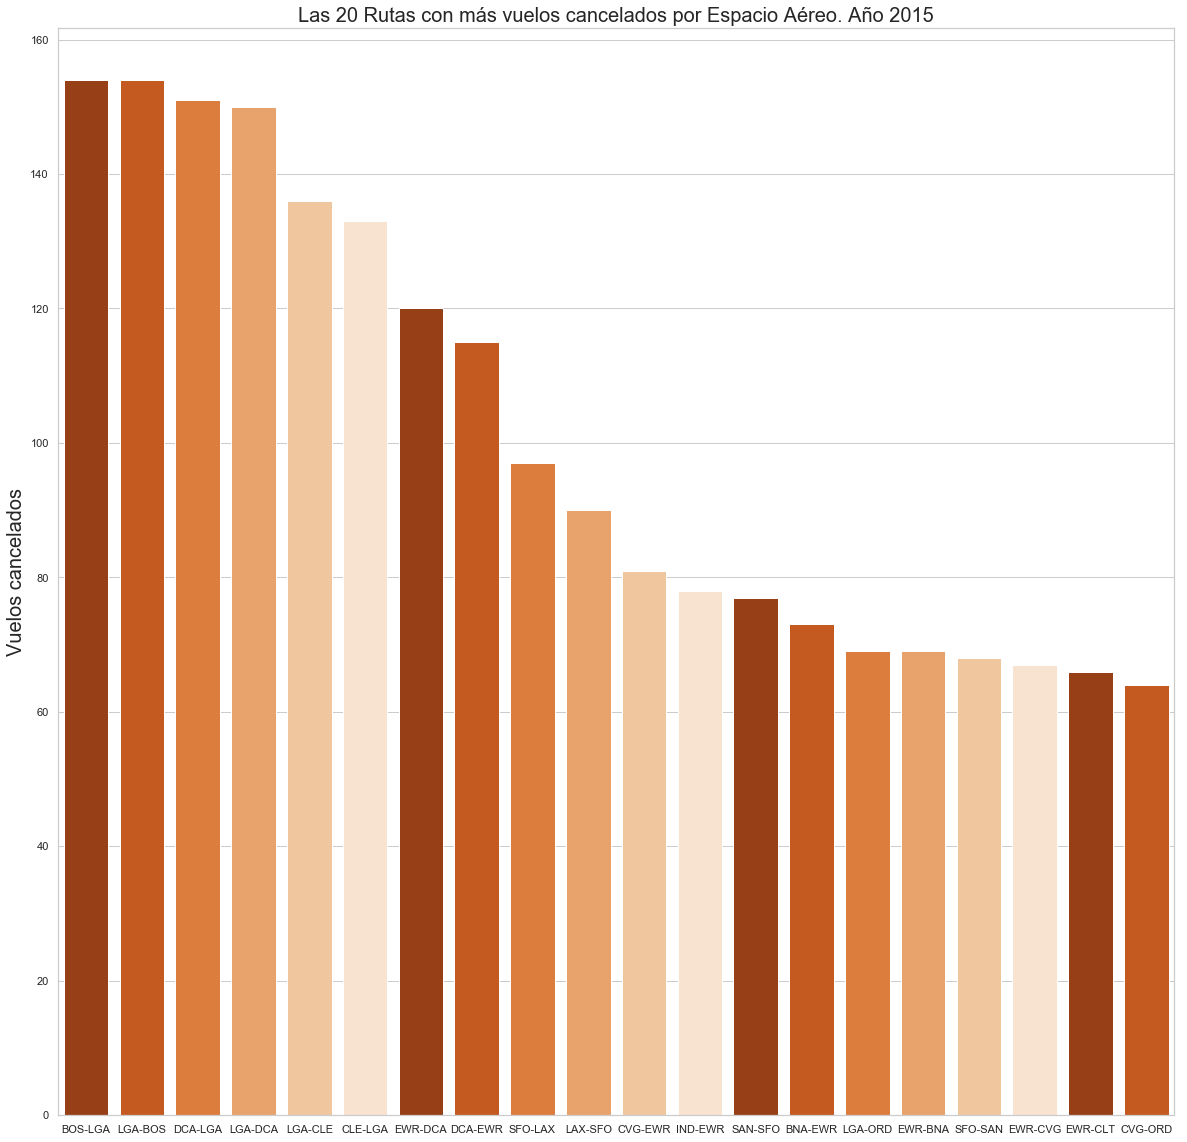

In [286]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Oranges_r")
ax = sns.barplot(x=rutasVuelosCanceladosNAS.index, y=rutasVuelosCanceladosNAS['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Espacio Aéreo. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.6.4 Vuelos cancelados por Ruta por Seguridad

In [287]:
rutasVuelosCanceladosSeguridad = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'D'].Route.value_counts(sort=True))

In [288]:
rutasVuelosCanceladosSeguridad.shape

(20, 1)

In [289]:
rutasVuelosCanceladosSeguridad = rutasVuelosCanceladosSeguridad.rename(columns={'Route': 'VuelosCancelados'})

rutasVuelosCanceladosSeguridad.head(10)

VuelosCancelados
SAN-LAS                 3
MSY-MCO                 1
MCO-MIA                 1
MCO-MSY                 1
SAN-DEN                 1
MSY-HOU                 1
SFO-SNA                 1
MSY-BWI                 1
MIA-TPA                 1
SAN-PHX                 1

In [290]:
#me quedo con las 20 rutas con mayor número de vuelos cancelados
rutasVuelosCanceladosSeguridad = rutasVuelosCanceladosSeguridad.head(20)

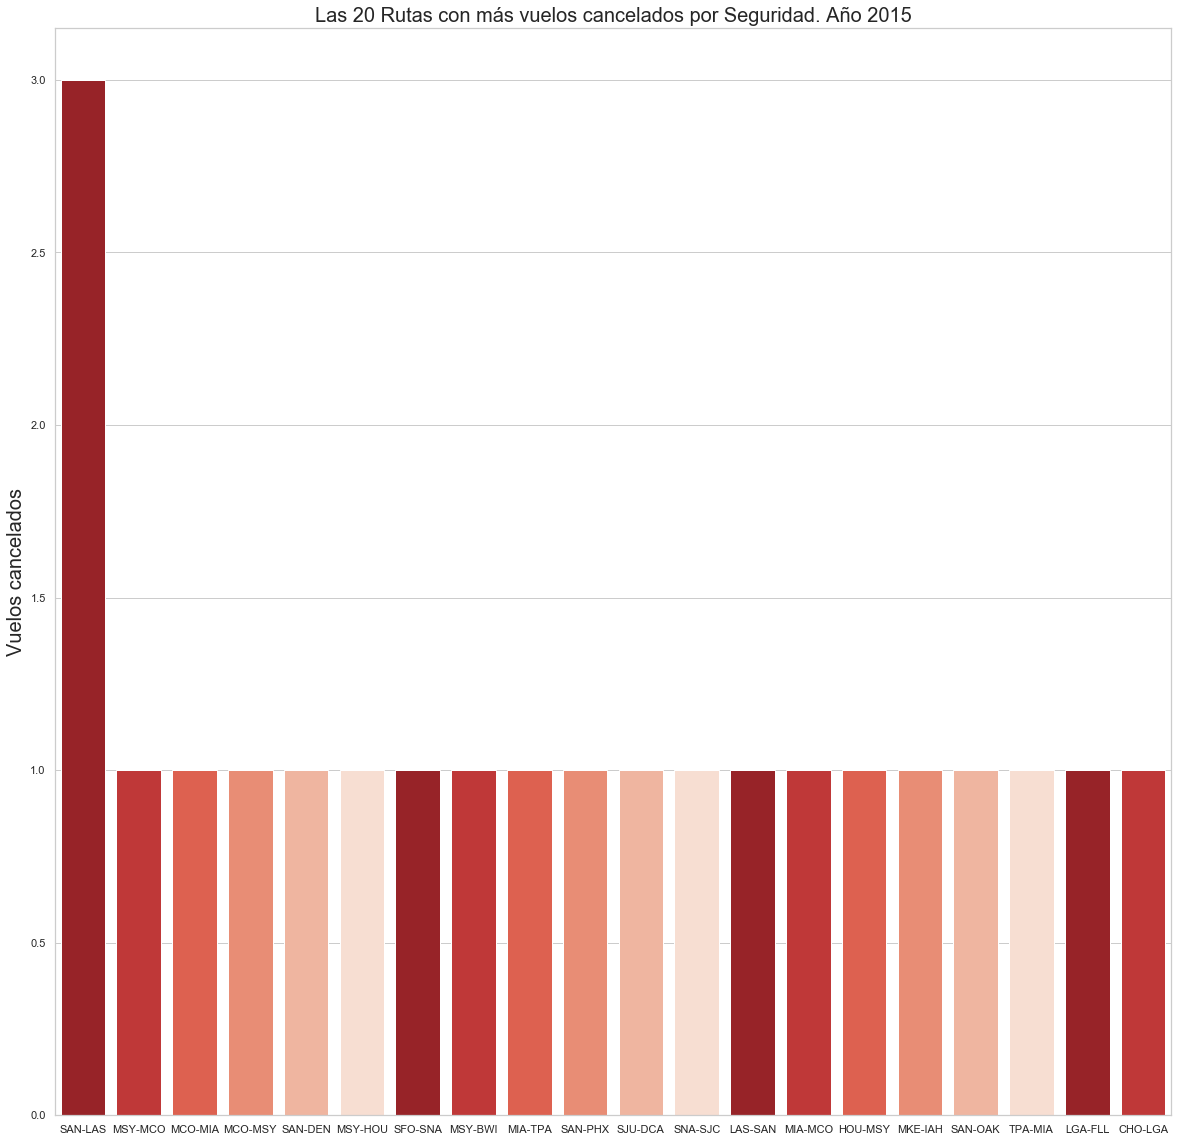

In [291]:
plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Reds_r")
ax = sns.barplot(x=rutasVuelosCanceladosSeguridad.index, y=rutasVuelosCanceladosSeguridad['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Rutas con más vuelos cancelados por Seguridad. Año ' + year, fontsize=20)

plt.show()

### 1.3.6.7 Cancelaciones por Aeropuertos

#### 1.3.6.7.1 Vuelos cancelados en aeropuertos por la Aerolínea

In [292]:
aeropuertosVuelosCanceladosAerolinea = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'A'].Origin.value_counts(sort=True))

In [293]:
aeropuertosVuelosCanceladosAerolinea.shape

(309, 1)

In [294]:
aeropuertosVuelosCanceladosAerolinea = aeropuertosVuelosCanceladosAerolinea.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosAerolinea.head(10)

VuelosCancelados
DFW              1546
ORD              1465
LAX              1347
LGA              1205
SFO               910
ATL               710
DCA               558
DEN               553
LAS               522
IAH               507

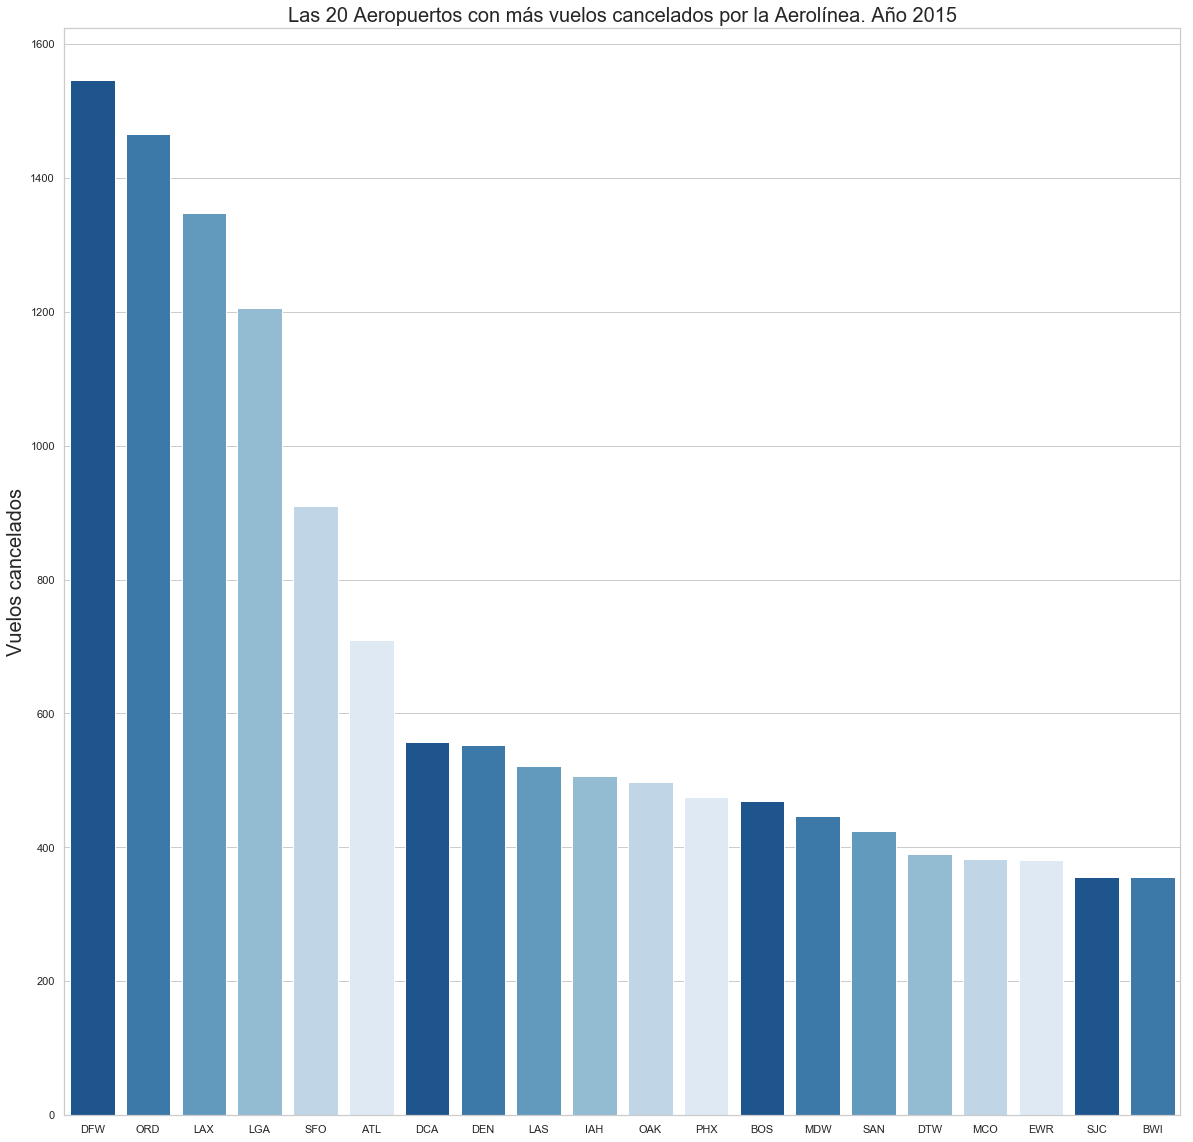

In [295]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosAerolinea = aeropuertosVuelosCanceladosAerolinea.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Blues_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosAerolinea.index, y=aeropuertosVuelosCanceladosAerolinea['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por la Aerolínea. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.2 Vuelos cancelados en aeropuertos por Meteorología

In [296]:
aeropuertosVuelosCanceladosMeteo = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'B'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosMeteo.shape

(311, 1)

In [297]:
aeropuertosVuelosCanceladosMeteo = aeropuertosVuelosCanceladosMeteo.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosMeteo.head(10)

VuelosCancelados
DFW              4984
ORD              4788
LGA              2205
BOS              1885
ATL              1716
MDW              1448
DEN              1393
IAH              1227
EWR              1169
JFK              1106

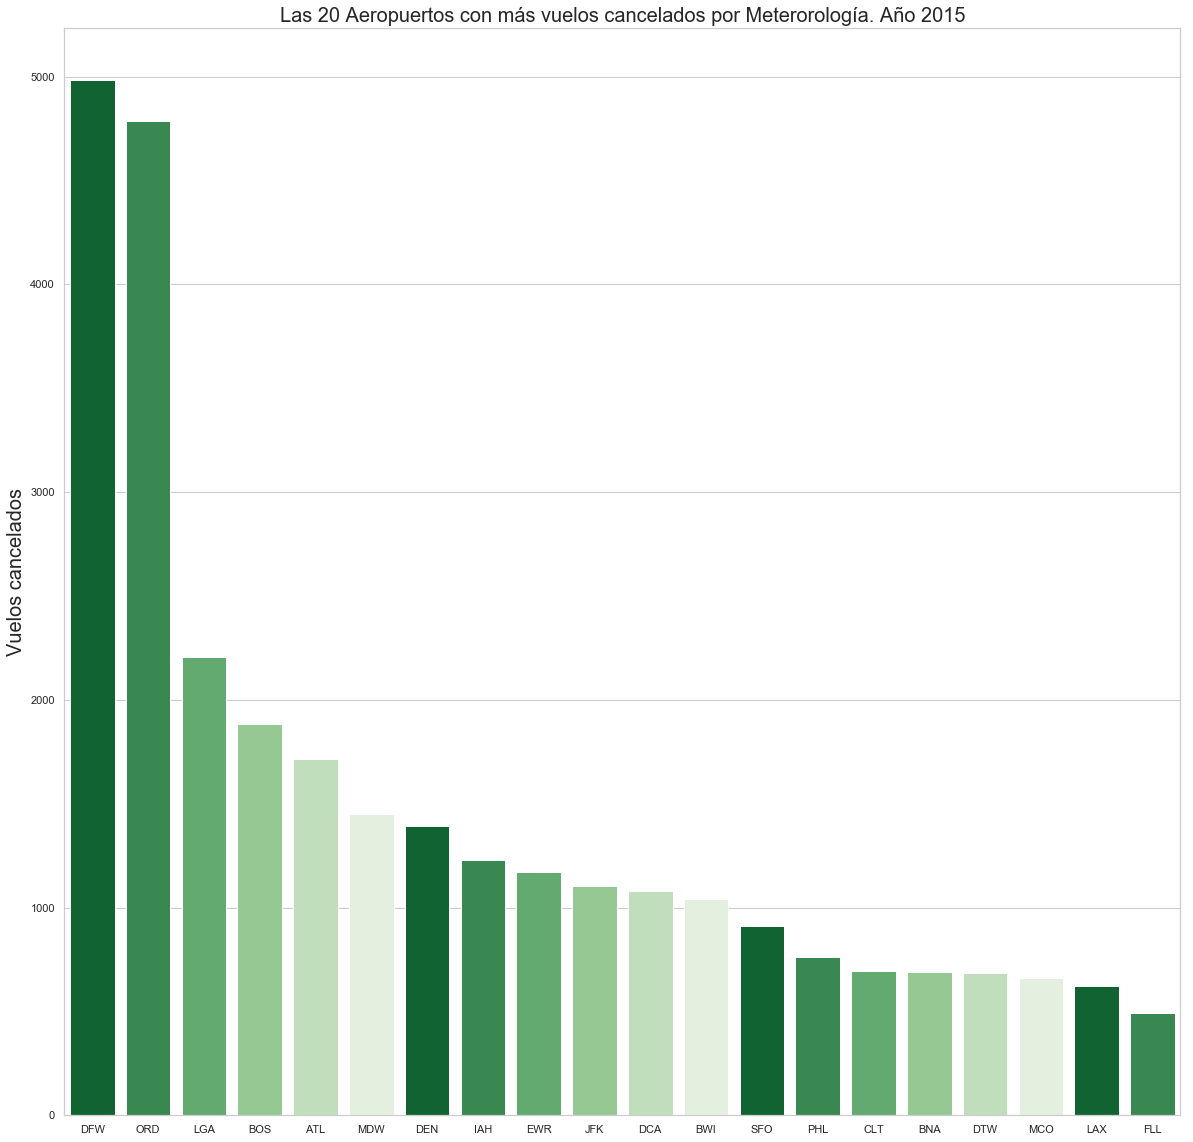

In [298]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosMeteo = aeropuertosVuelosCanceladosMeteo.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosMeteo.index, y=aeropuertosVuelosCanceladosMeteo['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Meterorología. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.3 Vuelos cancelados en aeropuertos por Espacio Aéreo

In [299]:
aeropuertosVuelosCanceladosNAS = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'C'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosNAS.shape

(245, 1)

In [300]:
aeropuertosVuelosCanceladosNAS = aeropuertosVuelosCanceladosNAS.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosNAS.head(10)

VuelosCancelados
ORD              2345
EWR              1654
LGA              1245
JFK               547
IAH               488
DCA               438
SFO               382
BOS               348
CLE               284
LAX               270

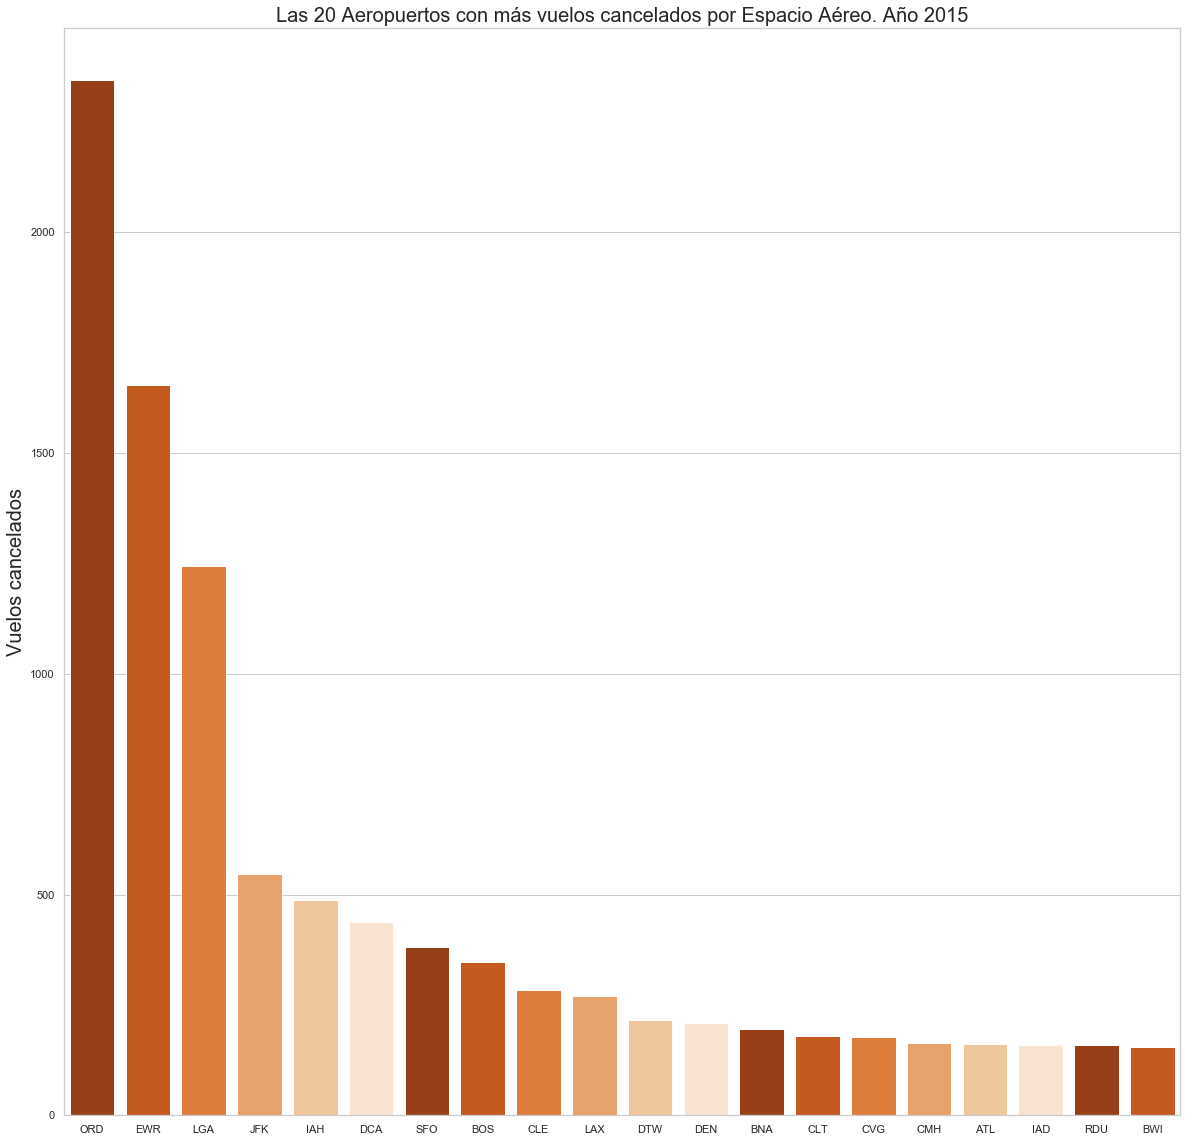

In [301]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosNAS = aeropuertosVuelosCanceladosNAS.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Oranges_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosNAS.index, y=aeropuertosVuelosCanceladosNAS['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Espacio Aéreo. Año ' + year, fontsize=20)

plt.show()

#### 1.3.6.7.4 Vuelos cancelados en aeropuertos por Seguridad

In [302]:
aeropuertosVuelosCanceladosSeguridad = pd.DataFrame(dfanual[dfanual['CancellationCode'] == 'D'].Origin.value_counts(sort=True))

aeropuertosVuelosCanceladosSeguridad.shape

(13, 1)

In [303]:
aeropuertosVuelosCanceladosSeguridad = aeropuertosVuelosCanceladosSeguridad.rename(columns={'Origin': 'VuelosCancelados'})

aeropuertosVuelosCanceladosSeguridad.head(10)

VuelosCancelados
SAN                 6
MSY                 3
MIA                 2
MCO                 2
LAS                 1
TPA                 1
HOU                 1
SNA                 1
SJU                 1
MKE                 1

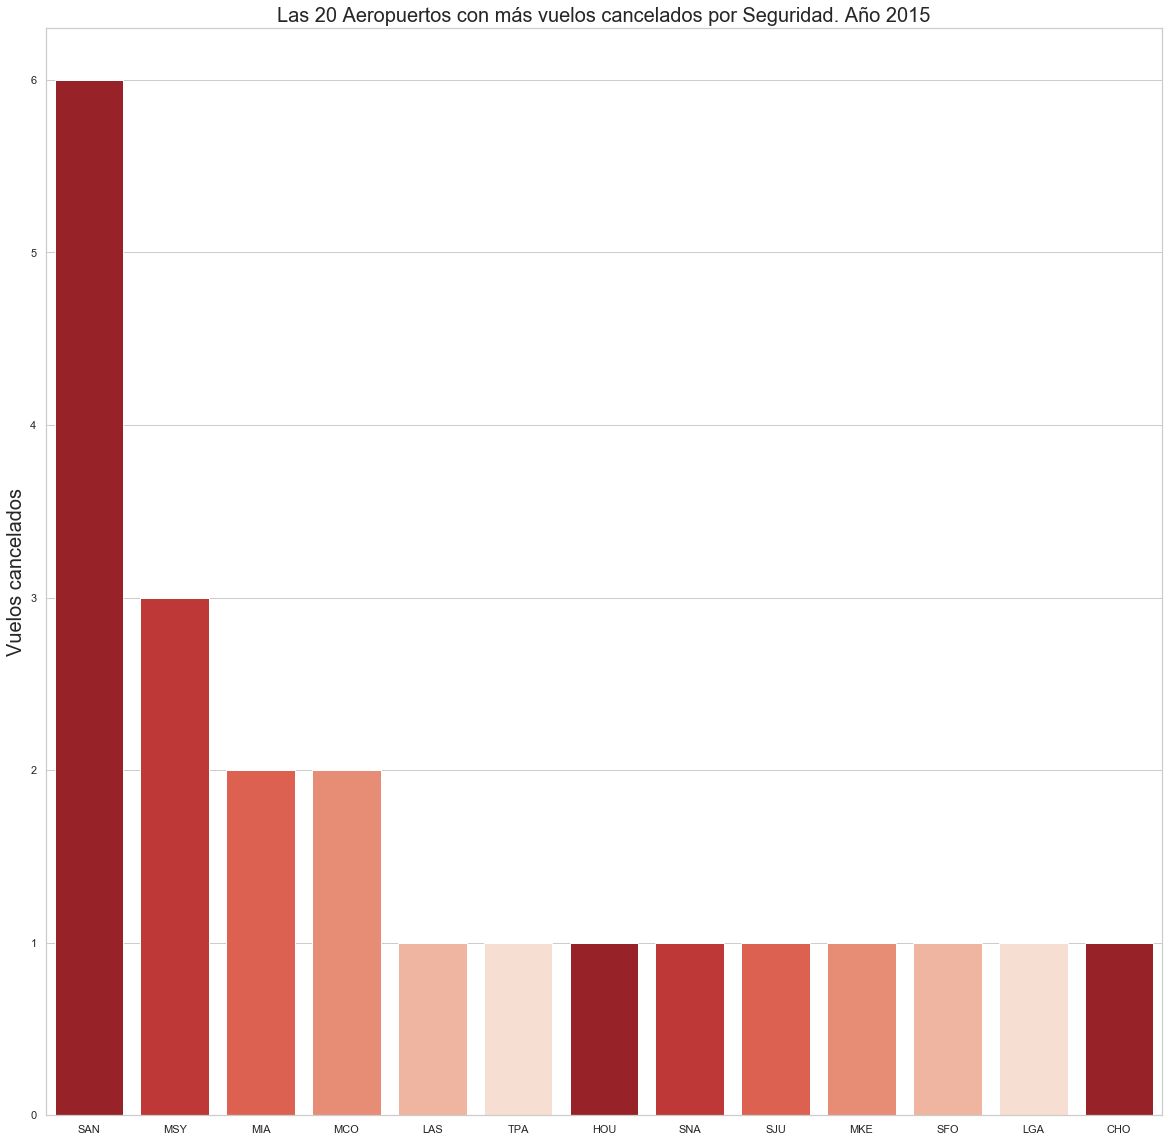

In [304]:
#me quedo con las 20 aeropuertos con mayor número de vuelos cancelados
aeropuertosVuelosCanceladosSeguridad = aeropuertosVuelosCanceladosSeguridad.head(20)

plt.figure(figsize=(20,20))

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Reds_r")
ax = sns.barplot(x=aeropuertosVuelosCanceladosSeguridad.index, y=aeropuertosVuelosCanceladosSeguridad['VuelosCancelados'], palette=pal)

ax.set_ylabel("Vuelos cancelados", fontsize=20)
ax.set_title('Las 20 Aeropuertos con más vuelos cancelados por Seguridad. Año ' + year, fontsize=20)

plt.show()

## 2. Áreas geográficas
Vamos a ver cómo asignar áreas geográficos a los diferentes aeropuertos para identificar mejor en qué zona están y ver si merece la pena hacer un modelo de predicción /clasificación por zonas geográficas.
Para ello tenemos los Estados en los que se ubica cada aeropuerto, indicado en el campo "OriginState", por lo que hemos hecho un csv mapeando los Estados con zonas geográficas que hemos estimado inicialmente, en función tanto de la geografía, como del posible clima.
1. Por geografía: dividimos el país en 4 partes: Este, Central y Oeste(incluye Hawai).
2. Por clima: a las 3 divisiones del contiennte, los subdividimos en Norte y Sur, ya que seria razonable pensar que  en cada una de estas 3 divisiones el clima varía bastante, a lo largo del año, entre norte y sur.

In [305]:
#hemos creado un csv con las zonas geográficas Este, Central y Oeste y por Norte y Sur 
#abreviado en ES, EN, CS, CN, WS y WN
zonaEstados = pd.read_csv("/Users/moncholv/Documents/Proyecto AIr/datasets/geo/" + 'ZonasEstados.csv', delimiter=';')

In [306]:
zonaEstados.head(5)

State GeoCluster
0    AL         ES
1    AK         WN
2    AZ         WS
3    AR         CS
4    CA         WS

In [307]:
#para hacer el join por estado, y como tenemos dos Estados en el Dataset (OriginState y DestState), renombraremos
#sucesivamente la cabecera para hacer el join
zonaEstados = zonaEstados.rename(columns={'State': 'OriginState', 'GeoCluster': 'OriginGeo'})

In [308]:
#hacemos el join por el Estado Origen del vuelo
dfanual = pd.merge(dfanual, zonaEstados, on='OriginState', how='inner')

In [309]:
#ahora renombramos para casar con los de Destino
zonaEstados = zonaEstados.rename(columns={'OriginState': 'DestState', 'OriginGeo': 'DestGeo'})

#hacemos el join por el Estado Destino del vuelo
dfanual = pd.merge(dfanual, zonaEstados, on='DestState', how='inner')

In [310]:
#comprobamos
dfanual[['OriginState', 'OriginGeo', 'DestState', 'DestGeo']].head(5)

OriginState OriginGeo DestState DestGeo
0          NY        EN        CA      WS
1          NY        EN        CA      WS
2          NY        EN        CA      WS
3          NY        EN        CA      WS
4          NY        EN        CA      WS

Revisemos por las zonas geográficas, algunos de los datos principales de retrasos, cancelaciones y número de vuelos totales, para comprobar si estamos en lo cierto con respecto a la intuición de los datos por aeropuertos y rutas que hemos visto en el apartado 1.3

In [311]:
#primero contamos todos los retrasos por Zonas de Origen del vuelo
retrasosSalidaPorZonasOrigen = pd.DataFrame(dfanual[dfanual['DepDel15'] == 1].OriginGeo.value_counts(sort=True))

In [312]:
retrasosSalidaPorZonasOrigen = retrasosSalidaPorZonasOrigen.rename(columns={'OriginGeo': 'VuelosRetrasados'})
retrasosSalidaPorZonasOrigen

VuelosRetrasados
EN            344015
ES            225242
CS            215896
WS            205758
CN             49073
WN             15121

In [313]:
#vuelos totales por zona
vuelosTotalesPorZonasOrigen = pd.DataFrame(dfanual.OriginGeo.value_counts(sort=True))

In [314]:
vuelosTotalesPorZonasOrigen = vuelosTotalesPorZonasOrigen.rename(columns={'OriginGeo': 'VuelosTotales'})
vuelosTotalesPorZonasOrigen

VuelosTotales
EN        1833651
ES        1295074
WS        1147071
CS        1089577
CN         326064
WN         115496

In [315]:
#los unimos
#hacemos el join por el Estado Destino del vuelo
datosZonasOrigen = pd.merge(vuelosTotalesPorZonasOrigen, retrasosSalidaPorZonasOrigen, left_index=True, right_index=True)

In [316]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados
EN        1833651            344015
ES        1295074            225242
WS        1147071            205758
CS        1089577            215896
CN         326064             49073
WN         115496             15121

In [317]:
#retrasos en Zona Origen por culpa de la llegada tarde del vuelo anterior
#sacamos las medias de retrasos por llegada tarde del vuelo anterior
retrasosSalidasteAircraftPorGeo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['CarrierDelay'] == 0) & (dfanual['LateAircraftDelay'] > 0)])

In [318]:
retrasosSalidasteAircraftPorGeo = pd.DataFrame(retrasosSalidasteAircraftPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count', 'DepDelay':'mean'}))
retrasosSalidasteAircraftPorGeo = retrasosSalidasteAircraftPorGeo.rename(columns={'OriginGeo': 'VuelosLateArrival', 'DepDelay': 'MediaLateArrival'})

In [319]:
retrasosSalidasteAircraftPorGeo

VuelosLateArrival  MediaLateArrival
OriginGeo                                     
CN                     14233         68.903815
CS                     50127         69.295470
EN                     73943         74.192107
ES                     48850         71.050440
WN                      4901         67.019588
WS                     53943         62.666537

In [320]:
#retrasos en Zona Origen por culpa de la Aerolínea
#sacamos las medias
retrasosSalidasAerolineaPorGeo = pd.DataFrame(dfanual[(dfanual['DepDel15'] == 1) & (dfanual['LateAircraftDelay'] == 0) & (dfanual['CarrierDelay'] > 0)])
retrasosSalidasAerolineaPorGeo = pd.DataFrame(retrasosSalidasAerolineaPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count', 'DepDelay':'mean'}))
retrasosSalidasAerolineaPorGeo = retrasosSalidasAerolineaPorGeo.rename(columns={'OriginGeo': 'VuelosAerolinea', 'DepDelay': 'MediaAerolinea'})

In [321]:
retrasosSalidasAerolineaPorGeo

VuelosAerolinea  MediaAerolinea
OriginGeo                                 
CN                    9750       84.231692
CS                   48606       64.033288
EN                   78069       70.091060
ES                   50906       68.653872
WN                    2972       80.897376
WS                   37963       68.110160

In [322]:
#vuelos totales cancelados por Zona Origen
vuelosCanceladosPorGeo = pd.DataFrame(dfanual[(dfanual['Cancelled'] == 1)])
vuelosCanceladosPorGeo = pd.DataFrame(vuelosCanceladosPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count'}))
vuelosCanceladosPorGeo = vuelosCanceladosPorGeo.rename(columns={'OriginGeo': 'VuelosCancelados'})

In [323]:
vuelosCanceladosPorGeo

VuelosCancelados
OriginGeo                  
CN                     4226
CS                    19565
EN                    40553
ES                    13404
WN                     1023
WS                    11021

In [324]:
#vuelos cancelados por Meteo Zona Origen
vuelosCanceladosMeteoPorGeo = pd.DataFrame(dfanual[(dfanual['CancellationCode'] == 'B')])
vuelosCanceladosMeteoPorGeo = pd.DataFrame(vuelosCanceladosMeteoPorGeo.groupby('OriginGeo').aggregate({'OriginGeo': 'count'}))
vuelosCanceladosMeteoPorGeo = vuelosCanceladosMeteoPorGeo.rename(columns={'OriginGeo': 'VuelosCanceladosMeteo'})

In [325]:
vuelosCanceladosPorGeo

VuelosCancelados
OriginGeo                  
CN                     4226
CS                    19565
EN                    40553
ES                    13404
WN                     1023
WS                    11021

In [326]:
# terminamos de fusionar todos los datasets
datosZonasOrigen = pd.merge(datosZonasOrigen, retrasosSalidasteAircraftPorGeo, left_index=True, right_index=True)

In [327]:
datosZonasOrigen = pd.merge(datosZonasOrigen, retrasosSalidasAerolineaPorGeo, left_index=True, right_index=True)

In [328]:
datosZonasOrigen = pd.merge(datosZonasOrigen, vuelosCanceladosPorGeo, left_index=True, right_index=True)

In [329]:
datosZonasOrigen = pd.merge(datosZonasOrigen, vuelosCanceladosMeteoPorGeo, left_index=True, right_index=True)

In [330]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados  VuelosLateArrival  MediaLateArrival  \
EN        1833651            344015              73943         74.192107   
ES        1295074            225242              48850         71.050440   
WS        1147071            205758              53943         62.666537   
CS        1089577            215896              50127         69.295470   
CN         326064             49073              14233         68.903815   
WN         115496             15121               4901         67.019588   

    VuelosAerolinea  MediaAerolinea  VuelosCancelados  VuelosCanceladosMeteo  
EN            78069       70.091060             40553                  21866  
ES            50906       68.653872             13404                   7853  
WS            37963       68.110160             11021                   3652  
CS            48606       64.033288             19565                  12580  
CN             9750       84.231692              4226                   2250  
WN             2972       80.897376              1023                    603

In [331]:
#por último sacamos porcentajes sobre los vuelos totales, para conocer la proporción real
datosZonasOrigen['PctVuelosRetrasados'] = (datosZonasOrigen['VuelosRetrasados'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosLateArrival'] = (datosZonasOrigen['VuelosLateArrival'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosAerolinea'] = (datosZonasOrigen['VuelosAerolinea'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosCancelados'] = (datosZonasOrigen['VuelosCancelados'] / datosZonasOrigen['VuelosTotales'])*100
datosZonasOrigen['PctVuelosCanceladosMeteo'] = (datosZonasOrigen['VuelosCanceladosMeteo'] / datosZonasOrigen['VuelosTotales'])*100


In [332]:
datosZonasOrigen

VuelosTotales  VuelosRetrasados  VuelosLateArrival  MediaLateArrival  \
EN        1833651            344015              73943         74.192107   
ES        1295074            225242              48850         71.050440   
WS        1147071            205758              53943         62.666537   
CS        1089577            215896              50127         69.295470   
CN         326064             49073              14233         68.903815   
WN         115496             15121               4901         67.019588   

    VuelosAerolinea  MediaAerolinea  VuelosCancelados  VuelosCanceladosMeteo  \
EN            78069       70.091060             40553                  21866   
ES            50906       68.653872             13404                   7853   
WS            37963       68.110160             11021                   3652   
CS            48606       64.033288             19565                  12580   
CN             9750       84.231692              4226                   2250   
WN             2972       80.897376              1023                    603   

    PctVuelosRetrasados  PctVuelosLateArrival  PctVuelosAerolinea  \
EN            18.761204              4.032556            4.257571   
ES            17.392211              3.771985            3.930741   
WS            17.937687              4.702673            3.309560   
CS            19.814662              4.600593            4.460997   
CN            15.050113              4.365094            2.990211   
WN            13.092228              4.243437            2.573249   

    PctVuelosCancelados  PctVuelosCanceladosMeteo  
EN             2.211599                  1.192484  
ES             1.034999                  0.606375  
WS             0.960795                  0.318376  
CS             1.795651                  1.154577  
CN             1.296065                  0.690049  
WN             0.885745                  0.522096

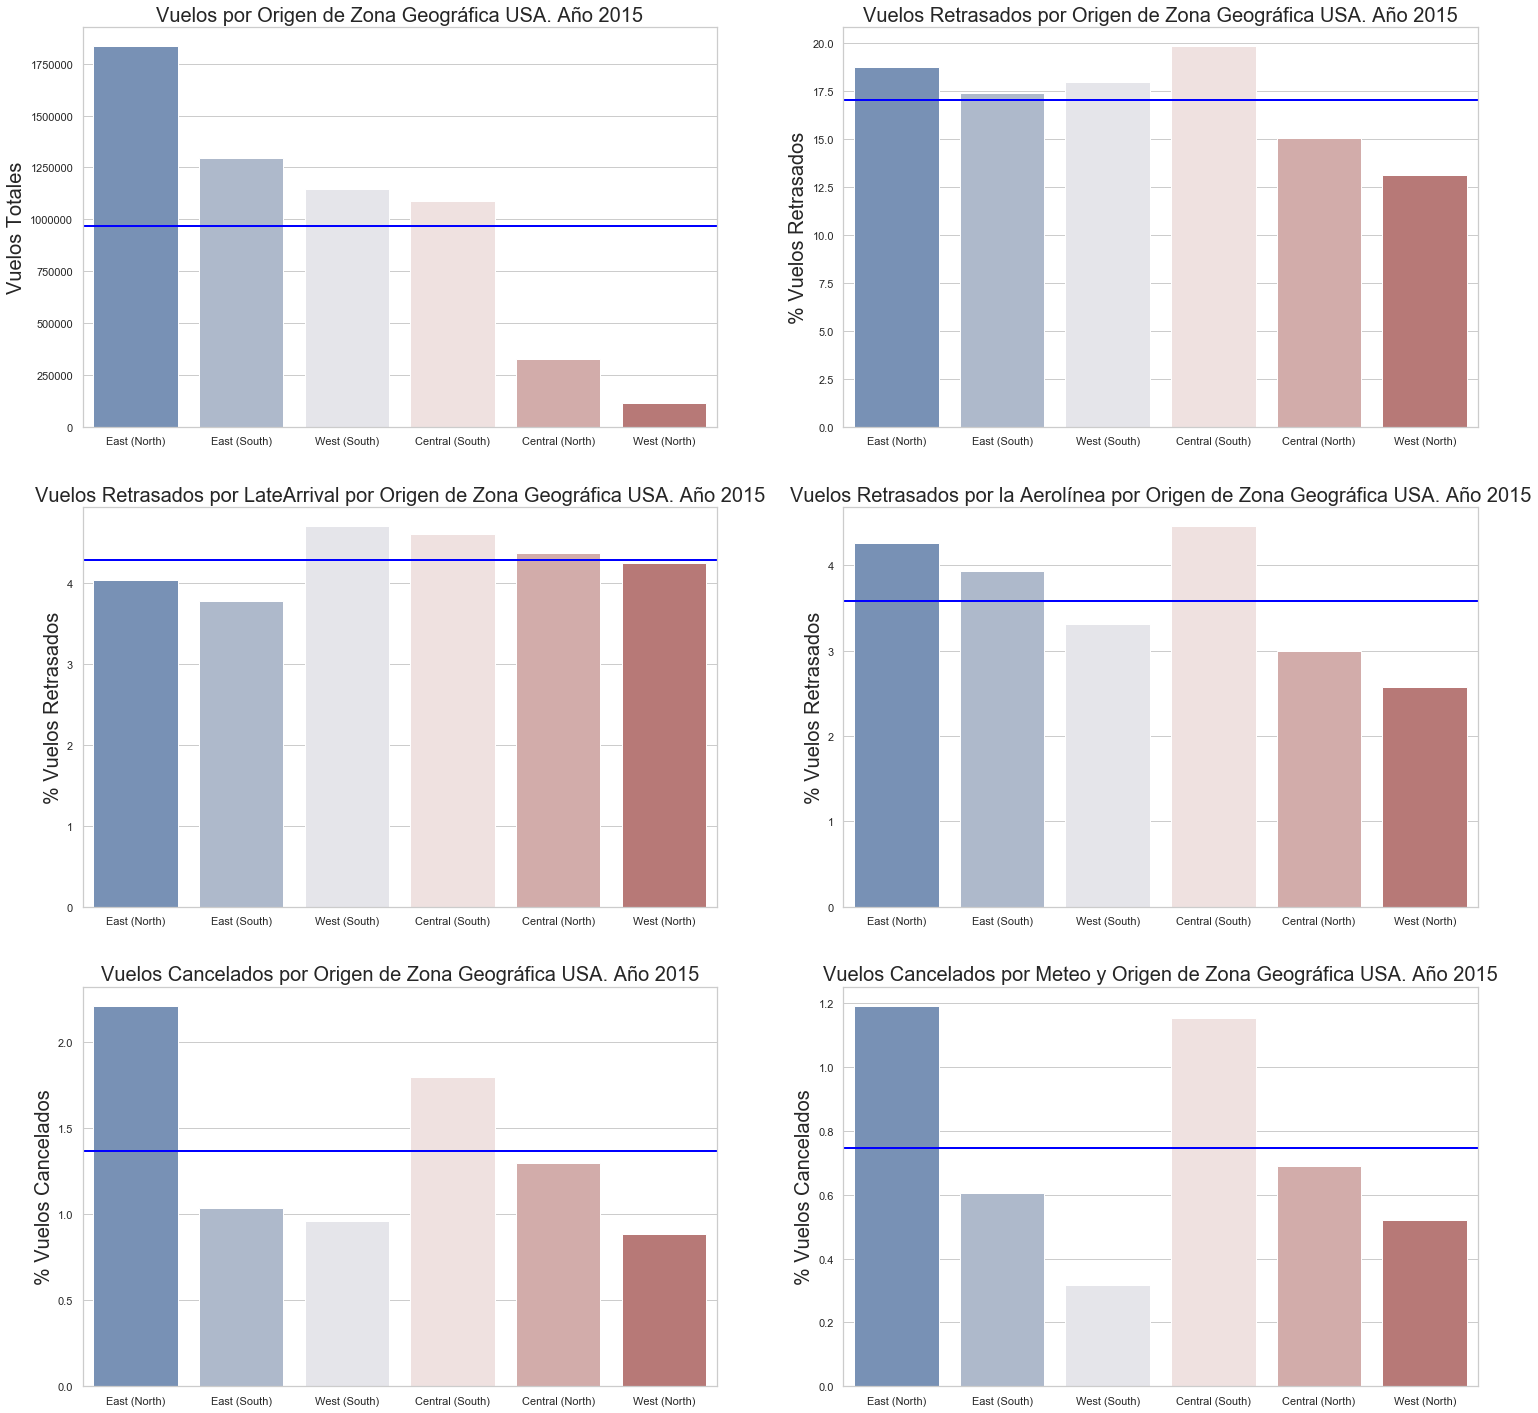

In [333]:
#a pintar

my_xticks=['East (North)', 'East (South)', 'West (South)', 'Central (South)', 'Central (North)', 'West (North)']

#Sacamos gráficos
plt.figure(figsize=(25, 25))

#Vuelos por Origen de Zona Geográfica USA
plt.subplot(3,2,1)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['VuelosTotales'], palette=pal)

ax.set_ylabel("Vuelos Totales", fontsize=20)
ax.set_title('Vuelos por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['VuelosTotales'].mean(), color='Blue', linewidth=2)

#Vuelos Retrasados por Origen de Zona Geográfica USA
plt.subplot(3,2,2)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosRetrasados'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosRetrasados'].mean(), color='Blue', linewidth=2)

#Vuelos Retrasados por LateArrival por Origen de Zona Geográfica USA
plt.subplot(3,2,3)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosLateArrival'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por LateArrival por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosLateArrival'].mean(), color='Blue', linewidth=2)


#uelos Retrasados por la Aerolínea por Origen de Zona Geográfica USA
plt.subplot(3,2,4)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosAerolinea'], palette=pal)

ax.set_ylabel("% Vuelos Retrasados", fontsize=20)
ax.set_title('Vuelos Retrasados por la Aerolínea por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosAerolinea'].mean(), color='Blue', linewidth=2)

#Vuelos Cancelados por Origen de Zona Geográfica USA
plt.subplot(3,2,5)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosCancelados'], palette=pal)

ax.set_ylabel("% Vuelos Cancelados", fontsize=20)
ax.set_title('Vuelos Cancelados por Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosCancelados'].mean(), color='Blue', linewidth=2)

#Vuelos Cancelados por Meteo y por Origen de Zona Geográfica USA
plt.subplot(3,2,6)

sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("vlag")
ax = sns.barplot(x=my_xticks, y=datosZonasOrigen['PctVuelosCanceladosMeteo'], palette=pal)

ax.set_ylabel("% Vuelos Cancelados", fontsize=20)
ax.set_title('Vuelos Cancelados por Meteo y Origen de Zona Geográfica USA. Año ' + year, fontsize=20)

plt.axhline(datosZonasOrigen['PctVuelosCanceladosMeteo'].mean(), color='Blue', linewidth=2)


plt.show()

1. Se ve claramente que la cantidad de vuelos del Este de USA es muy superior al del Oeste y Centro del país.
2. En cuanto a retrasos, porcentualmente destacan, un poco por encima el Este y el Centro Sur, y en el caso de retrasos por la aerolínea es similar.
3. En cuanto a vuelos cancelados, claramente el Este y el Centro sobresalen, el resto está por de debajo de la media, y parece que el factor meteo es uno de los clave, dado que las zonas de huracanes, tornados y heladas, prevalecen en el Este y Centro Sur de USA. En el Oeste Norte, está también encuadrado Alaska y el estado de Washington, por lo que también destaca. La mejor zona del pais en cuanto a cancelaciones por meteo es claramente la Costa Oeste Sur del país, California, Nevada y Arizona.